In [1]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import os
import sklearn
import matplotlib.pyplot as plt
import sys
import re

In [2]:
filepath = '/home/jm/vscode/Python/pytorch/Fall Dectection/DaphnetFreezingGait/dataset'

## DaphNet Freezing of Gait [16]
### Each file comprises the data in a matrix format, with one line per sample, and one column per channel. The channels are as follows:
* Time of sample in millisecond
* Ankle (shank) acceleration - horizontal forward acceleration [mg]
* Ankle (shank) acceleration - vertical [mg]
* Ankle (shank) acceleration - horizontal lateral [mg]
* Upper leg (thigh) acceleration - horizontal forward acceleration [mg]
* Upper leg (thigh) acceleration - vertical [mg]
* Upper leg (thigh) acceleration - horizontal lateral [mg]
* Trunk acceleration - horizontal forward acceleration [mg]
* Trunk acceleration - vertical [mg]
* Trunk acceleration - horizontal lateral [mg]
* Annotation [0, 1, or 2]



### The meaning of the annotations are as follows:
* 0: not part of the experiment. For instance the sensors are installed on the user or the user is performing activities unrelated to the experimental protocol, such as debriefing
* 1: experiment, no freeze (can be any of stand, walk, turn)
* 2: freeze


In [3]:
CONVERTED = True

path = "/home/jm/vscode/Python/pytorch/Fall Dectection/DaphnetFreezingGait/dataset"

os.chdir(path)

#gets data from file specified by file_path
def get_contents(file_path):
    i = 0
    #time (ms)
    time = []
    
    #ankle shank
    ankle_accel_forward = []
    ankle_accel_vert = []
    ankle_accel__lateral = []
    
    #thigh acceleration
    thigh_accel_forward = []
    thigh_accel_vert = []
    thigh_accel_lateral = []
    
    #trunk acceleration
    trunk_accel_forward = []
    trunk_accel_vert = []
    trunk_accel_lateral = []
    
    #label
    labels = []

    with open(file_path,'r') as file:

        # lines = file.readlines()[:]

        for line in file:
            data = line.split()
            
            #time
            time = np.append(time, np.float32(data[0]))
            
            #ankle
            ankle_accel_forward = np.append(ankle_accel_forward, data[1])
            ankle_accel_vert = np.append(ankle_accel_vert, data[2])
            ankle_accel__lateral = np.append(ankle_accel__lateral, data[3])
            
            if(i % 10000 == 0):
                print(data[0])
            
            i += 1
            
            #thigh
            thigh_accel_forward = np.append(thigh_accel_forward, data[4])
            thigh_accel_vert = np.append(thigh_accel_vert, data[5])
            thigh_accel_lateral = np.append(thigh_accel_lateral, data[6])
            
            #trunk
            trunk_accel_forward = np.append(trunk_accel_forward, data[7])
            trunk_accel_vert = np.append(trunk_accel_vert, data[8])
            trunk_accel_lateral = np.append(trunk_accel_lateral, data[9])
            
            #label
            labels = np.append(labels, np.int32(data[10]))
            
            
    df = pd.DataFrame({
        'time (ms)': time,
        'ankle acceleration forward': ankle_accel_forward,
        'ankle acceleration vertical': ankle_accel_vert,
        'ankle acceleration lateral': ankle_accel__lateral,
        'thigh acceleration forward': thigh_accel_forward,
        'thigh acceleration vertical': thigh_accel_vert,
        'thigh acceleration lateral': thigh_accel_lateral,
        'trunk acceleration forward': trunk_accel_forward,
        'trunk acceleration vertical': trunk_accel_vert,
        'trunk acceleration lateral': trunk_accel_lateral,
        'labels': labels,
    })
            
    return df

In [4]:
if(not CONVERTED):
    dataframes = {}
    i = '0'

    folder_path = '/home/jm/vscode/Python/pytorch/Fall Dectection/Daphnet_CSV'

    #go through all files in directory and extract data from txt files
    for file in os.listdir():
        if file.endswith(".log"):
            file_path = f"{path}/{file}"

            print(f"Currently working on: {file_path}")
            cur = get_contents(file_path)
            name = "subject" + i
            i = chr(ord(i) + 1)
            print(name)
            dataframes[name] = cur
            
            csv_filename = os.path.splitext(file)[0] + '.csv'
            cur.to_csv(os.path.join(folder_path, csv_filename), index=False)

In [5]:
if(not CONVERTED):
    dataframes = {}
    names = ['S01R01', 'S01R02', 'S02R01', 'S02R02', 'S03R01', 'S03R02', 'S03R03', 'S04R01', 'S05R01', 'S05R02', 'S06R01', 'S06R02', 'S07R01', 'S07R02', 'S08R01', 'S09R01', 'S10R01']
    index = 0
    folder_path = '/home/jm/vscode/Python/pytorch/Fall Dectection/Daphnet_CSV'

    for file in os.listdir():
        if file.endswith(".txt"):
            file_path = f"{path}/{file}"
            print(f"Currently working on: {file_path}")
            cur = get_contents(file_path)
            dataframes[names[index]] = cur
            index += 1
            
            csv_filename = os.path.splitext(file)[0] + '.csv'
            cur.to_csv(os.path.join(folder_path, csv_filename), index=False)


In [17]:
combined_df = pd.DataFrame()
daphnetThigh = {}

csv_folder_path = '/home/jm/vscode/Python/pytorch/Fall Dectection/Daphnet_CSV'
j=0

for i in os.listdir(csv_folder_path):
  if i not in ('README.txt'):
    csv_path = csv_folder_path + '/' + i
    temp_df = pd.read_csv(csv_path)
    daphnetThigh[j] = temp_df
    combined_df = pd.concat([combined_df, temp_df])
    j += 1

In [15]:
combined_df

time (ms)  ankle acceleration forward  ankle acceleration vertical  \
0            15.0                          80                           49   
1            31.0                          80                           49   
2            46.0                          50                           58   
3            62.0                          50                           58   
4            78.0                          50                           58   
...           ...                         ...                          ...   
193298  3020296.0                        -131                          107   
193299  3020312.0                        -121                          127   
193300  3020328.0                        -141                          117   
193301  3020343.0                        -131                          127   
193302  3020359.0                        -141                            0   

        ankle acceleration lateral  thigh acceleration forward  \
0                             -980                           0   
1                             -980                           0   
2                             -960                           0   
3                             -960                           0   
4                             -960                           0   
...                            ...                         ...   
193298                        -960                           0   
193299                        -970                           0   
193300                        -960                           0   
193301                        -980                           0   
193302                           0                           0   

        thigh acceleration vertical  thigh acceleration lateral  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   
...                             ...                         ...   
193298                            0                           0   
193299                            0                           0   
193300                            0                           0   
193301                            0                           0   
193302                            0                           0   

        trunk acceleration forward  trunk acceleration vertical  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                0                            0   
...                            ...                          ...   
193298                           0                            0   
193299                           0                            0   
193300                           0                            0   
193301                           0                            0   
193302                           0                            0   

        trunk acceleration lateral  labels  
0                                0     0.0  
1                                0     0.0  
2                                0     0.0  
3                                0     0.0  
4                                0     0.0  
...                            ...     ...  
193298                           0     0.0  
193299                           0     0.0  
193300                           0     0.0  
193301                           0     0.0  
193302                           0     0.0  

[1917887 rows x 11 columns]

In [18]:
daphnetThigh

{0:         time (ms)  ankle acceleration forward  ankle acceleration vertical  \
 0            15.0                          80                           49   
 1            31.0                          80                           49   
 2            46.0                          50                           58   
 3            62.0                          50                           58   
 4            78.0                          50                           58   
 ...           ...                         ...                          ...   
 144185  2252906.0                          50                           49   
 144186  2252921.0                          60                           49   
 144187  2252937.0                          40                           49   
 144188  2252953.0                          50                           39   
 144189  2252968.0                          40                           39   
 
         ankle acceleration lateral  thigh acce

In [10]:
# #daphnet = []
# daphnetThigh = []
# daphnetNames = []
# for i in os.listdir(csv_folder_path):
#     daphnetNames.append(i.split("\\")[-1])
#     csv = pd.read_csv(csv_folder_path+'/'+i, sep=" ", names=["time", "shank_h_fd", "shank_v", "shank_h_l", "thigh_h_fd", "thigh_v", "thigh_h_l", "trunk_h_fd", "trunk_v", "trunk_h_l", "annotations"])[["time", "thigh_h_fd", "thigh_v", "thigh_h_l", "annotations"]].set_index("time")
#     csv["thigh"] = np.sqrt(csv["thigh_h_l"]**2 + csv["thigh_v"]**2 + csv["thigh_h_fd"]**2)
#     csv = csv[["thigh_h_fd", "thigh_v", "thigh_h_l", "thigh", "annotations"]]
#     #daphnet.append(pd.read_csv(i, sep=" ", names=["time", "shank_h_fd", "shank_v", "shank_h_l", "thigh_h_fd", "thigh_v", "thigh_h_l", "trunk_h_fd", "trunk_v", "trunk_h_l", "annotations"]))
#     daphnetThigh.append(csv)

# daphnetThigh[0]

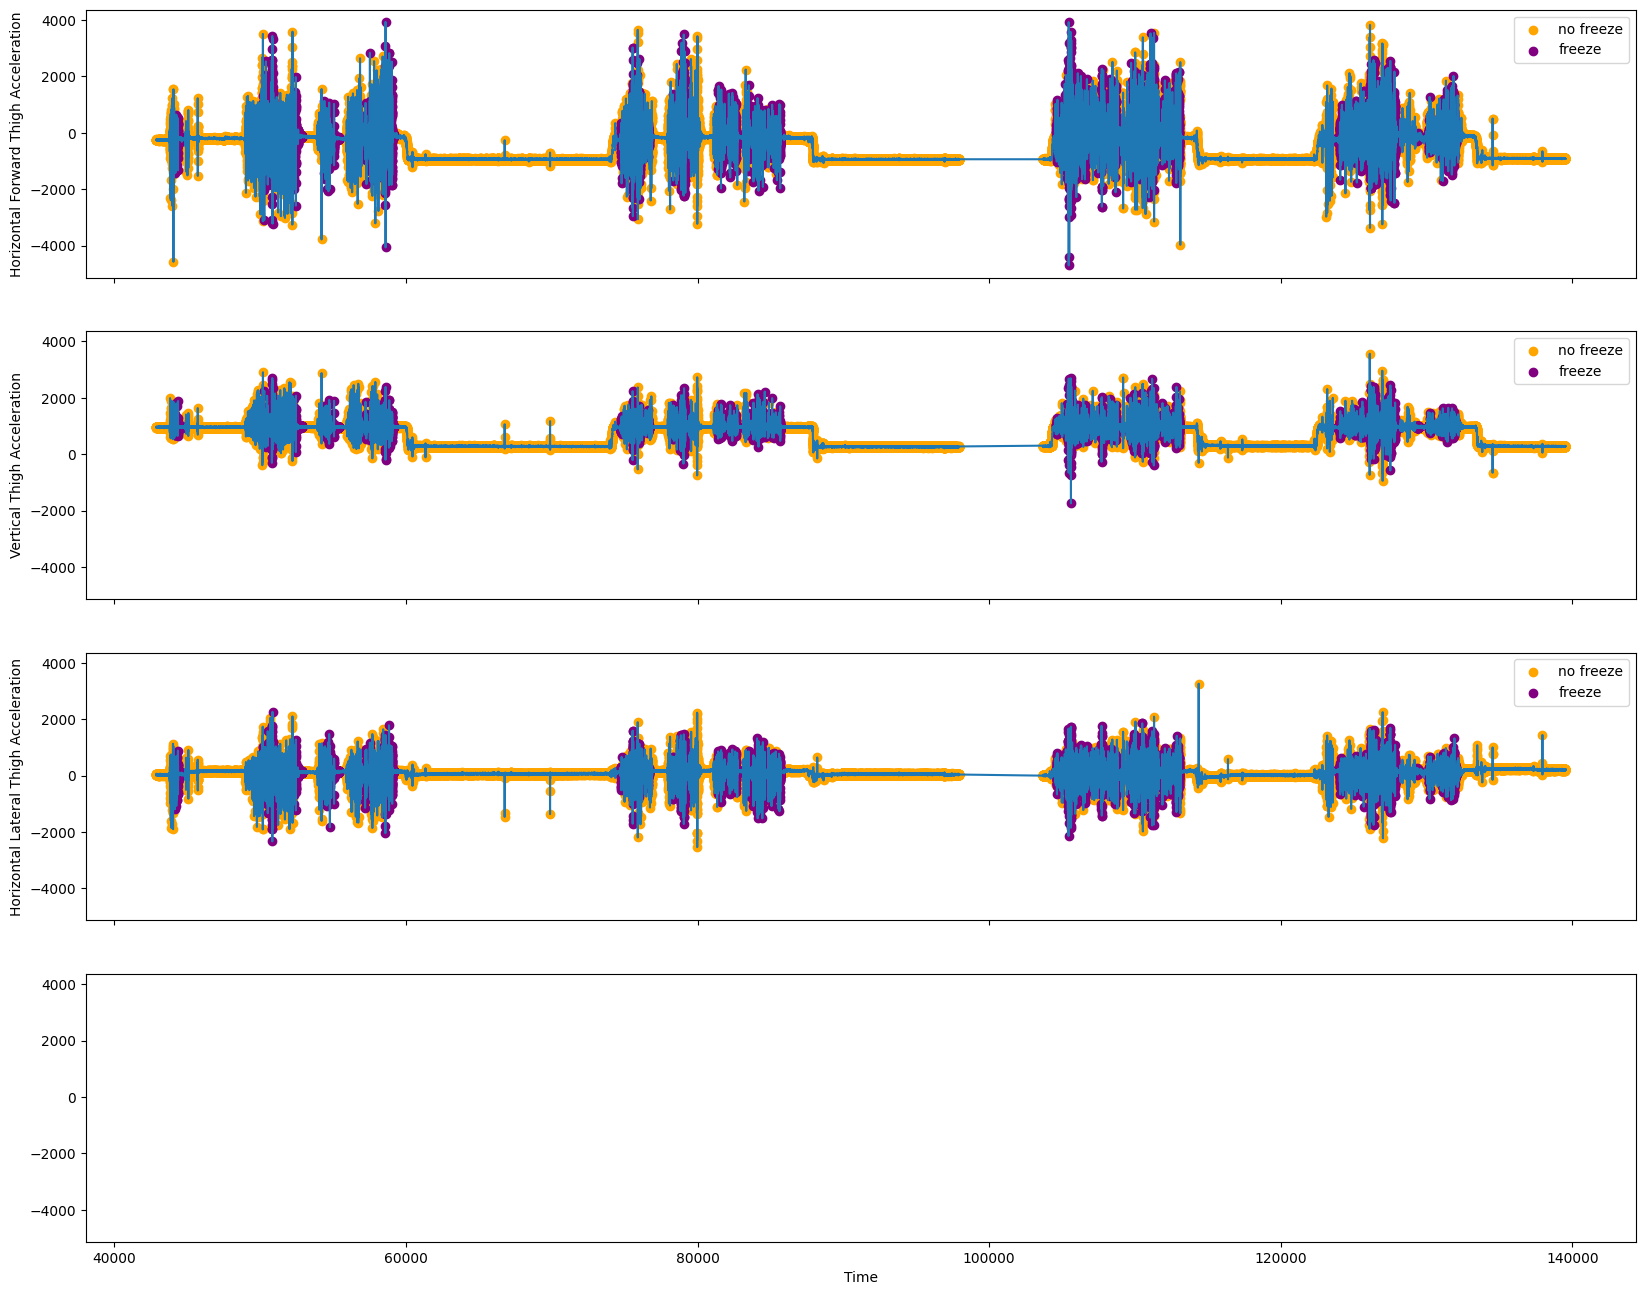

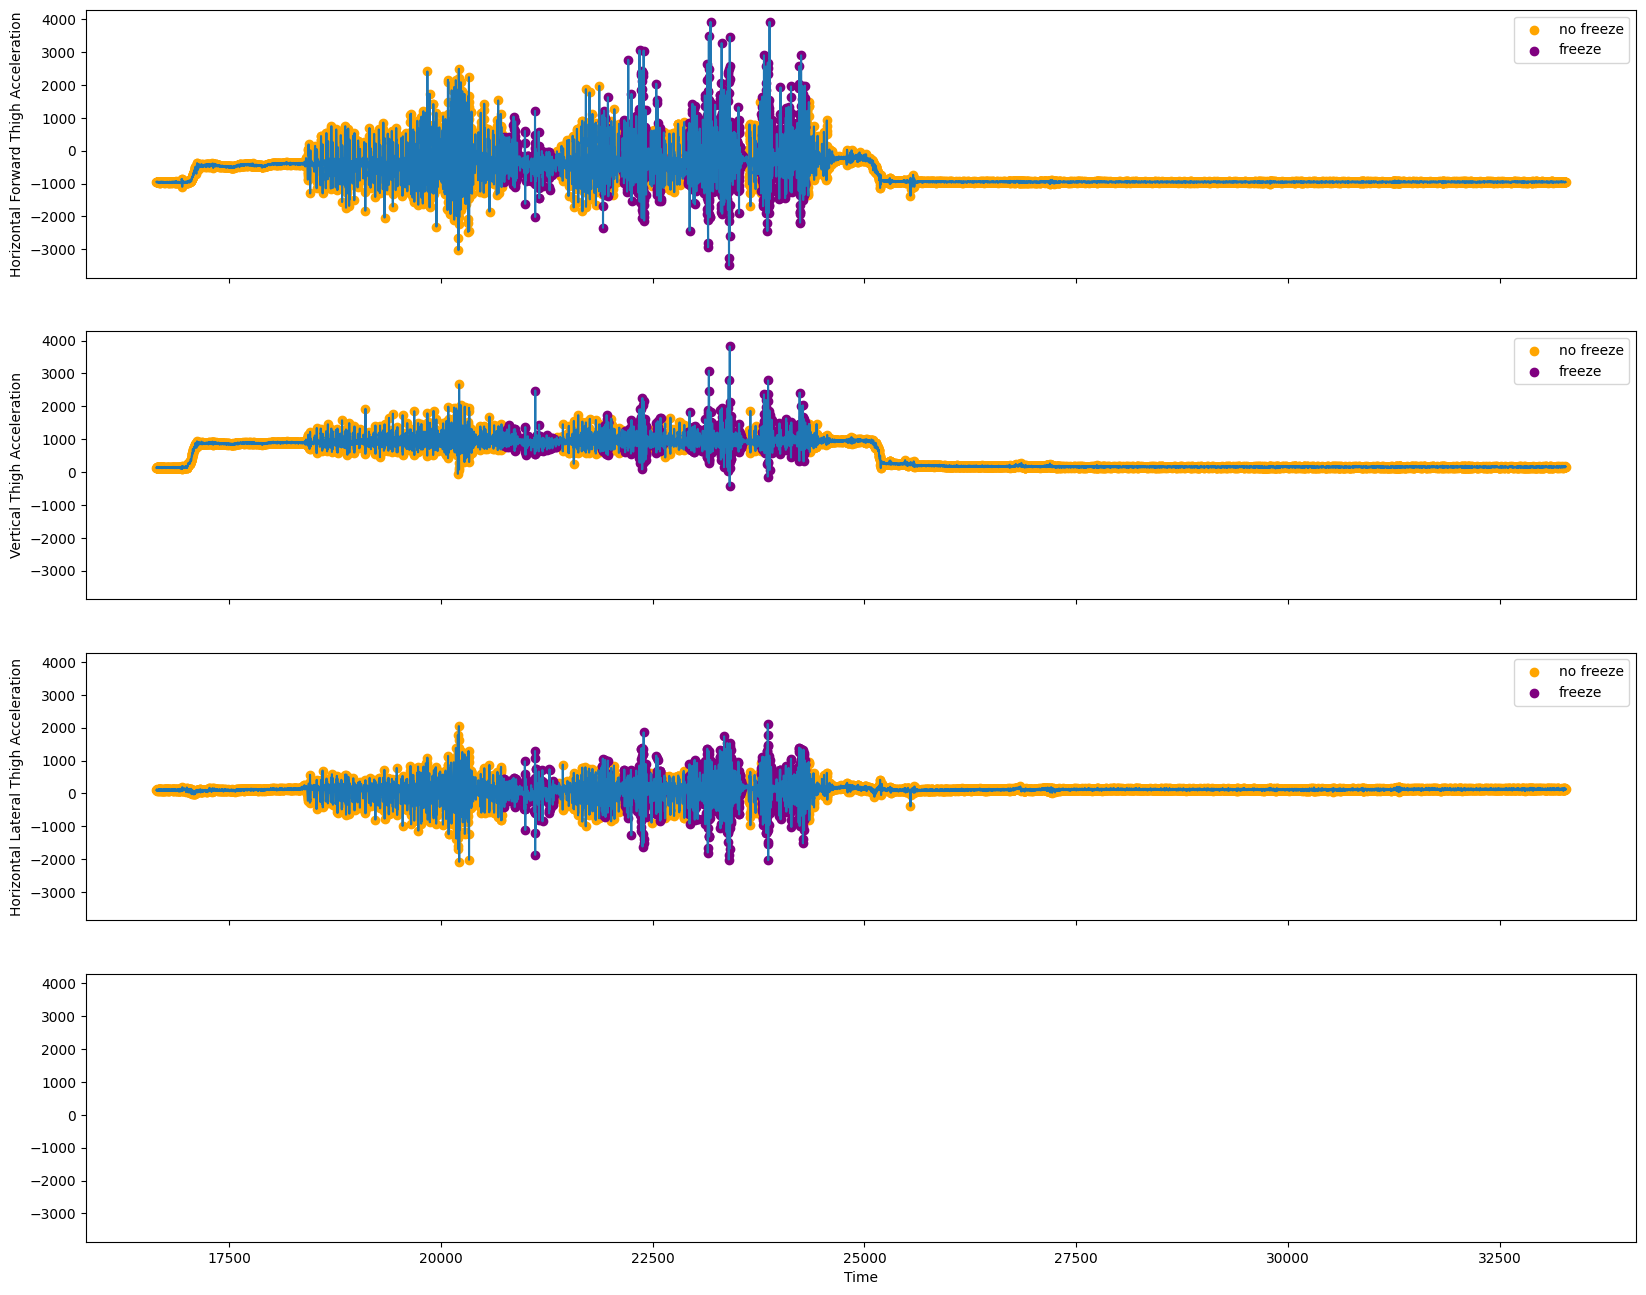

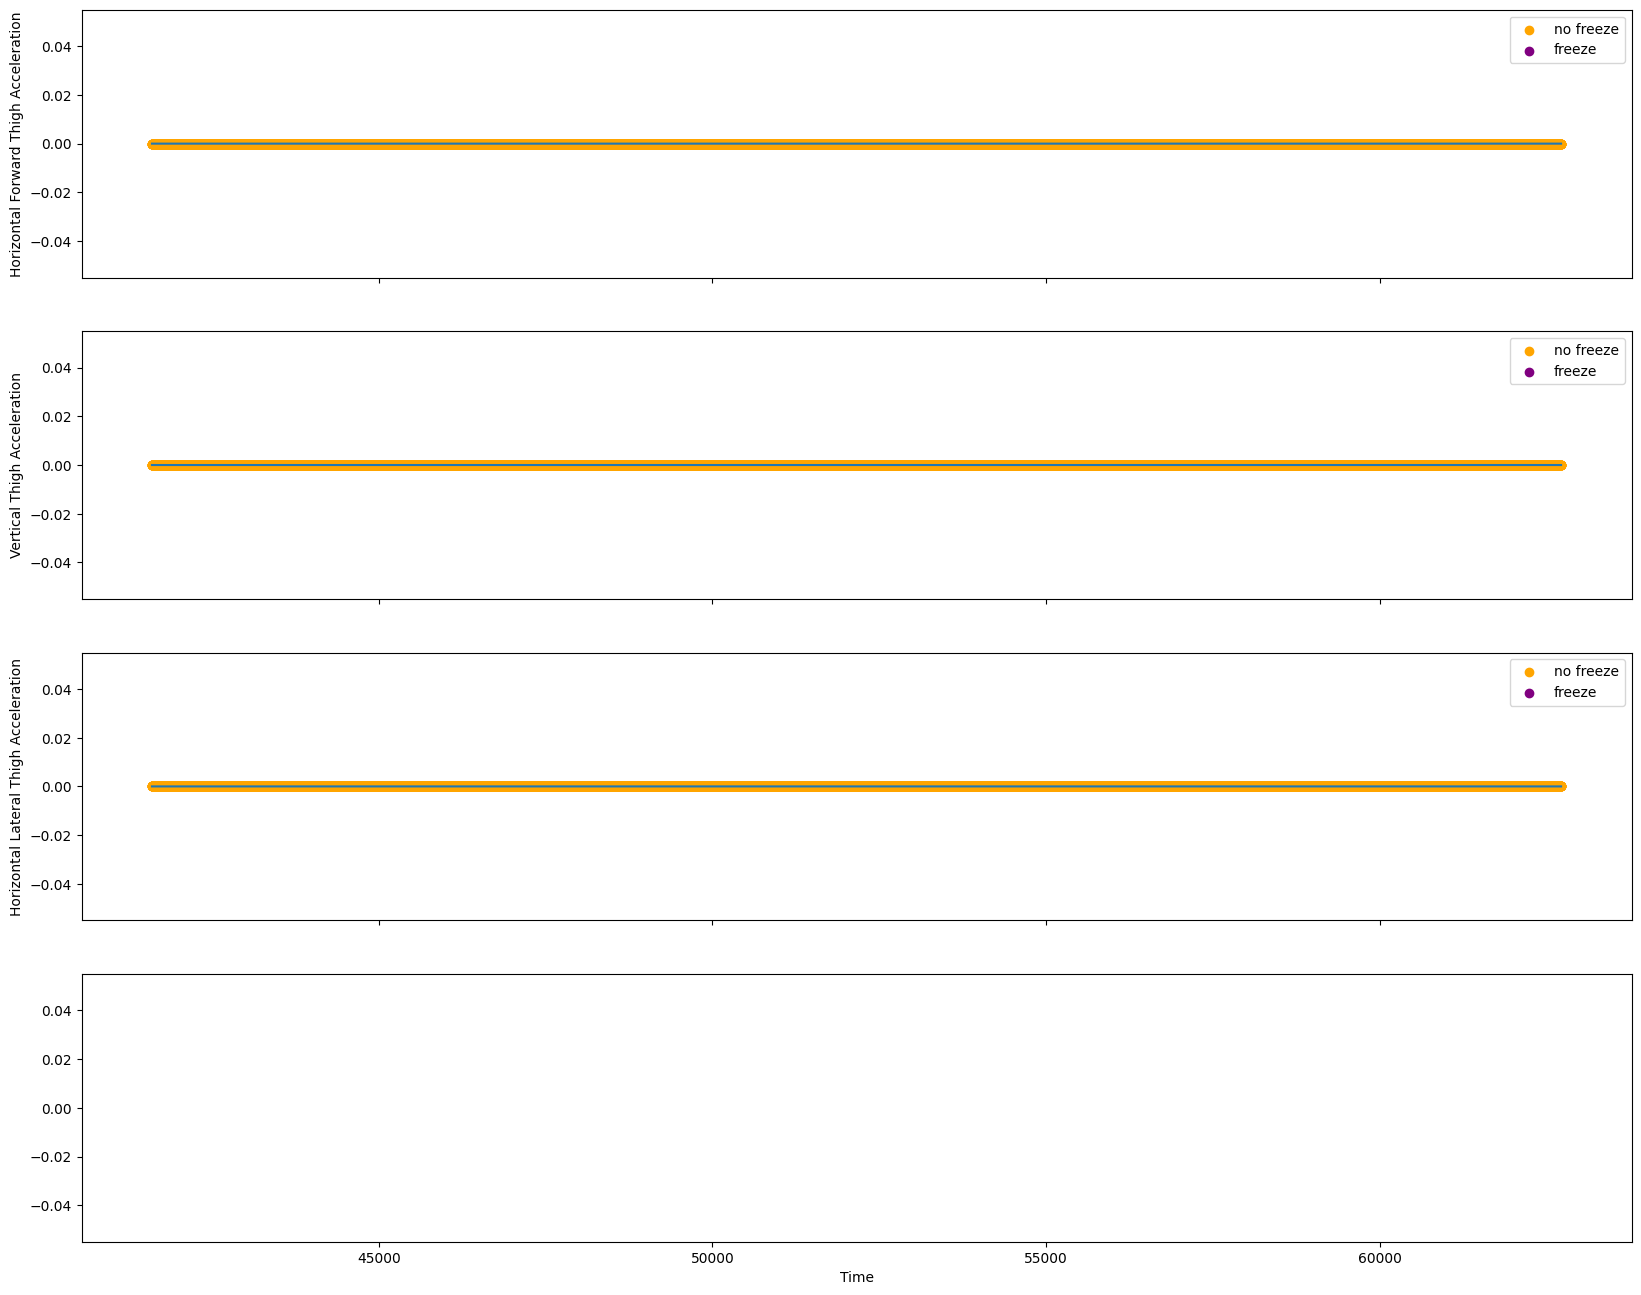

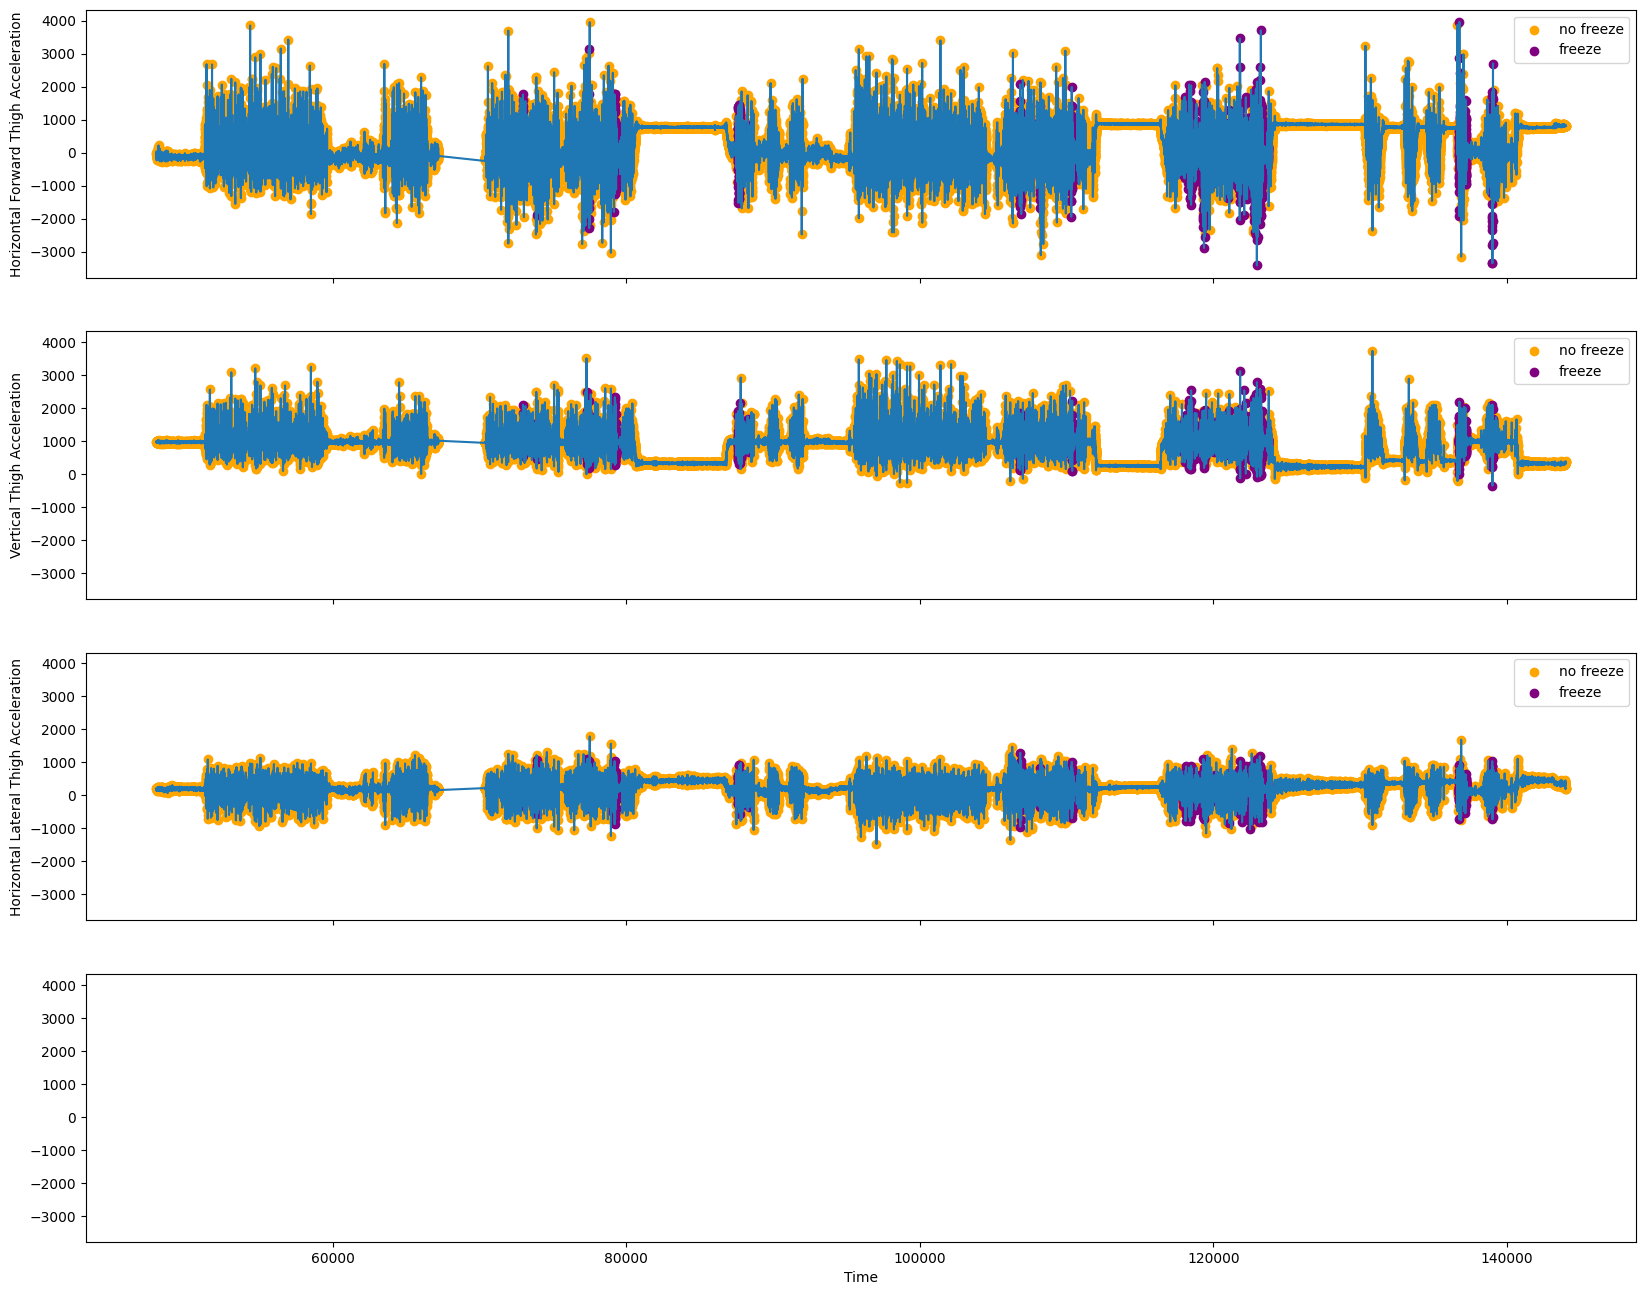

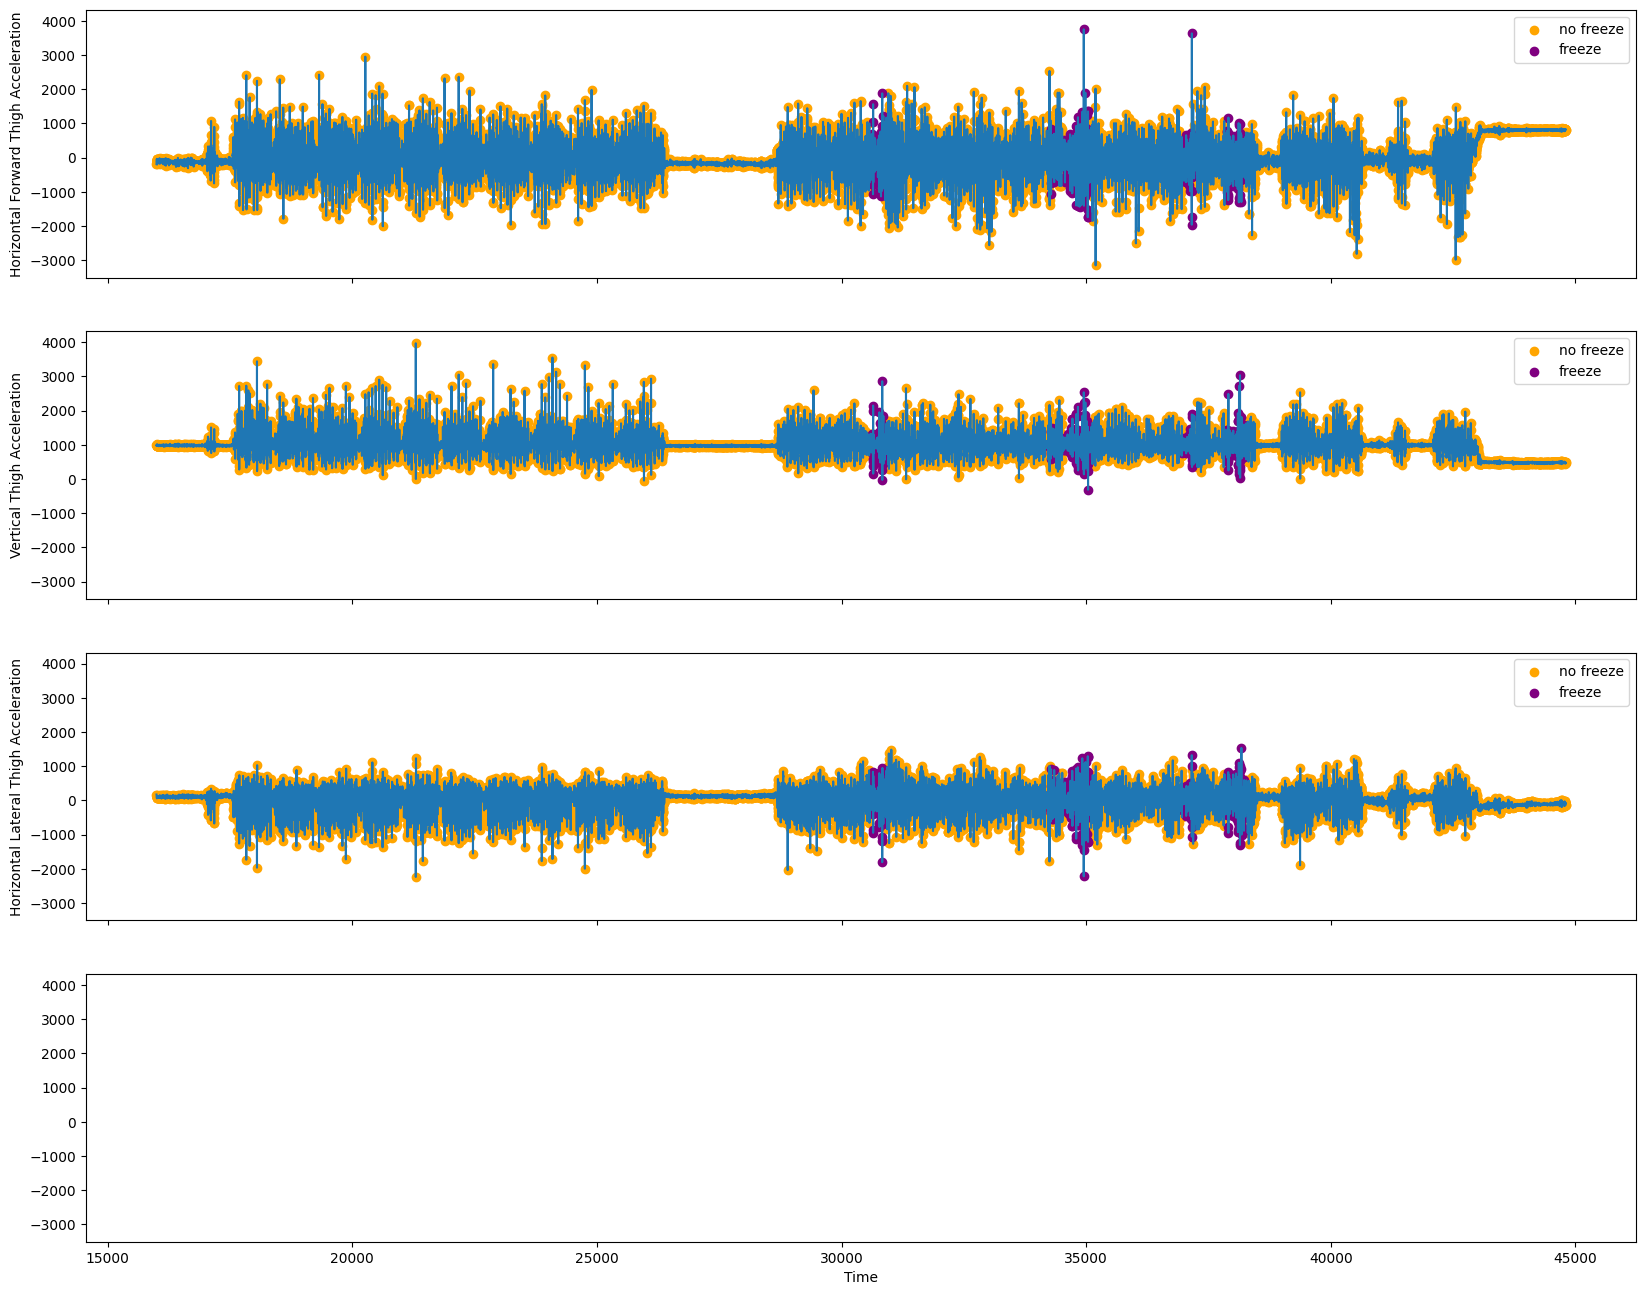

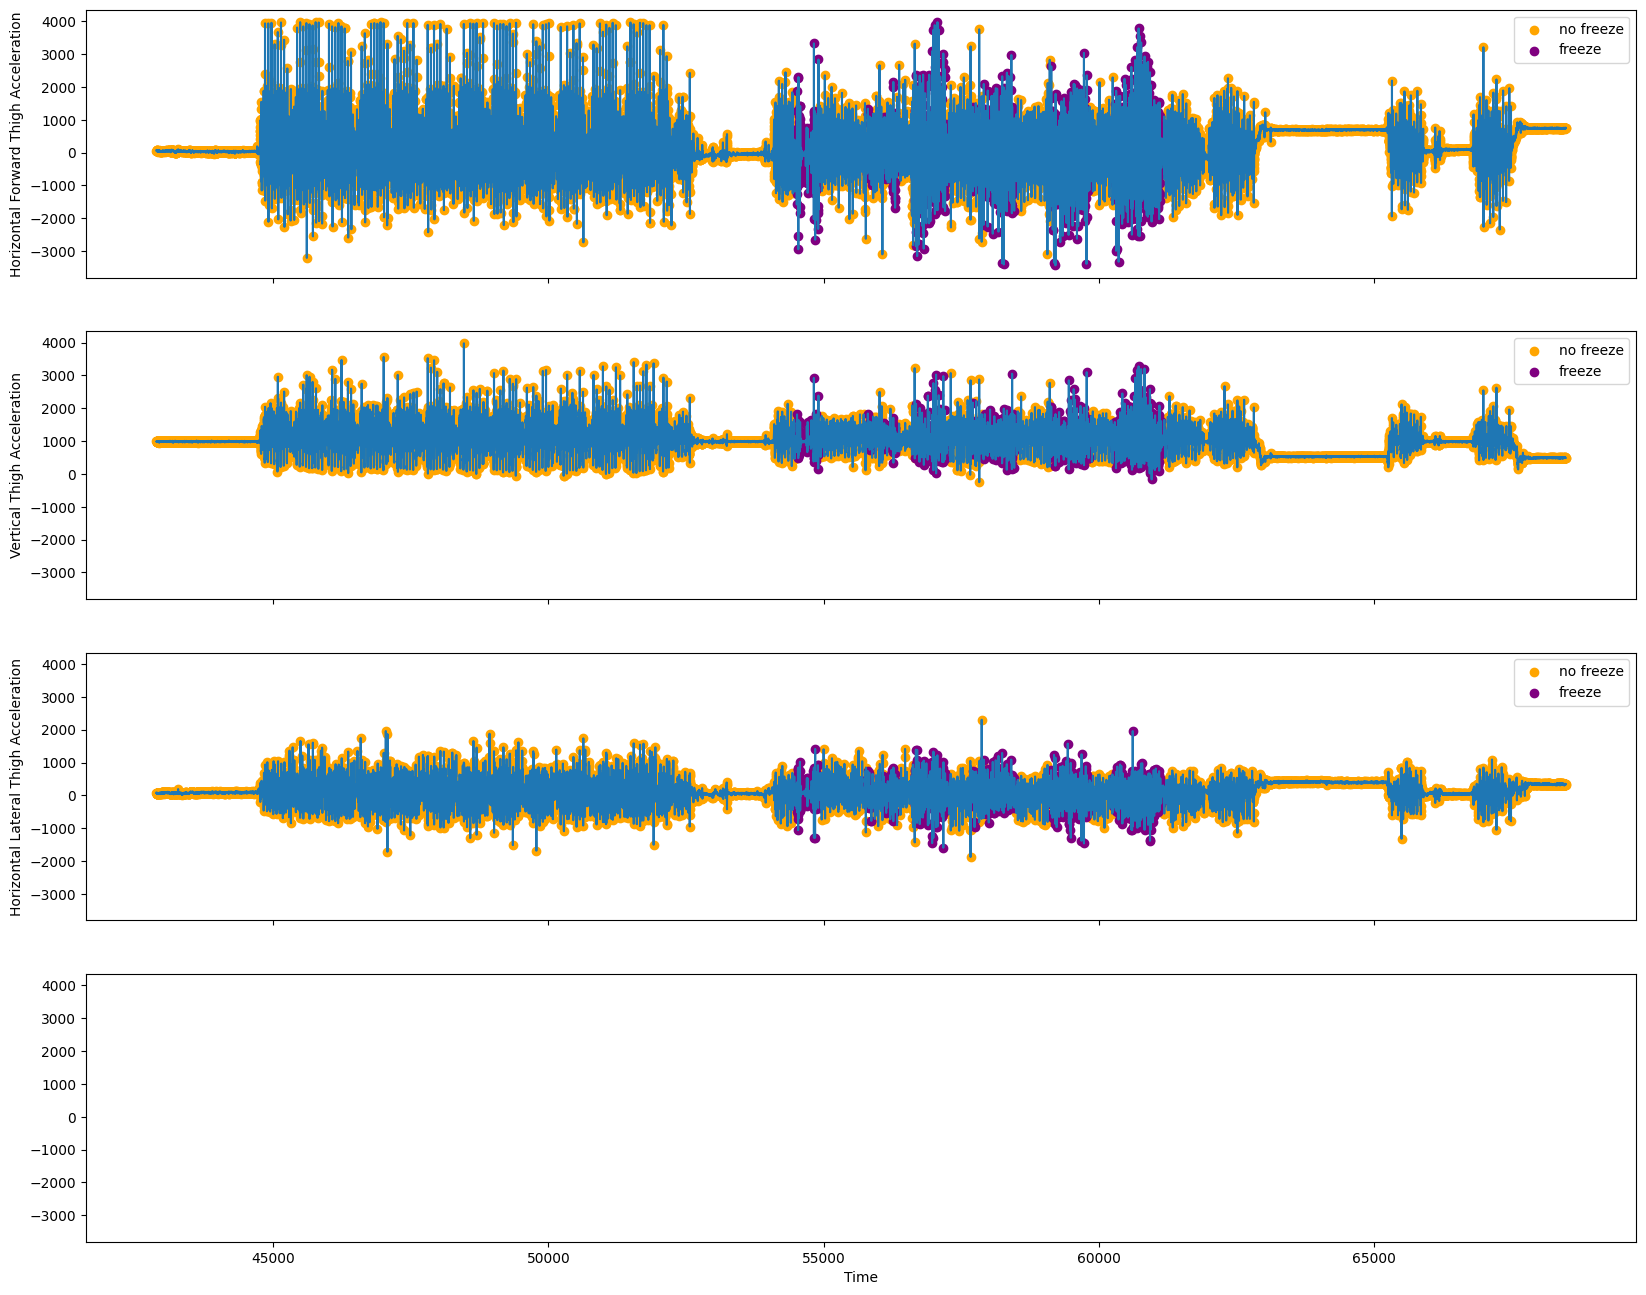

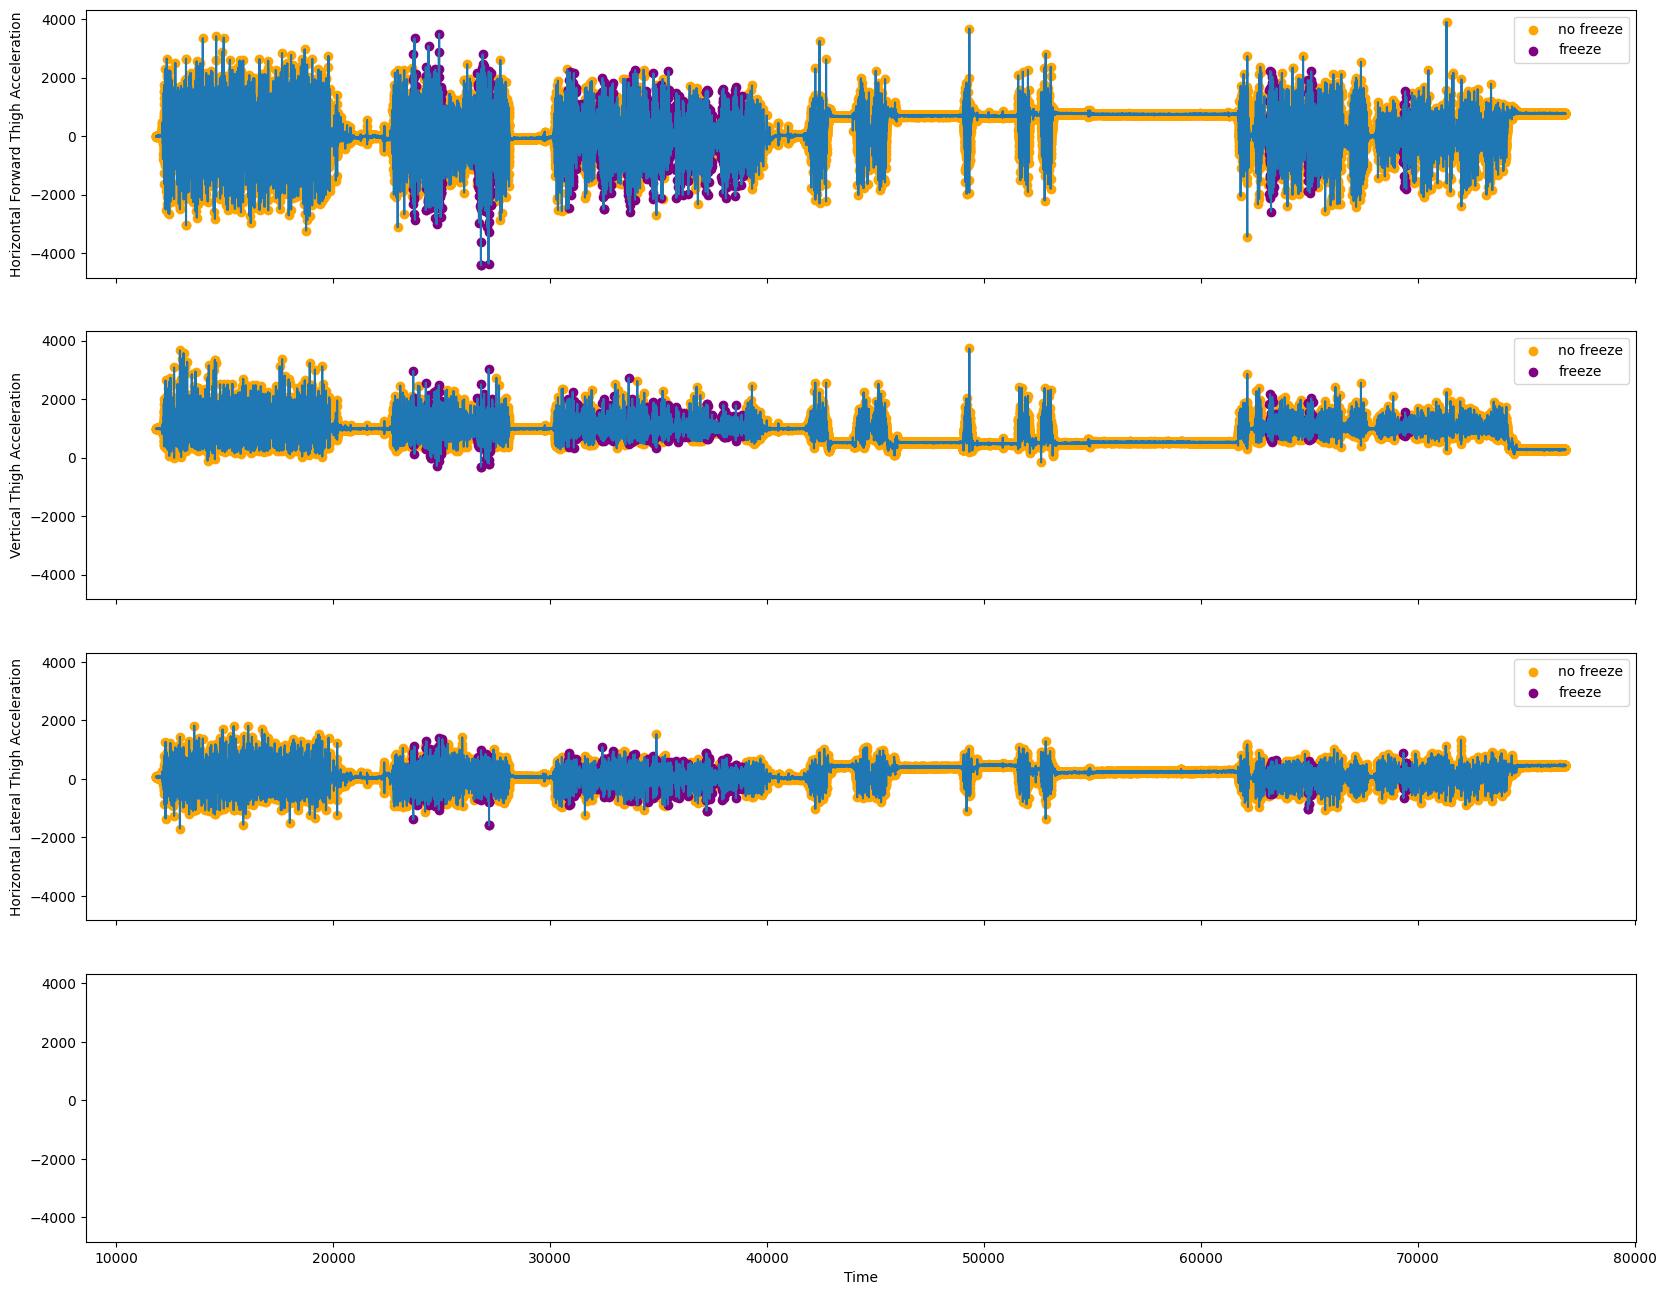

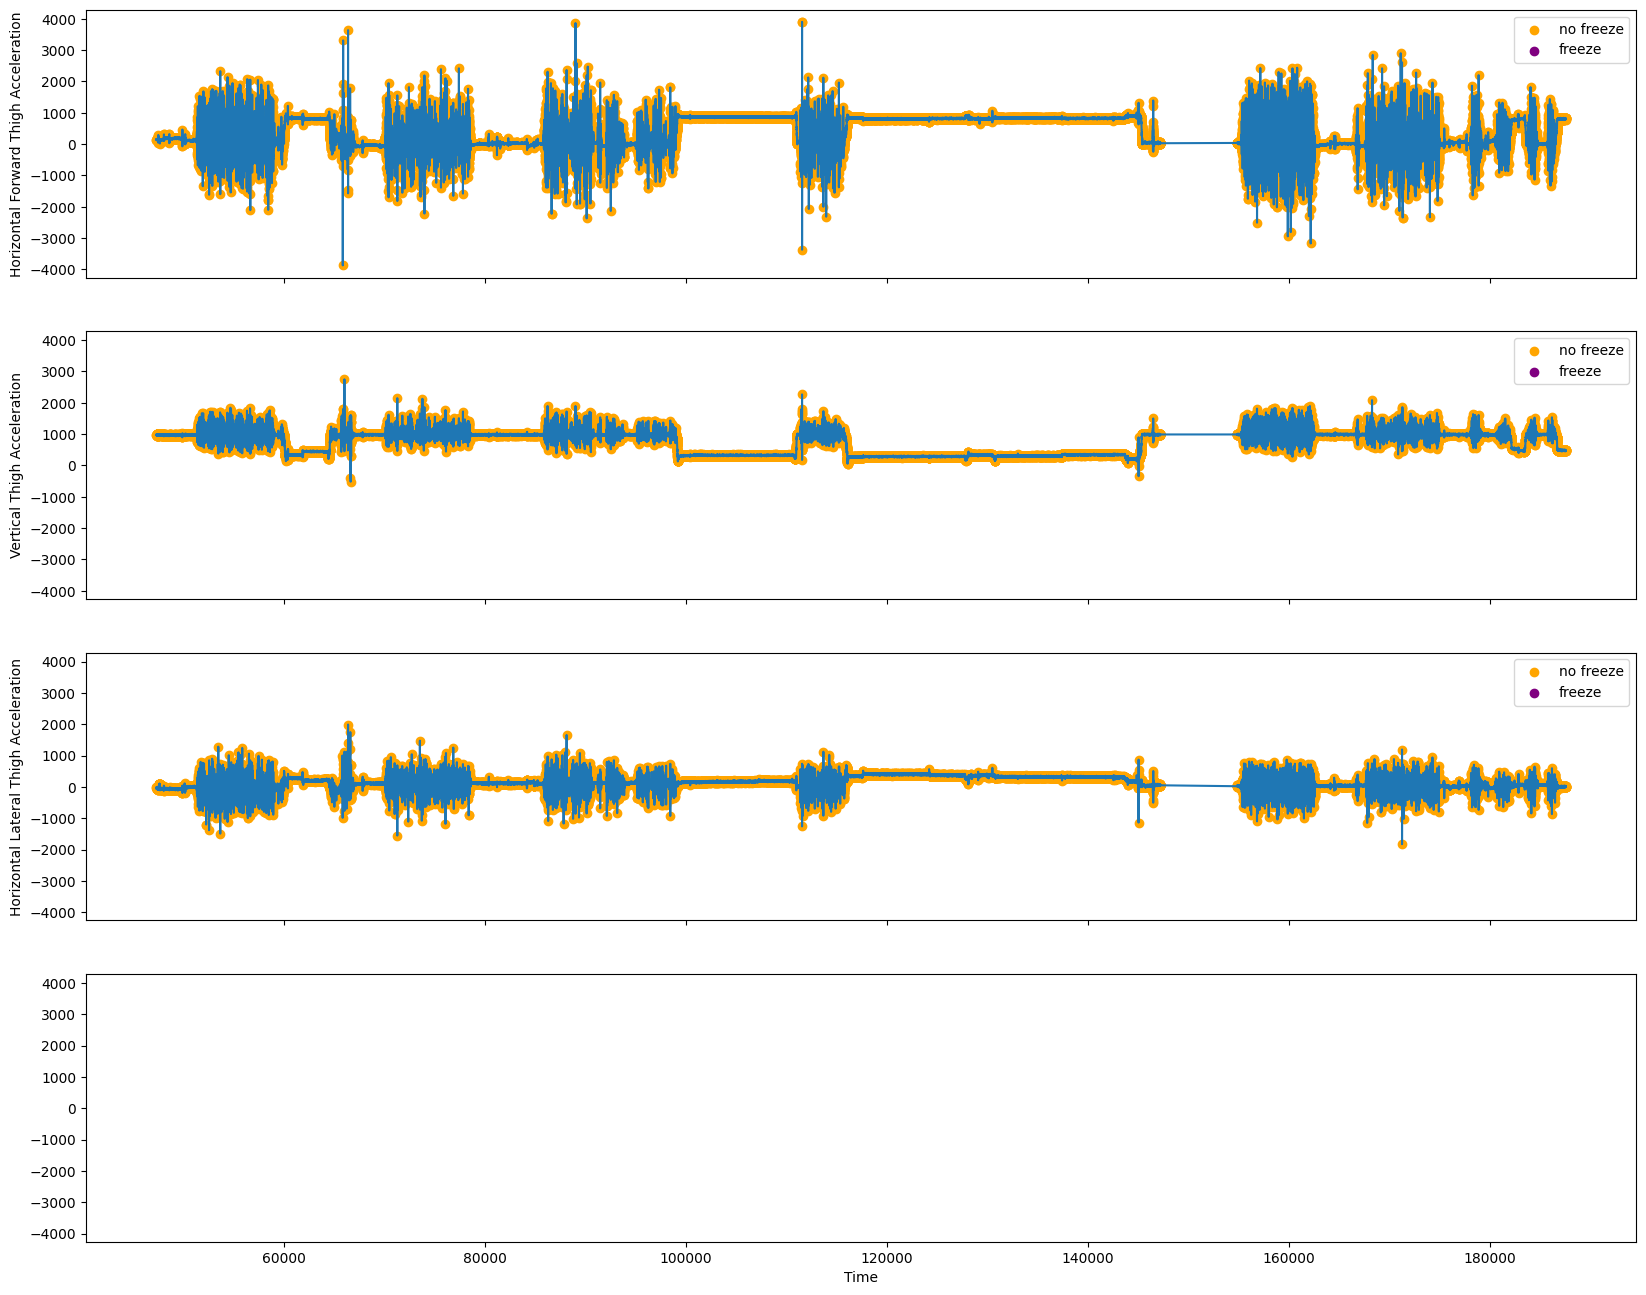

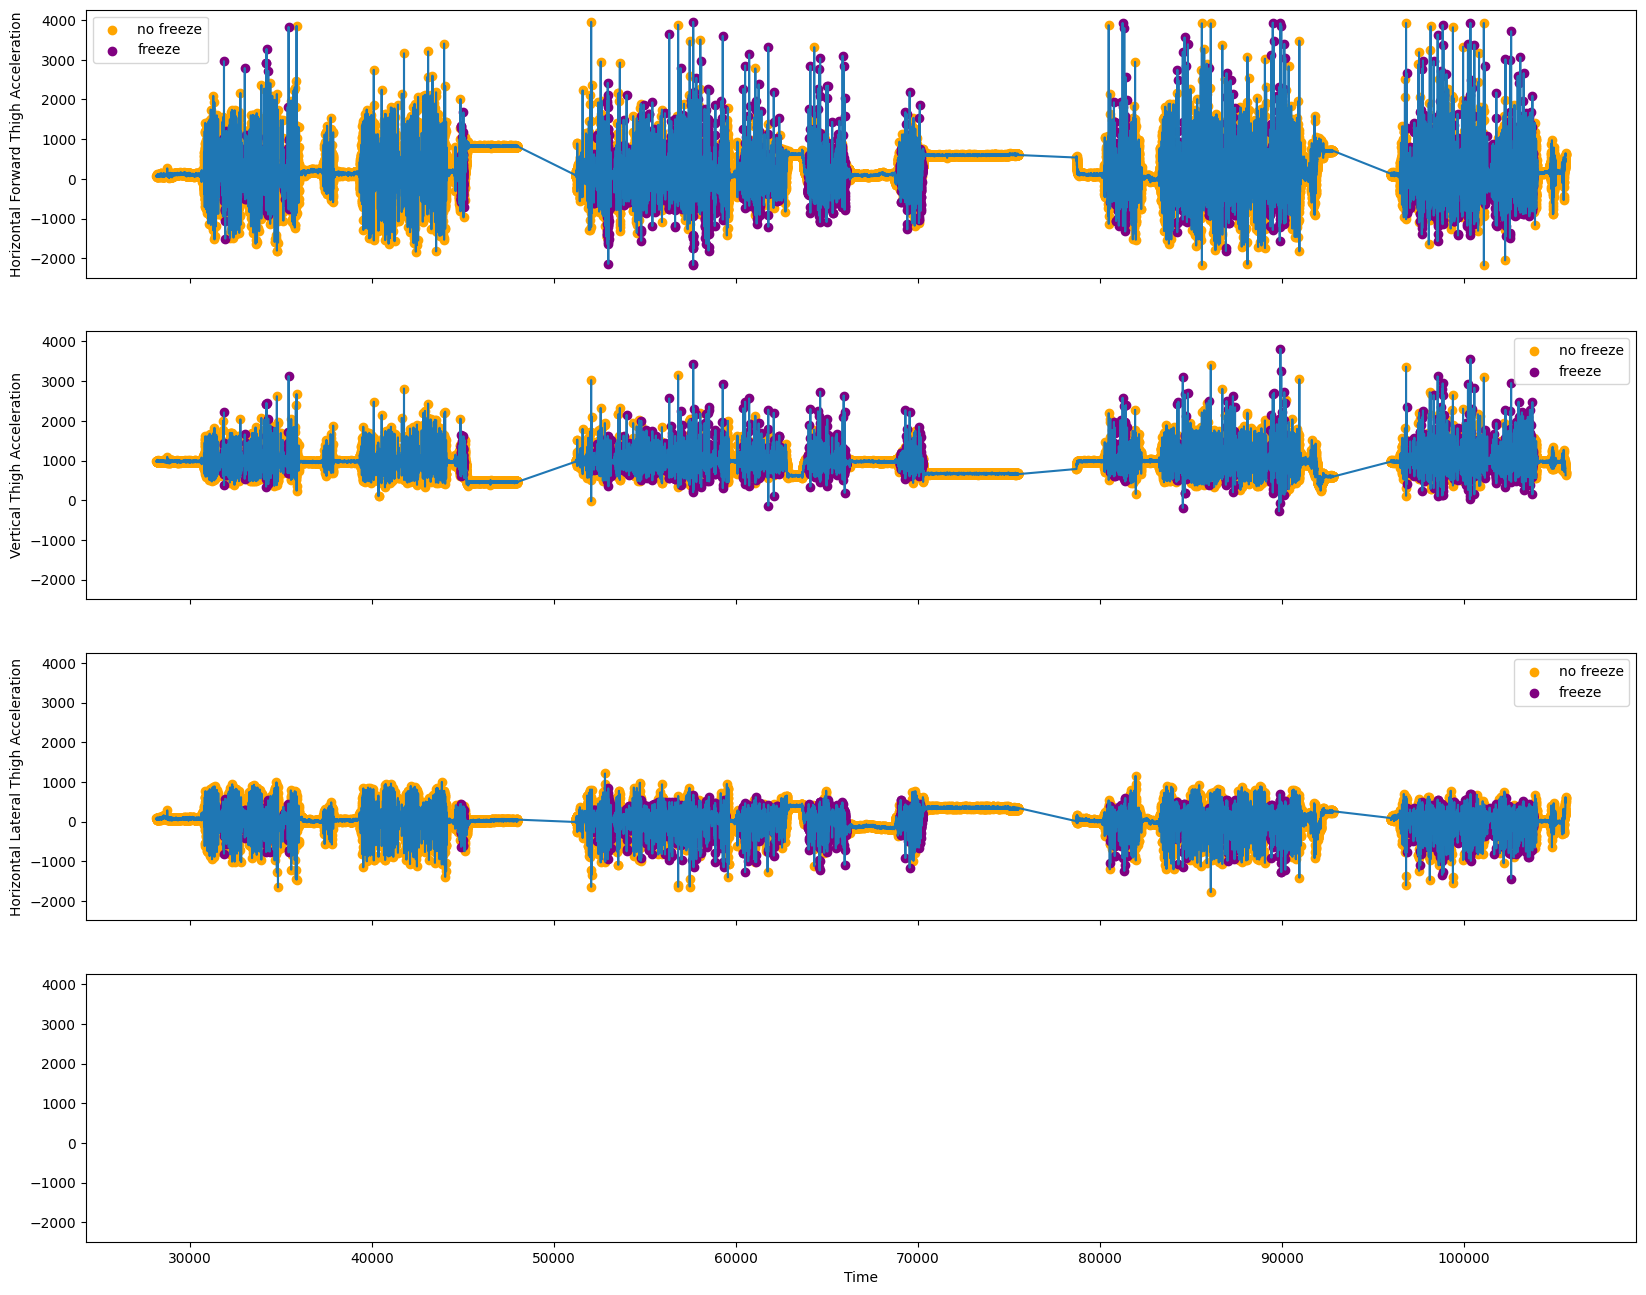

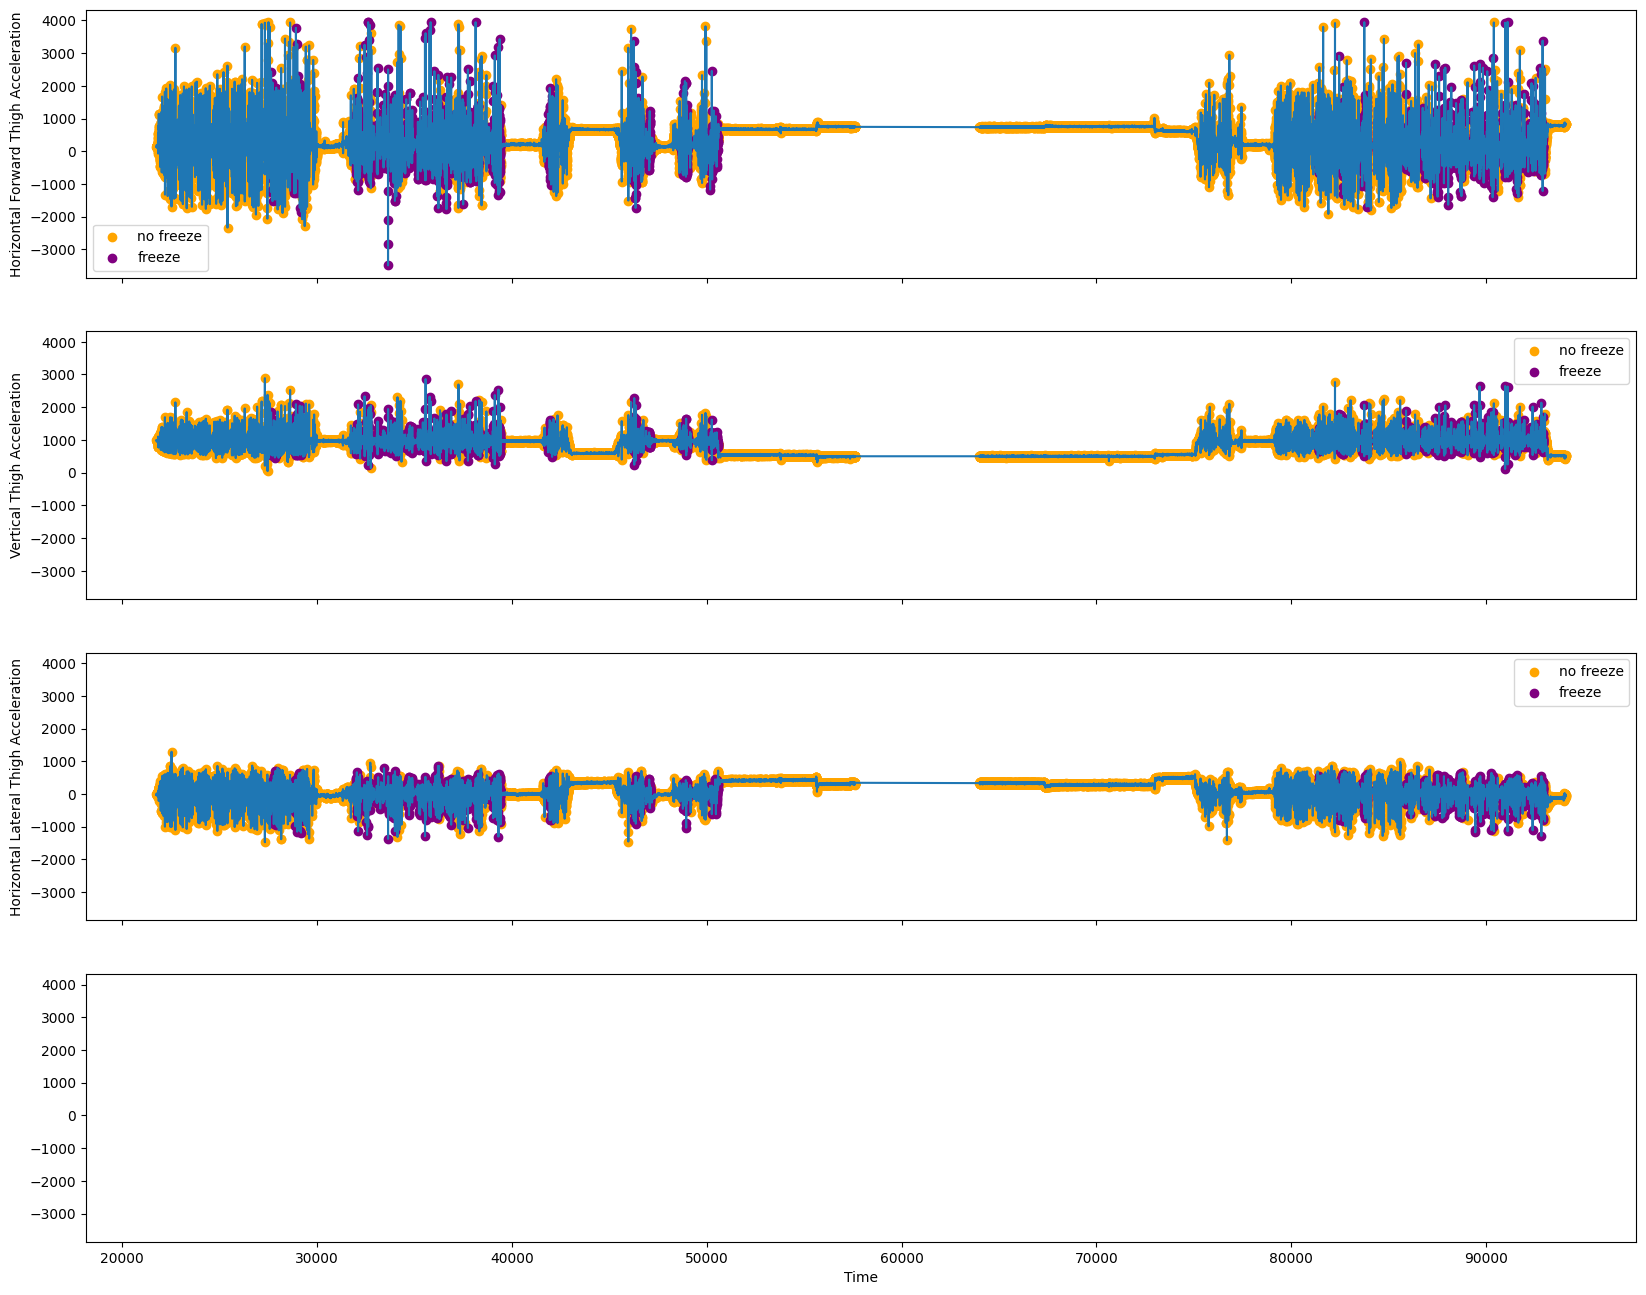

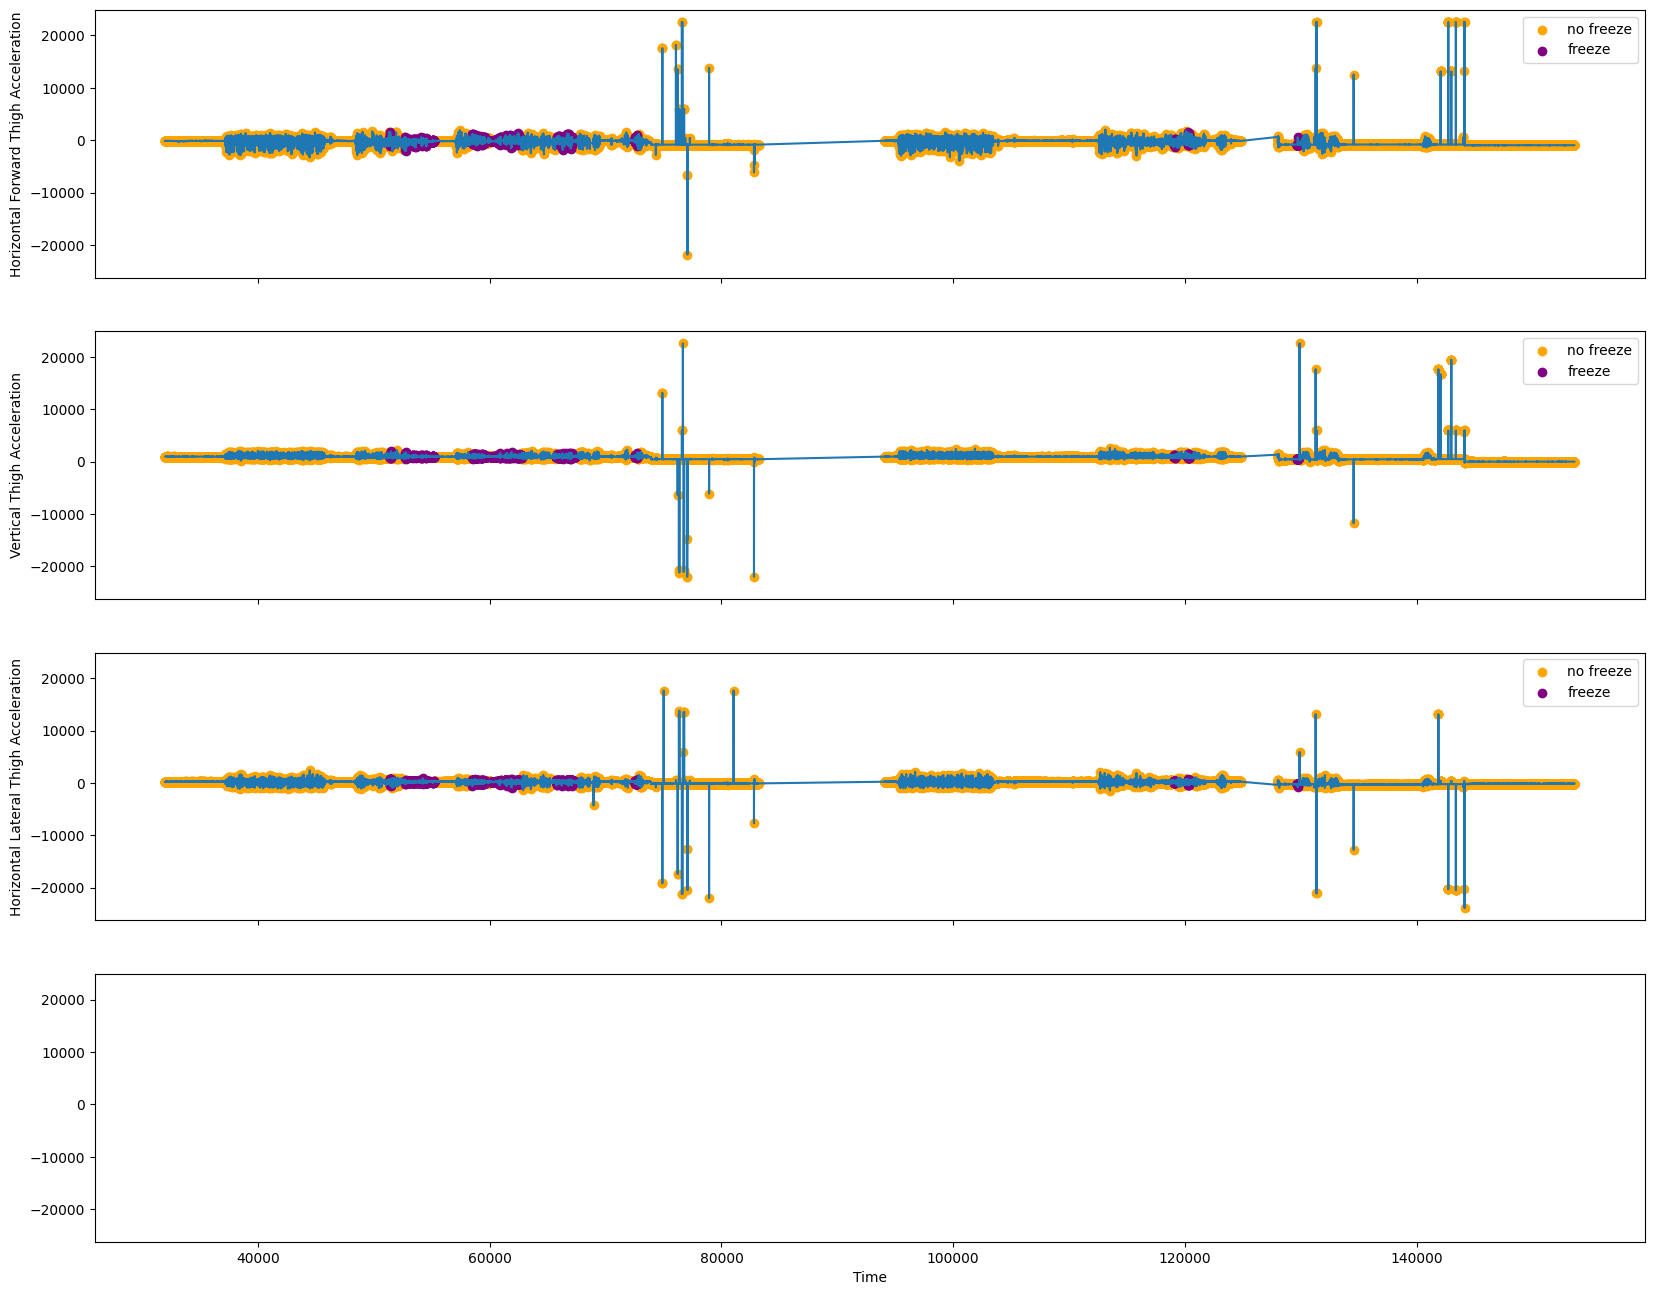

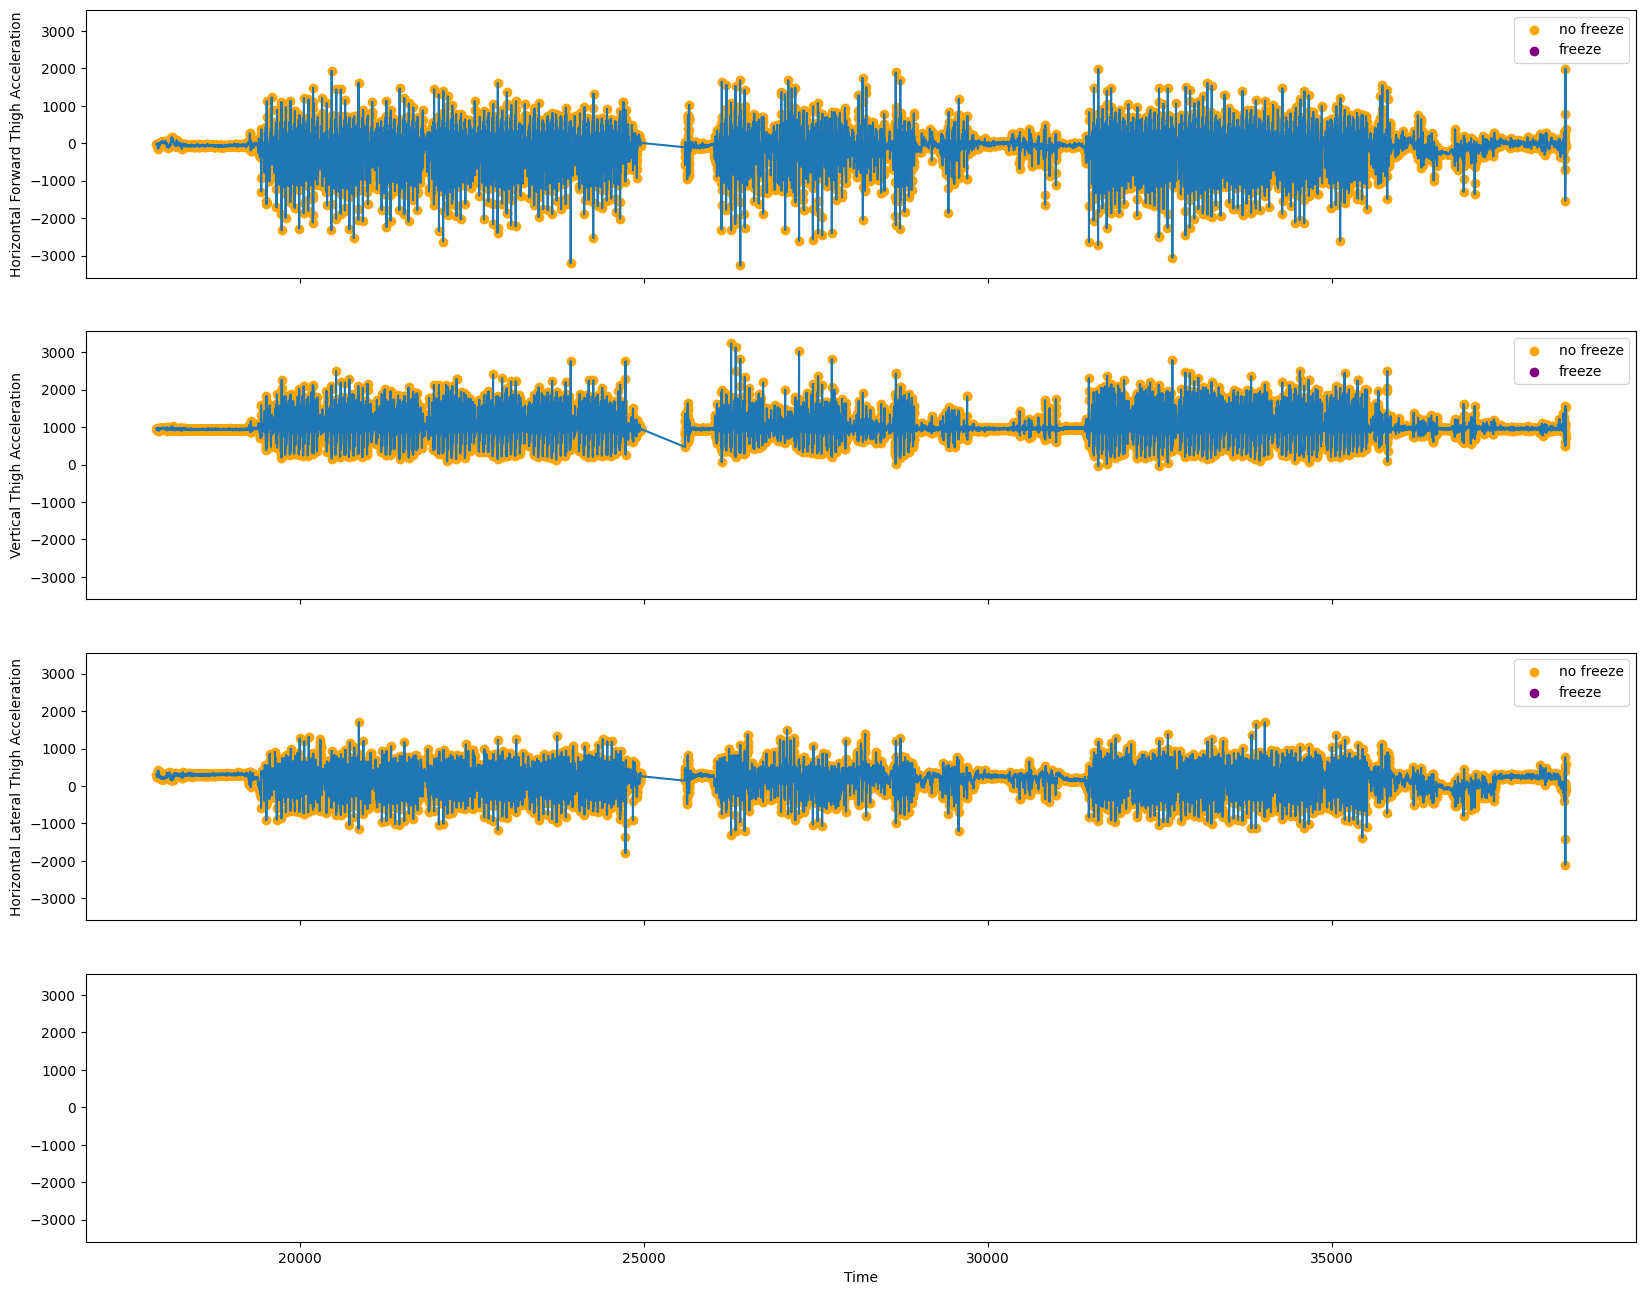

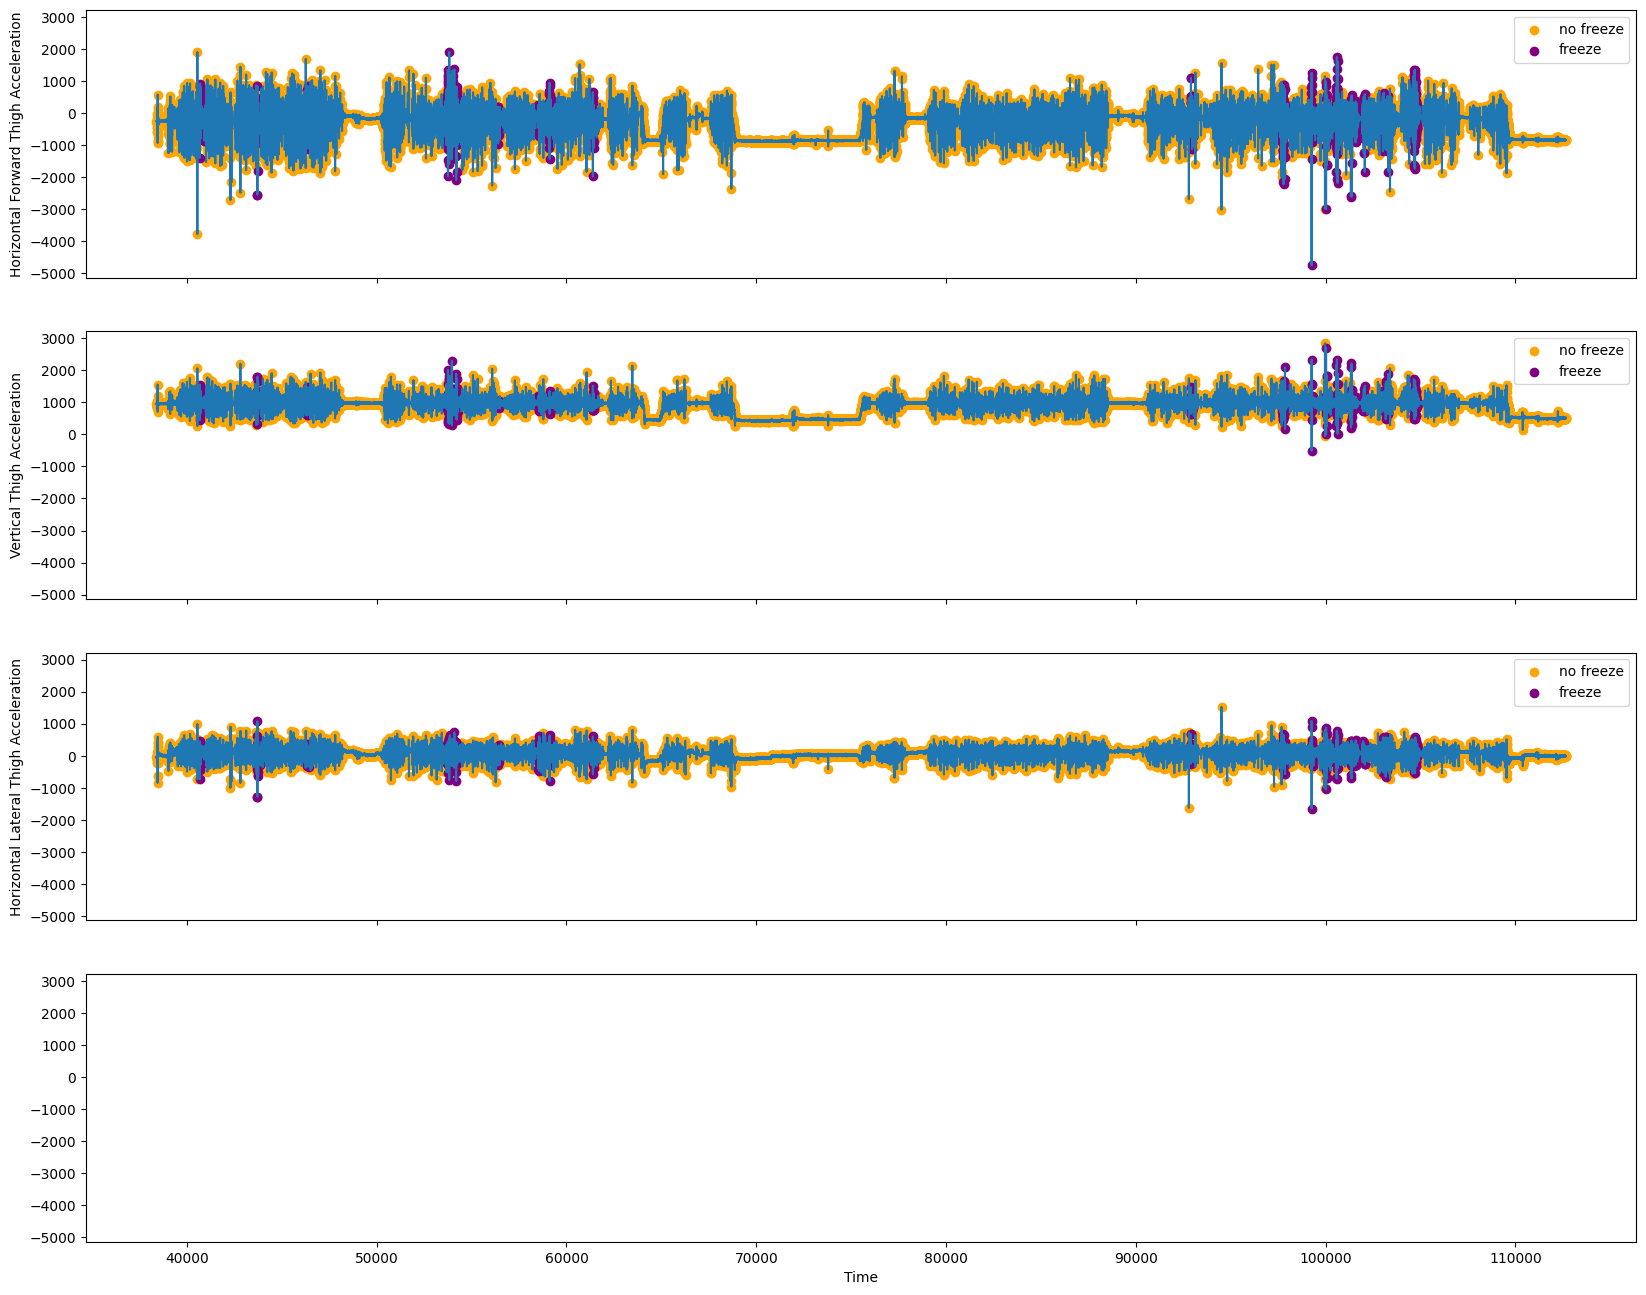

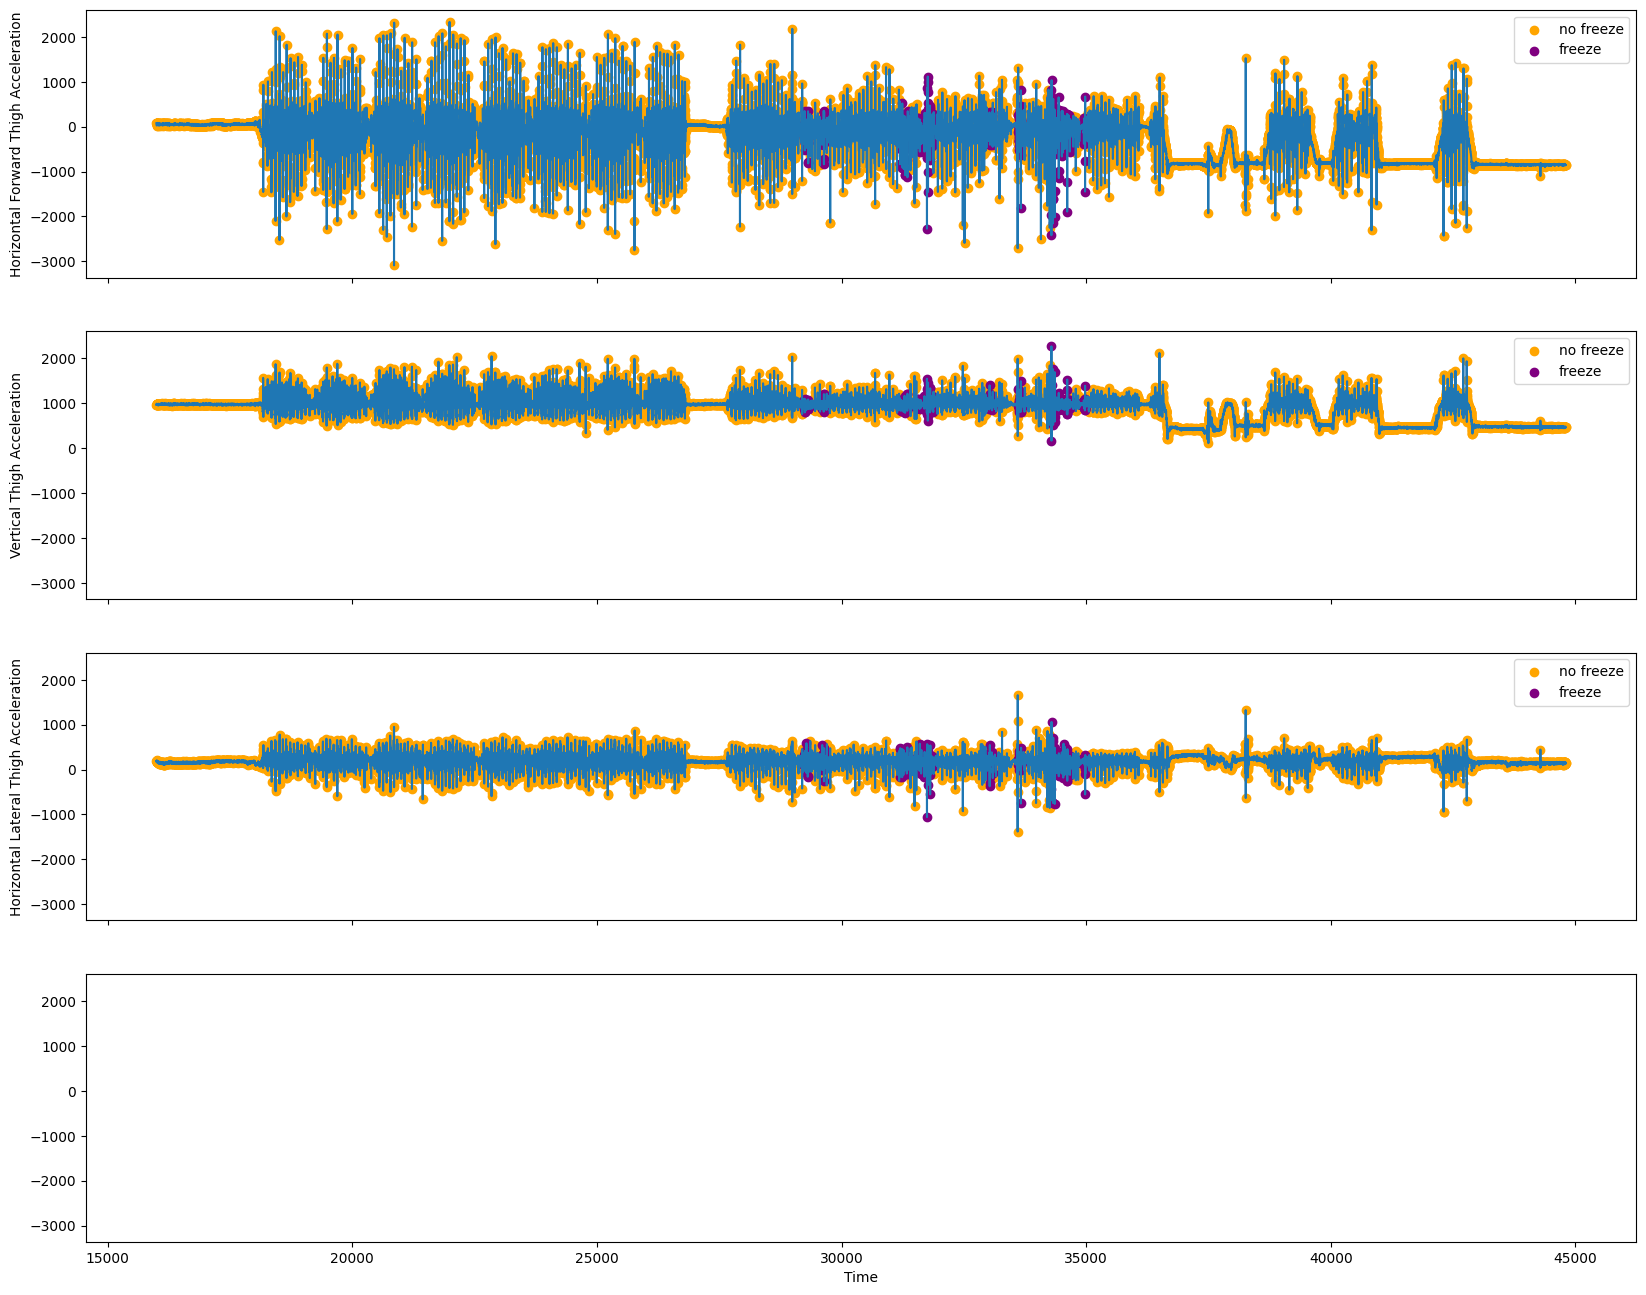

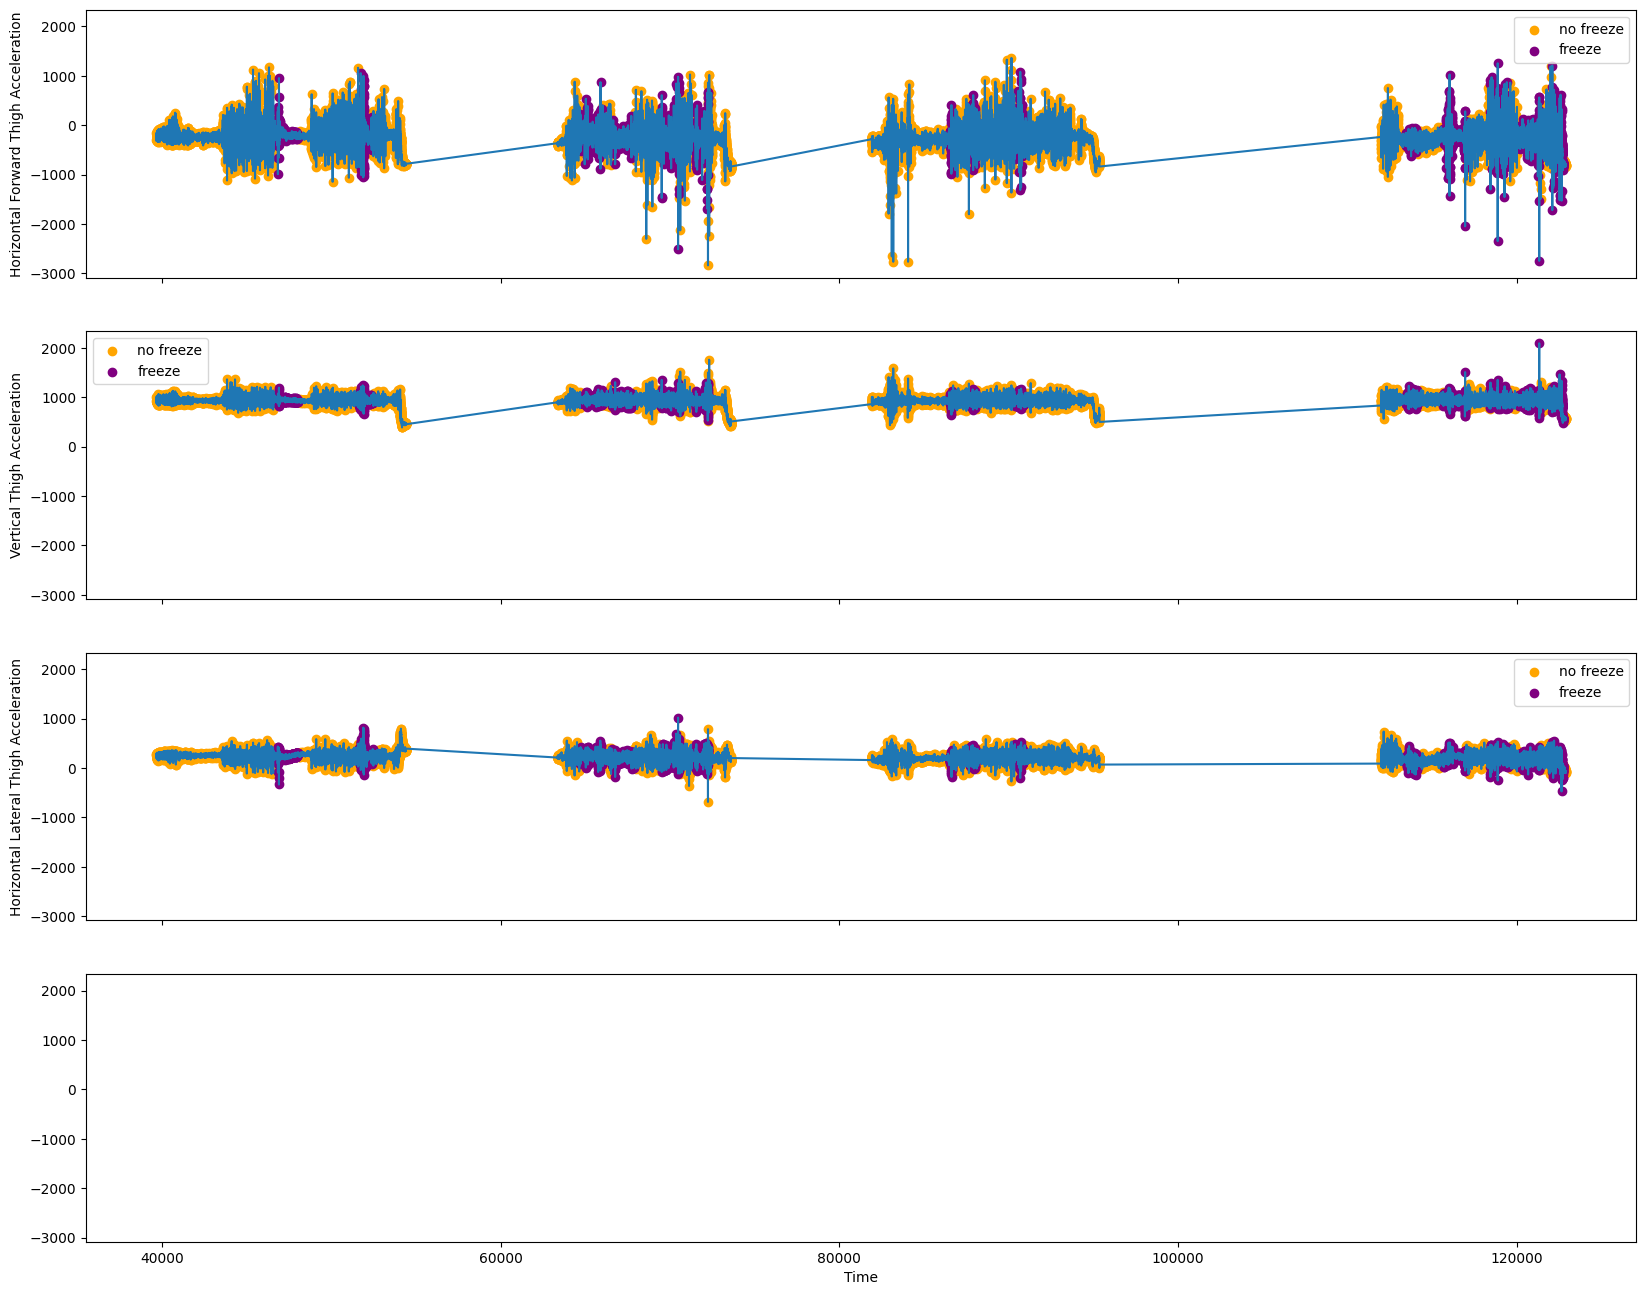

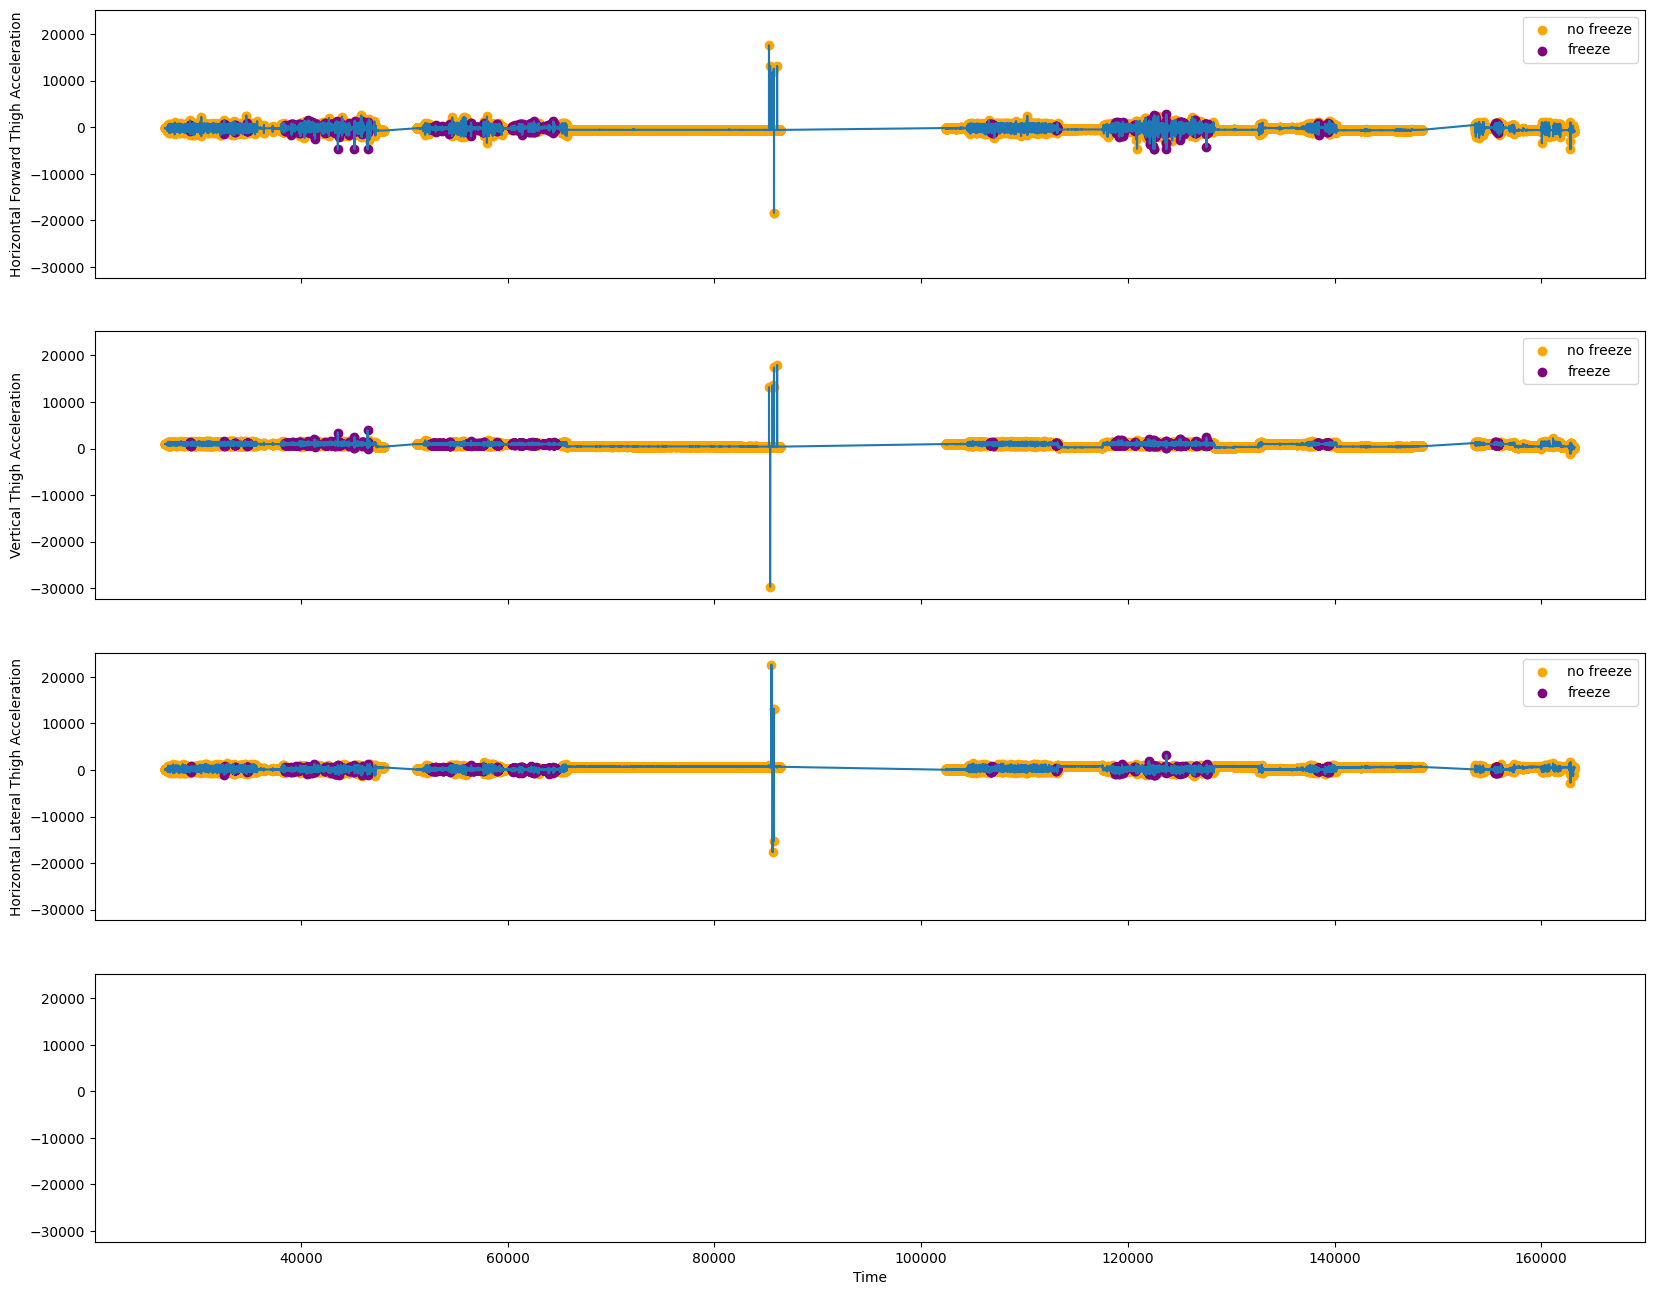

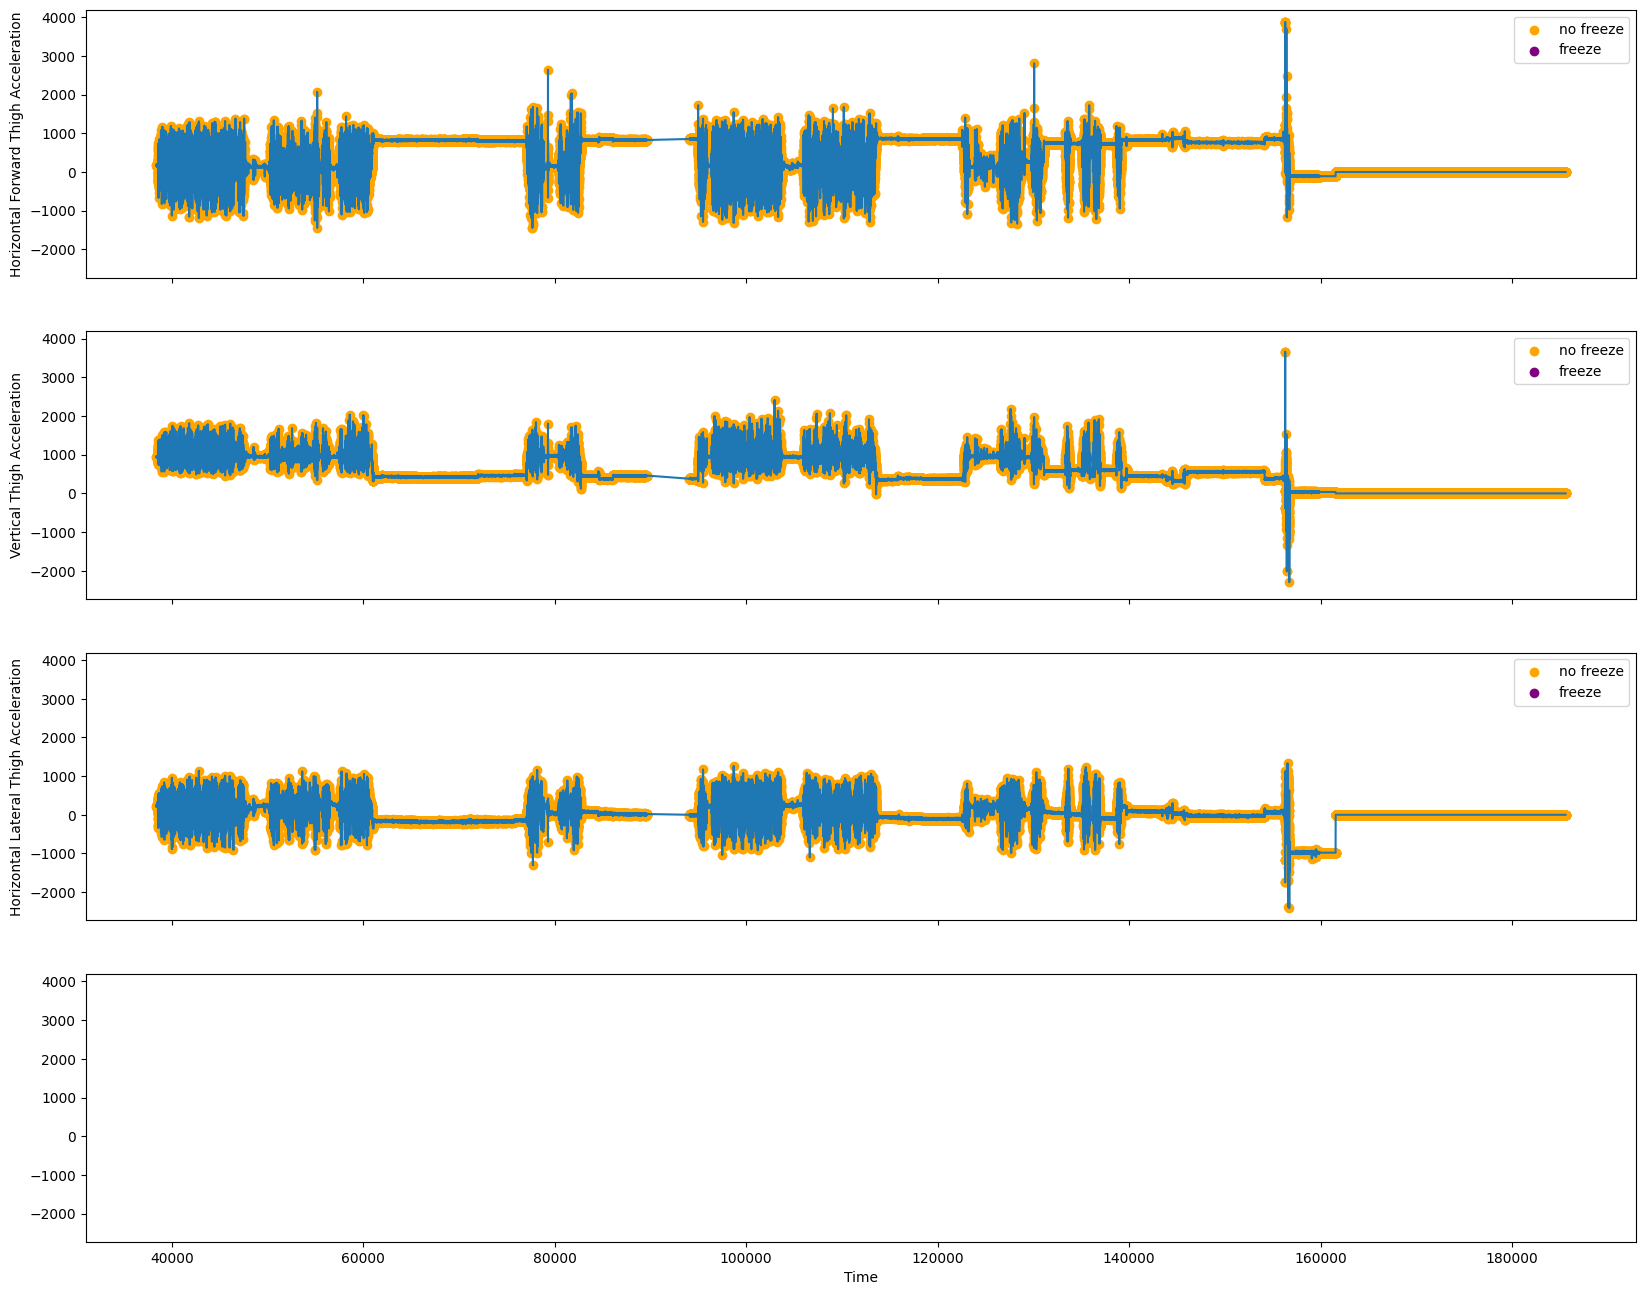

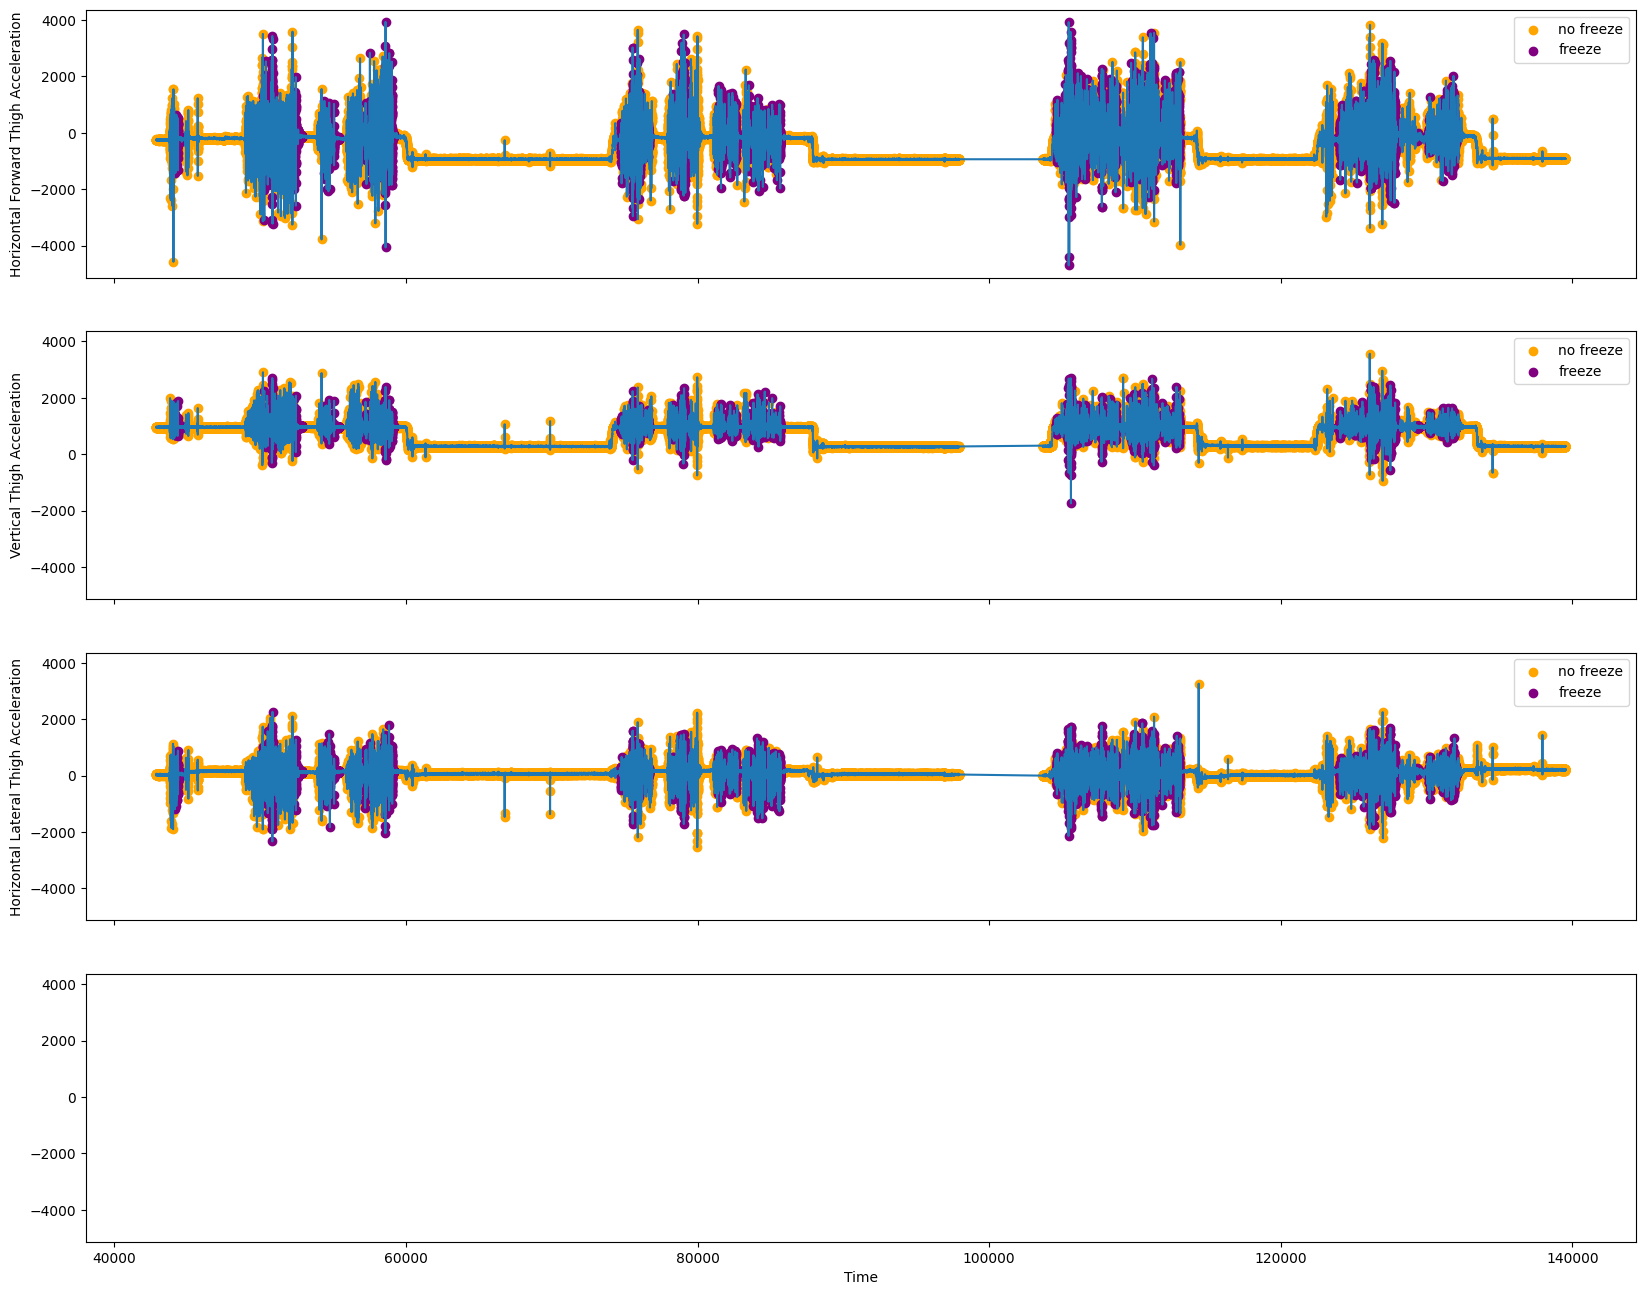

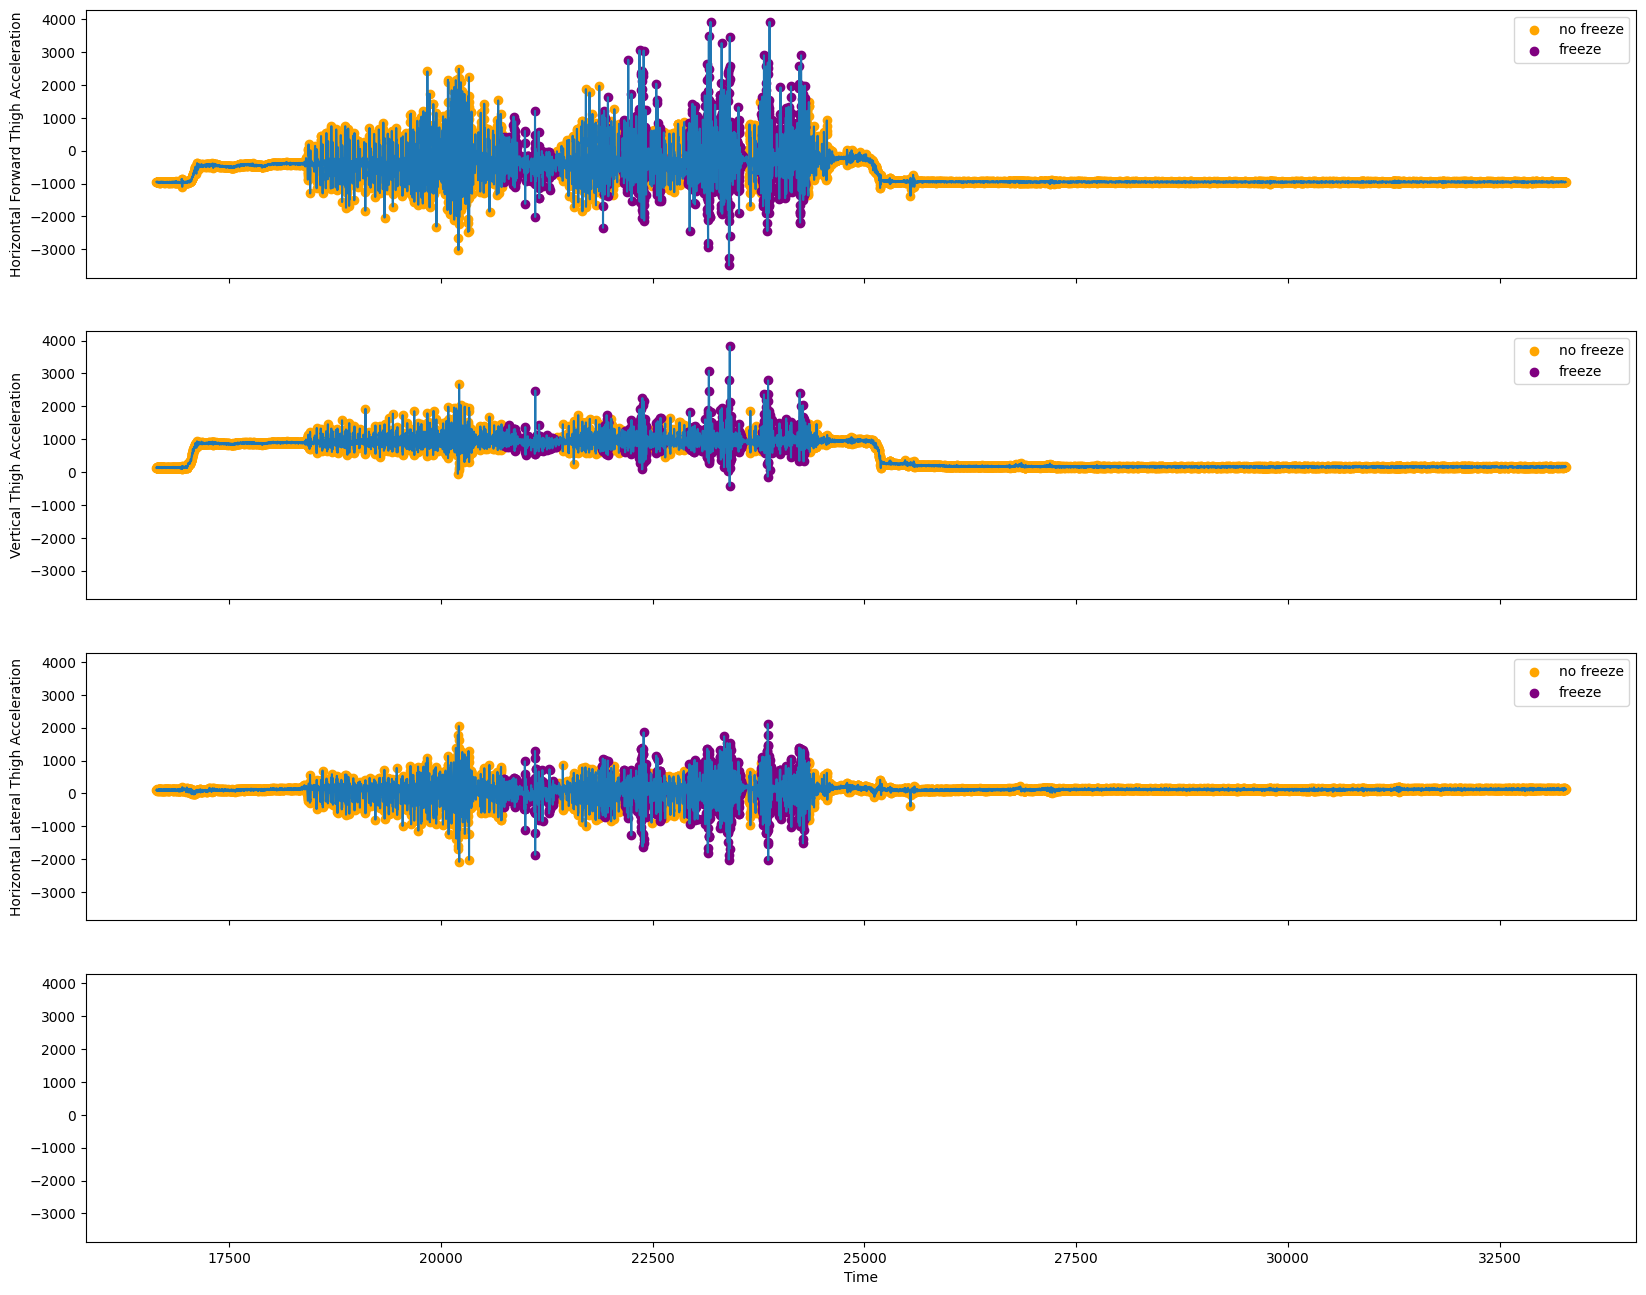

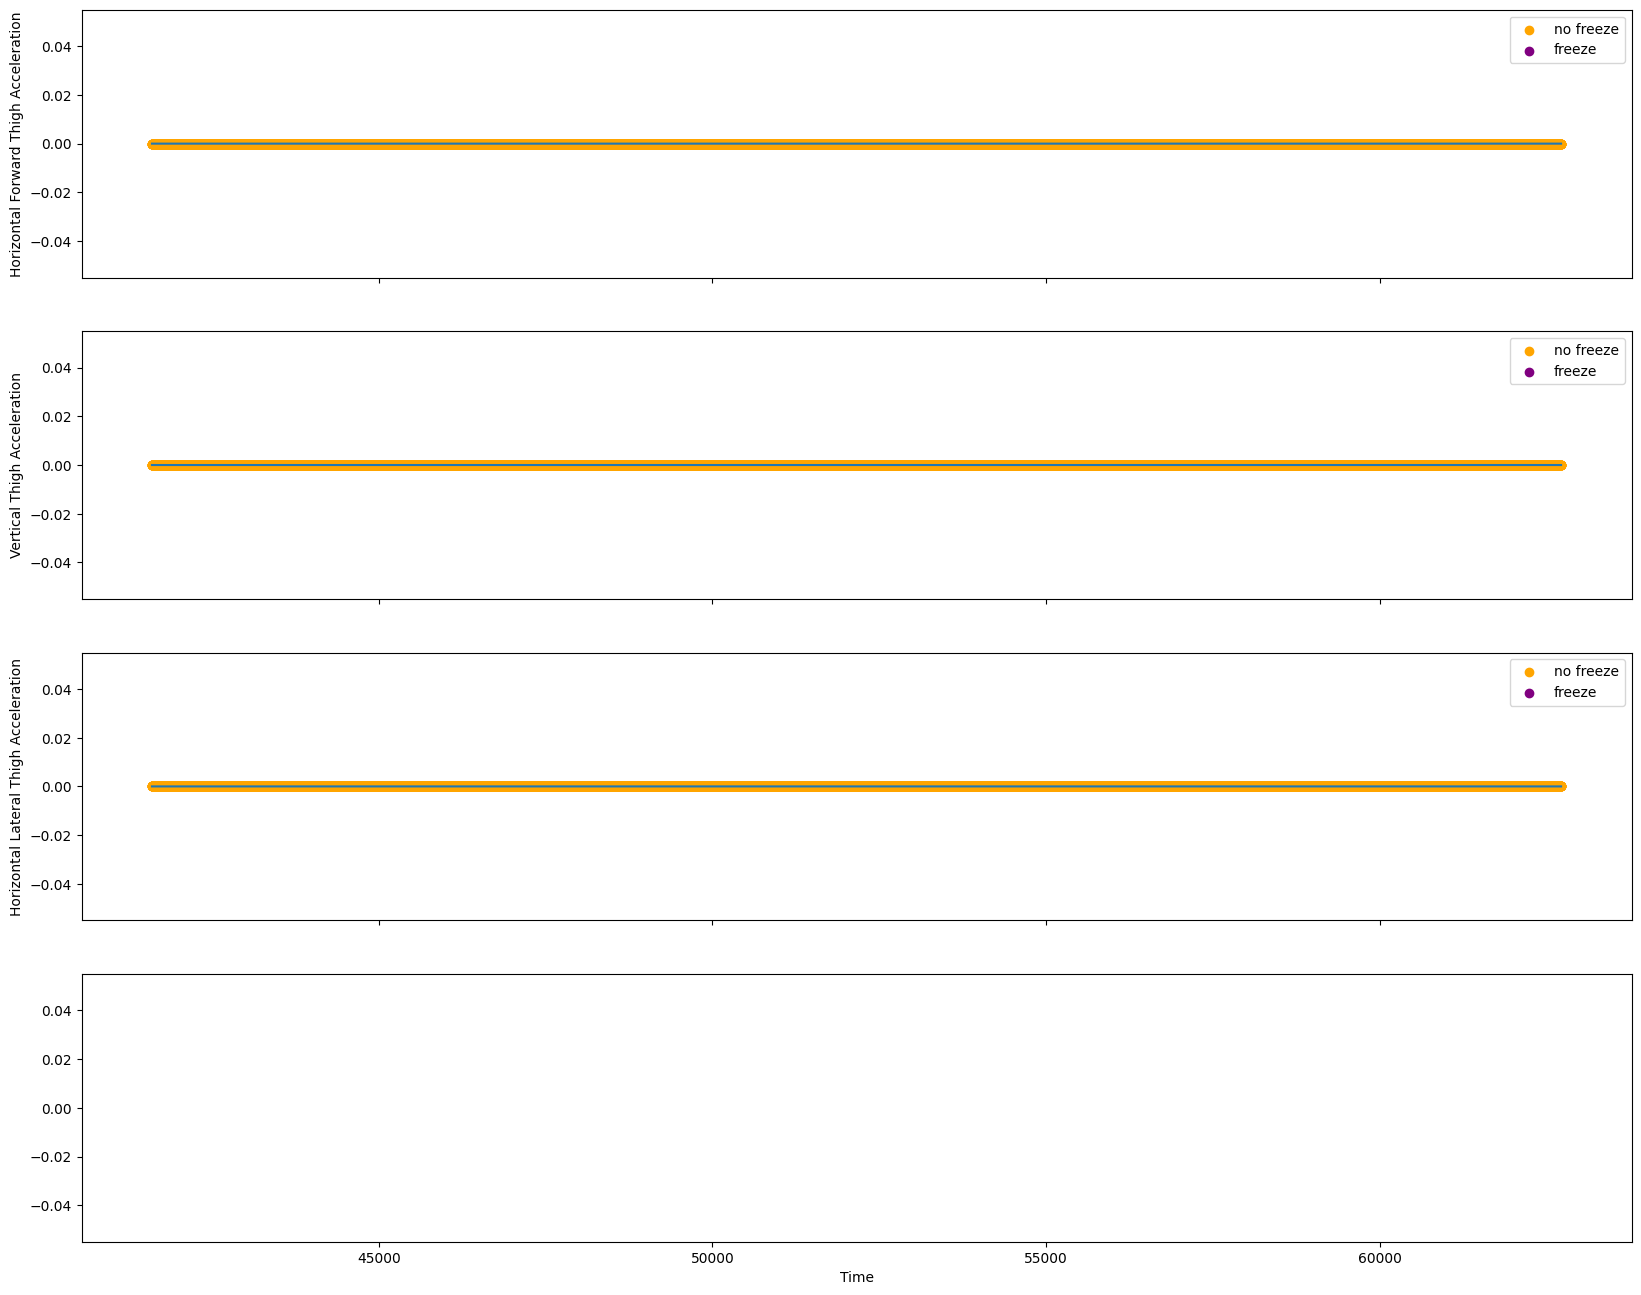

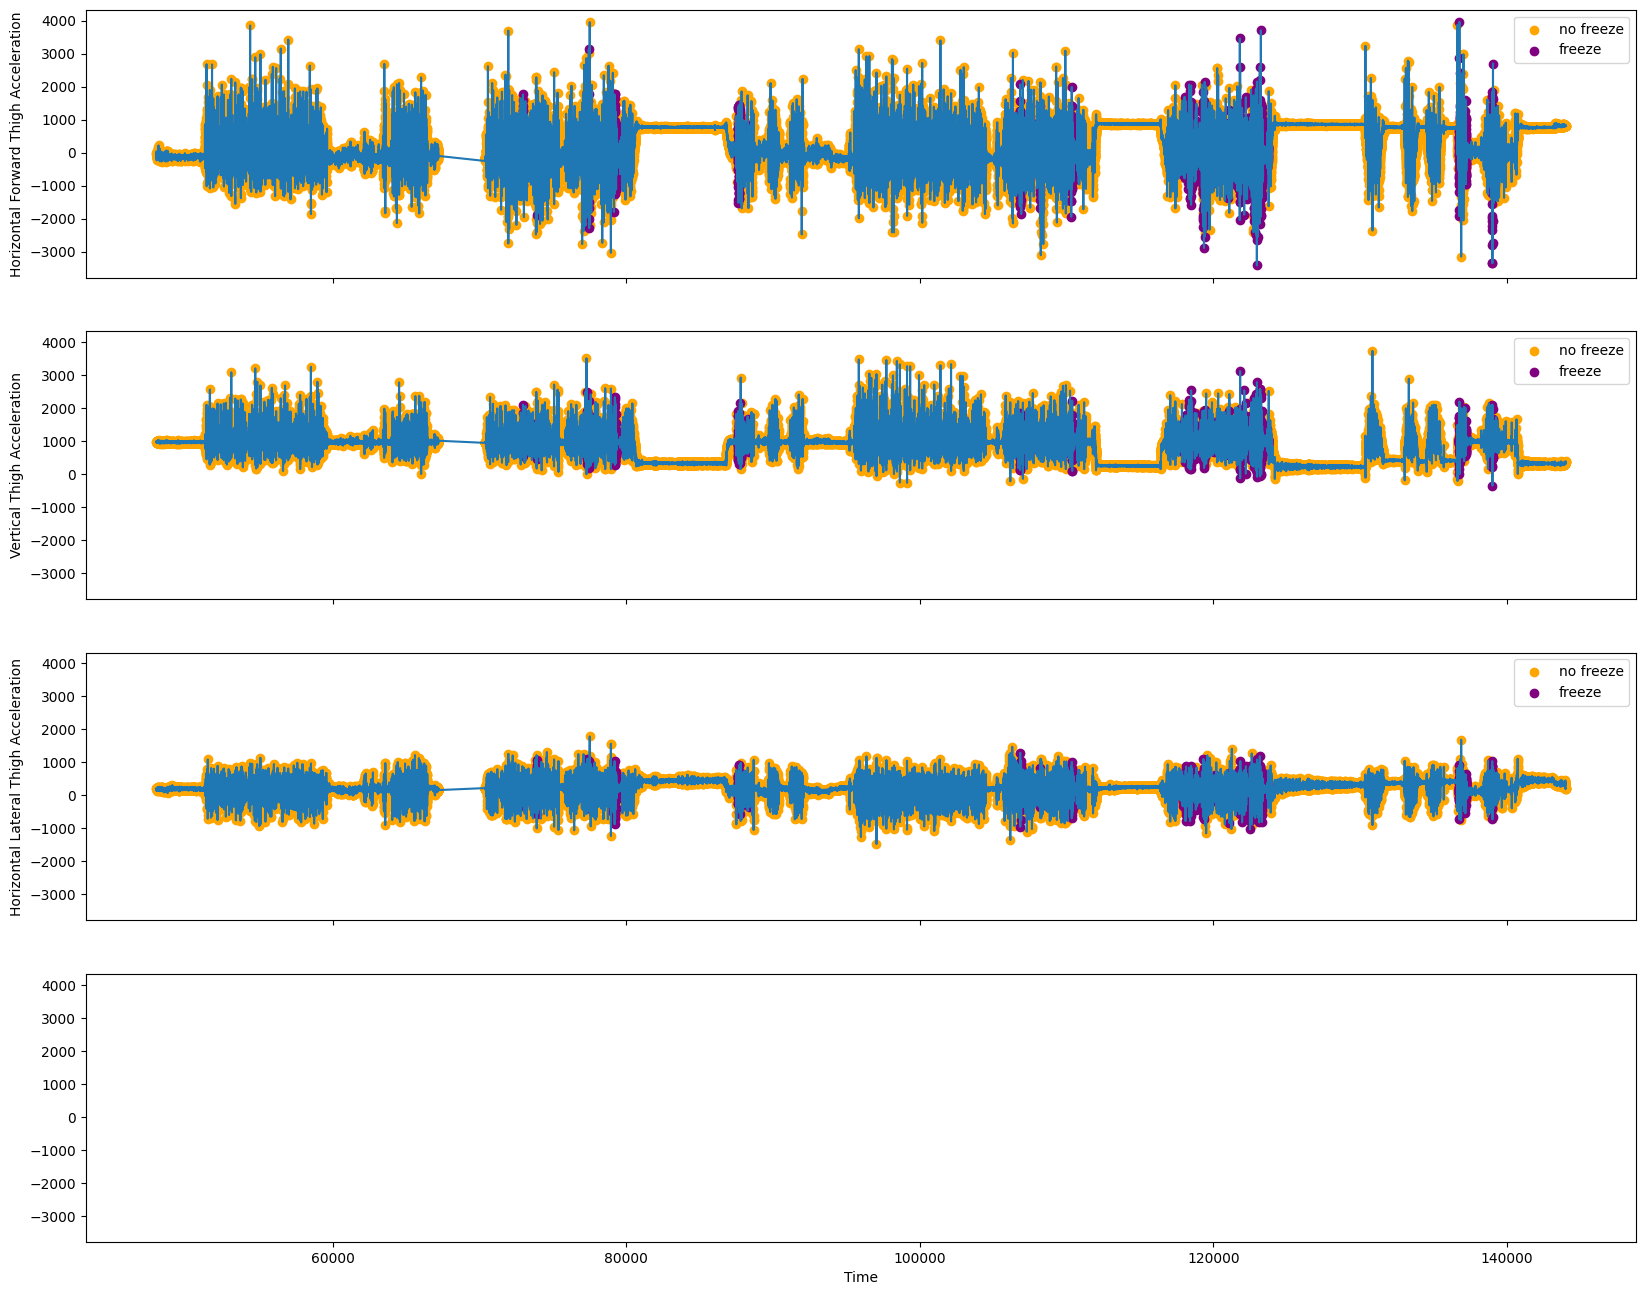

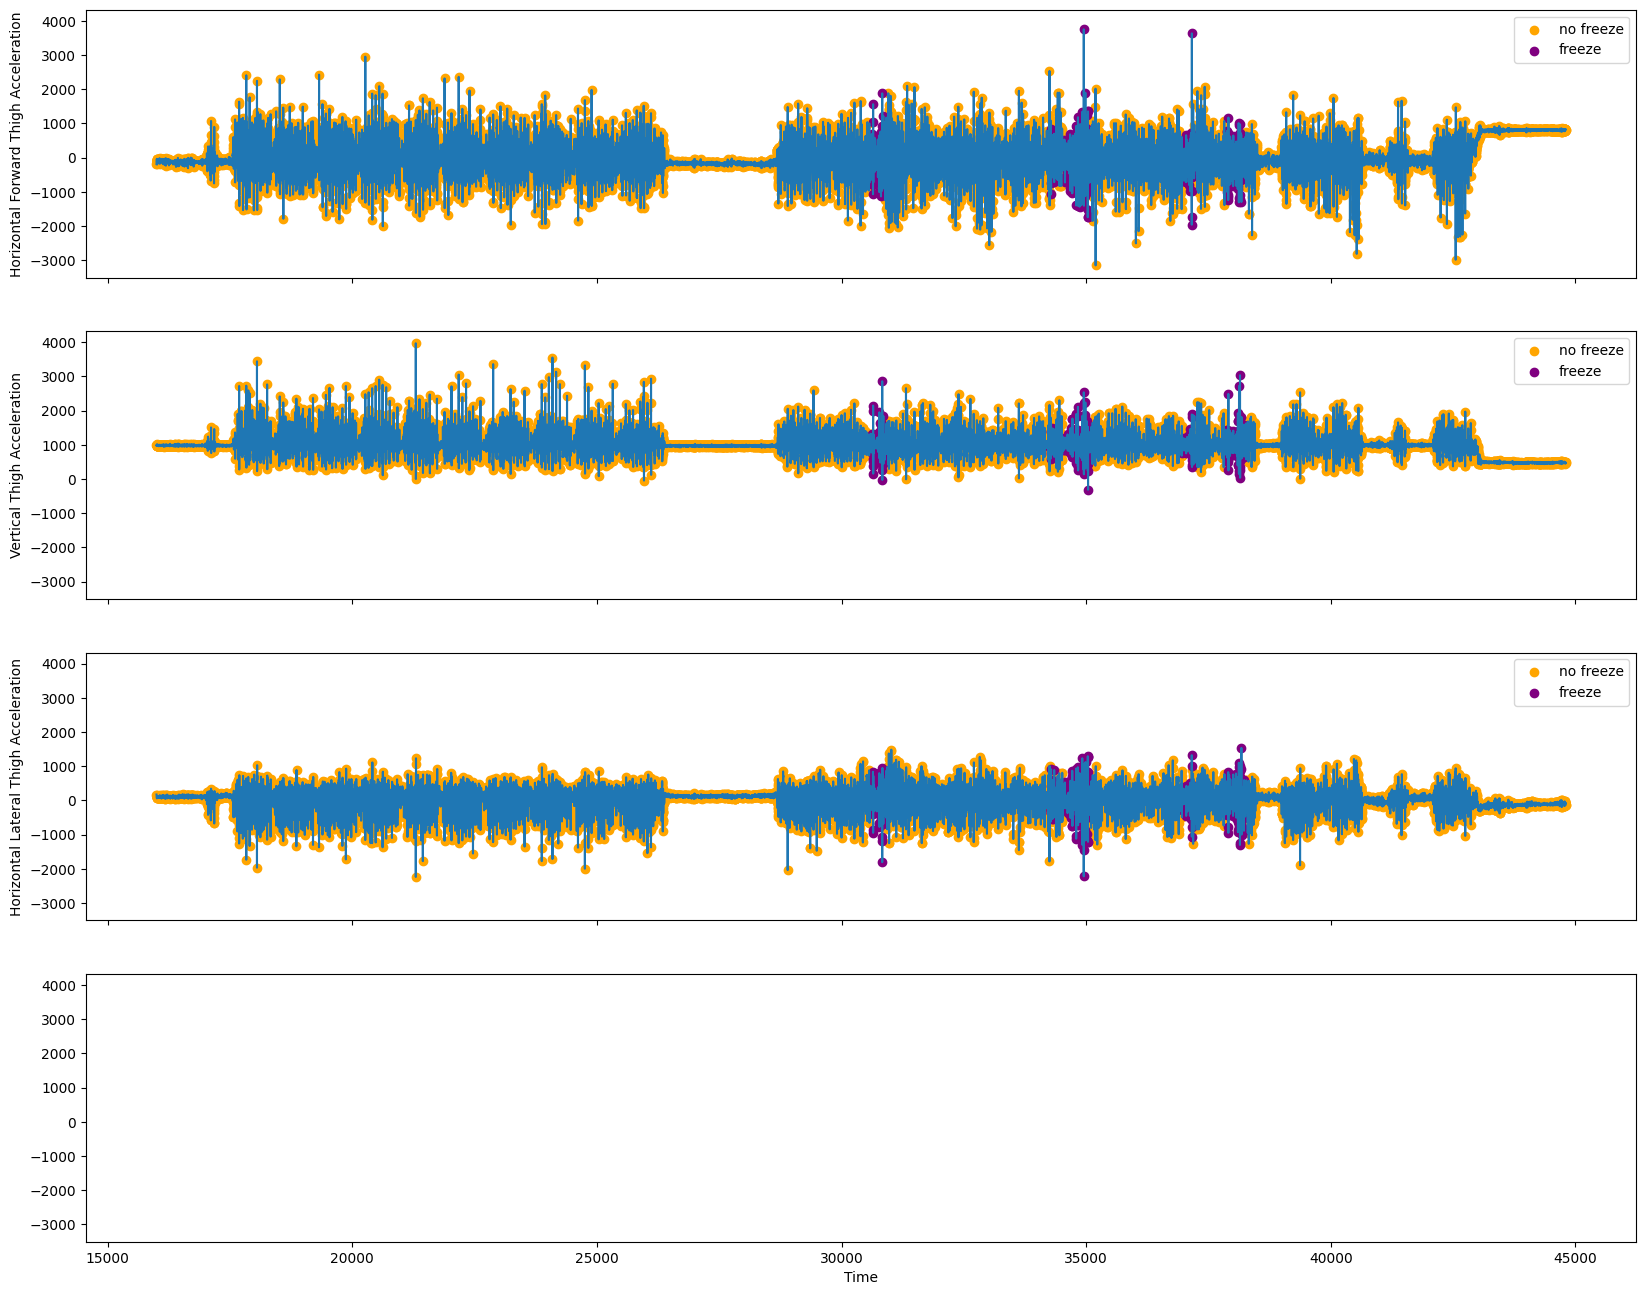

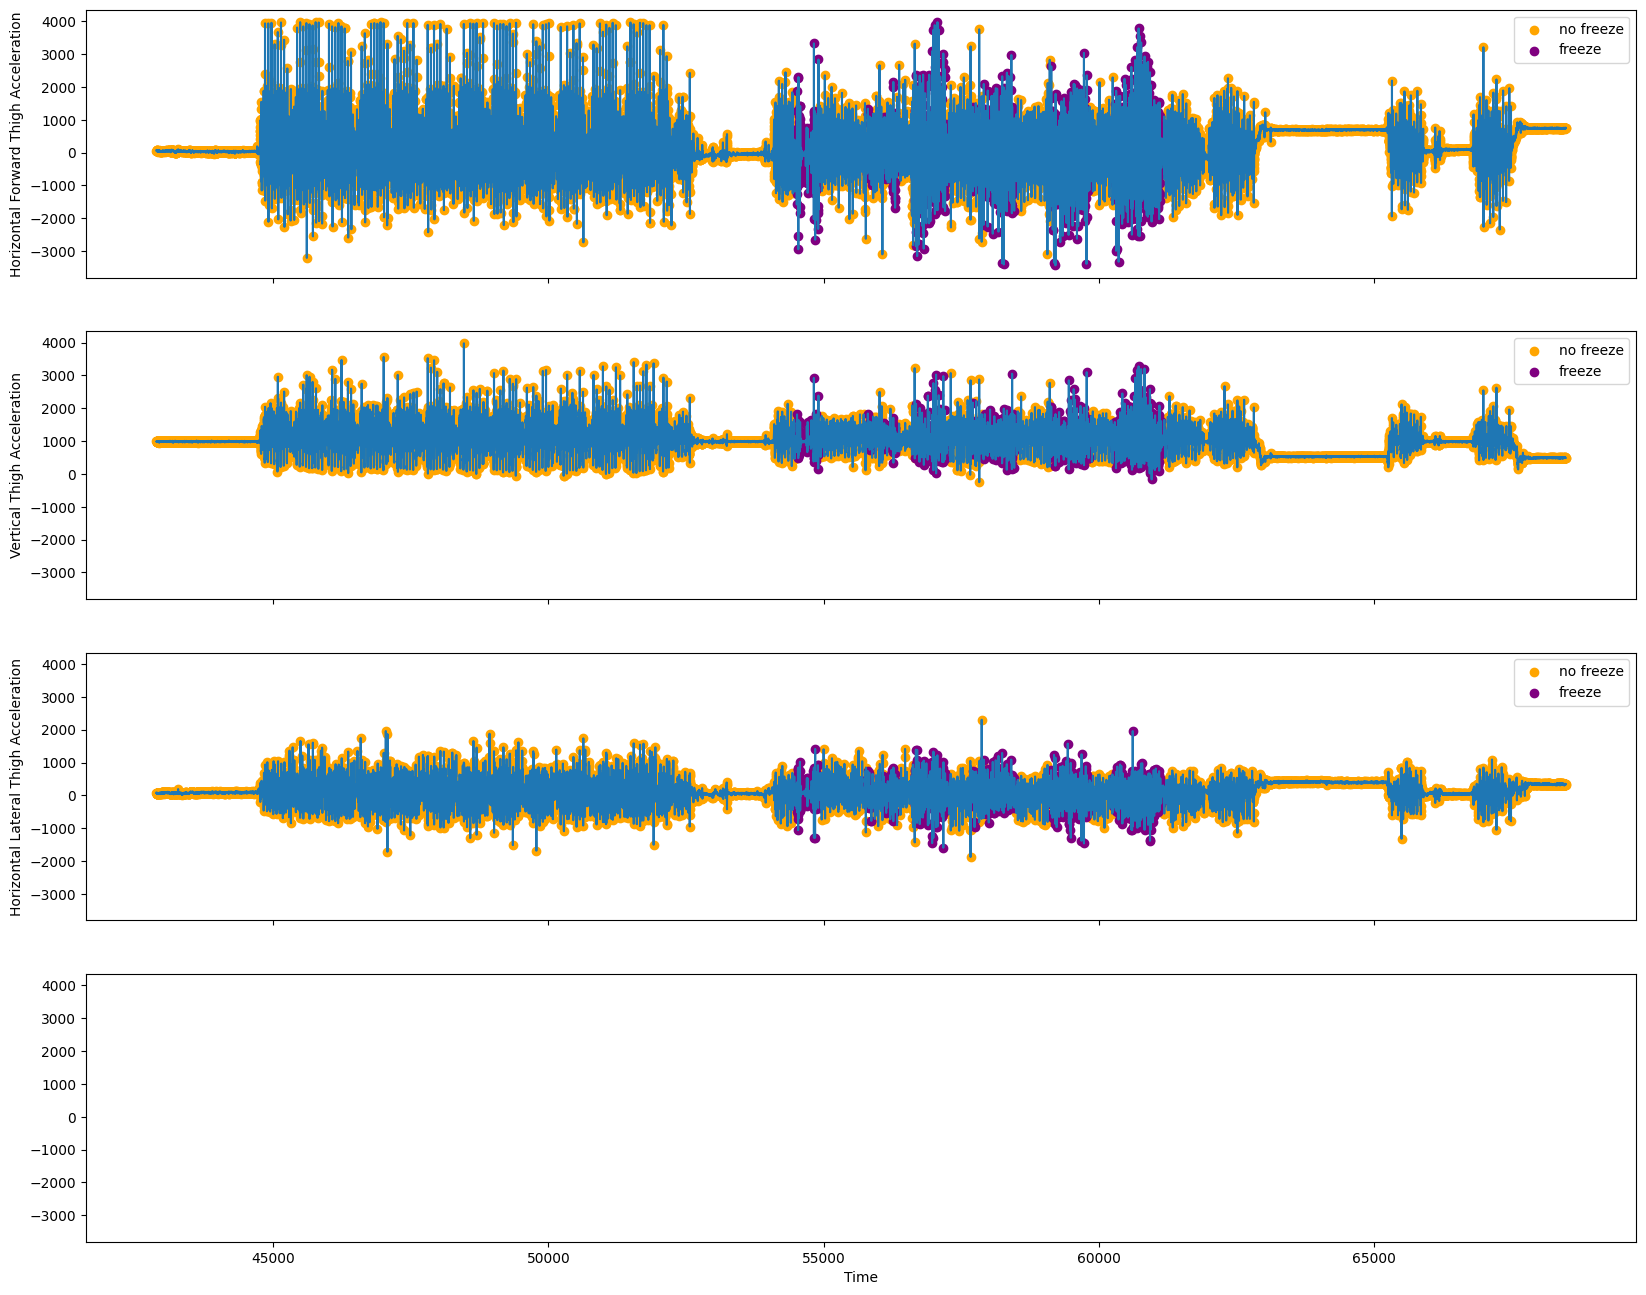

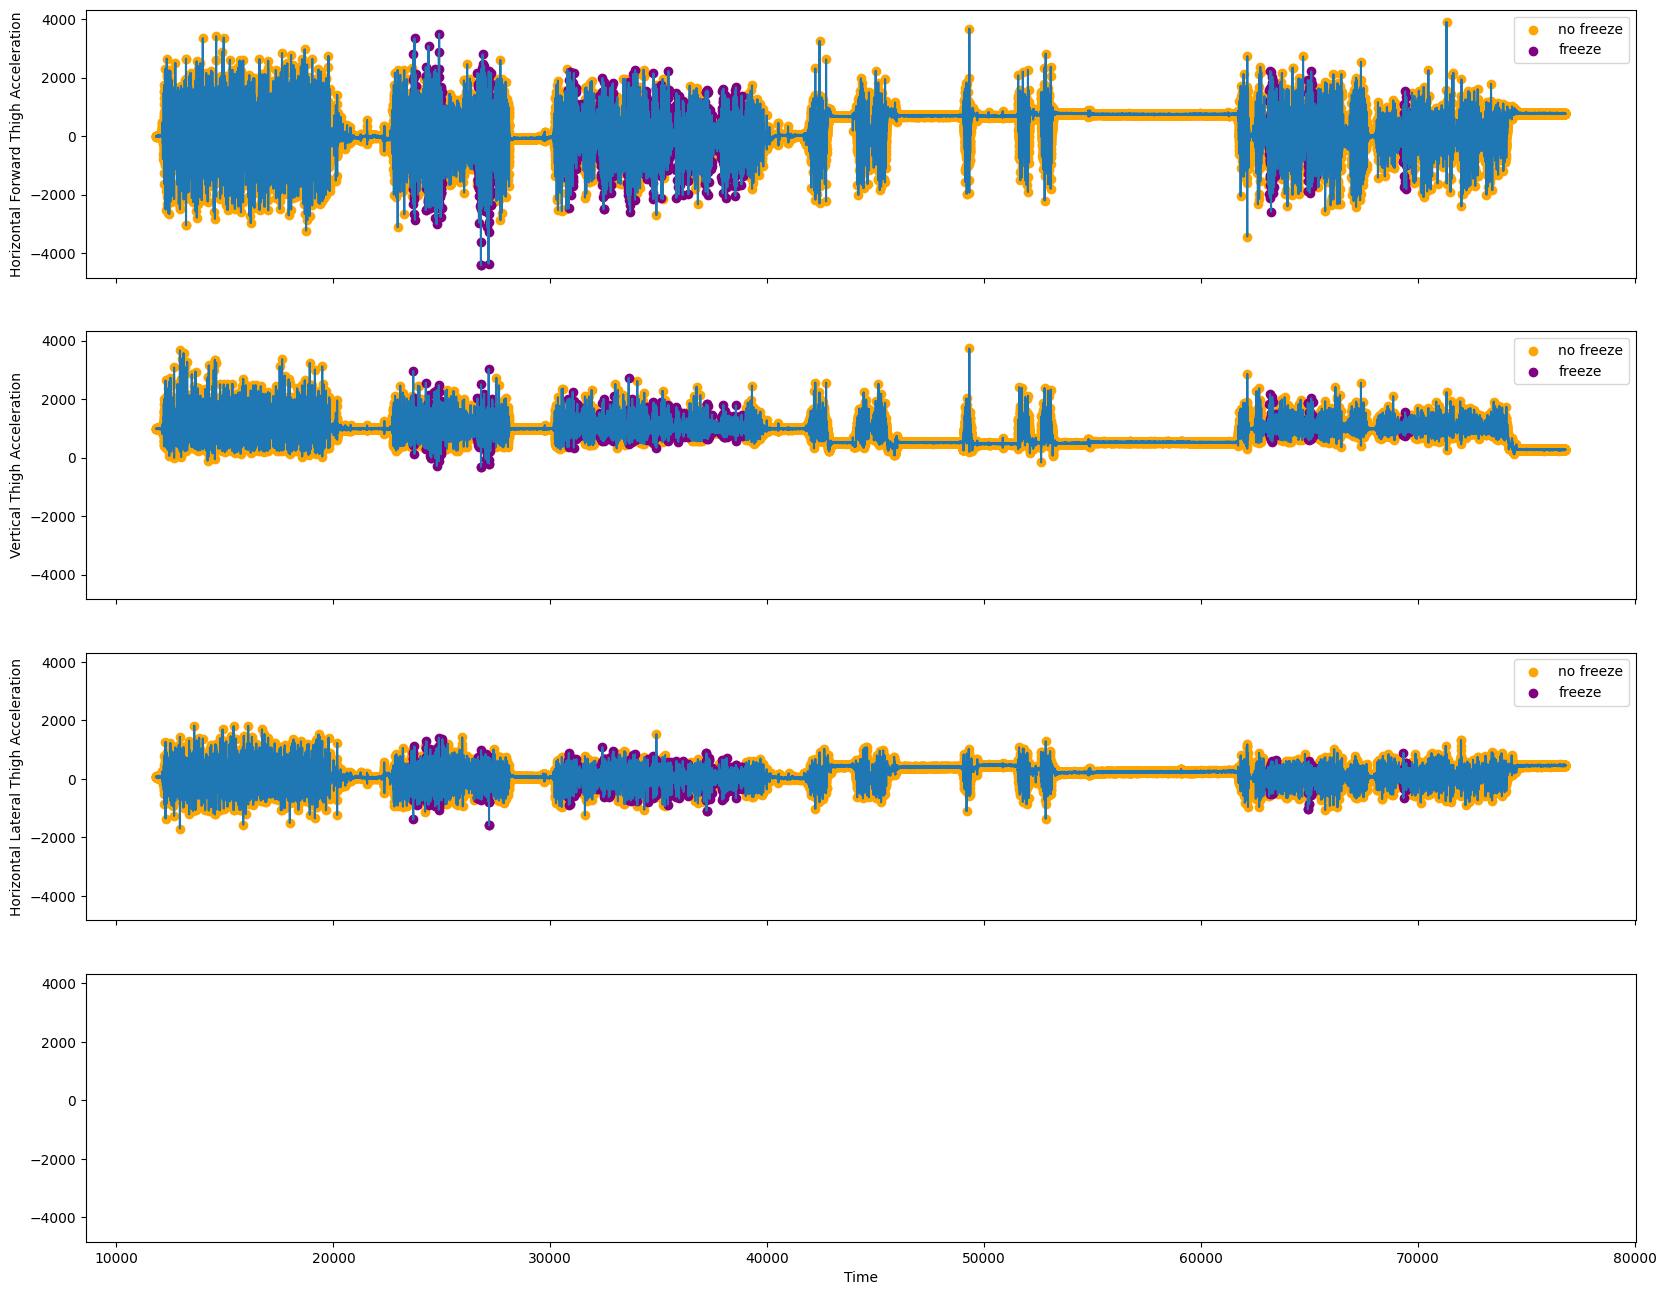

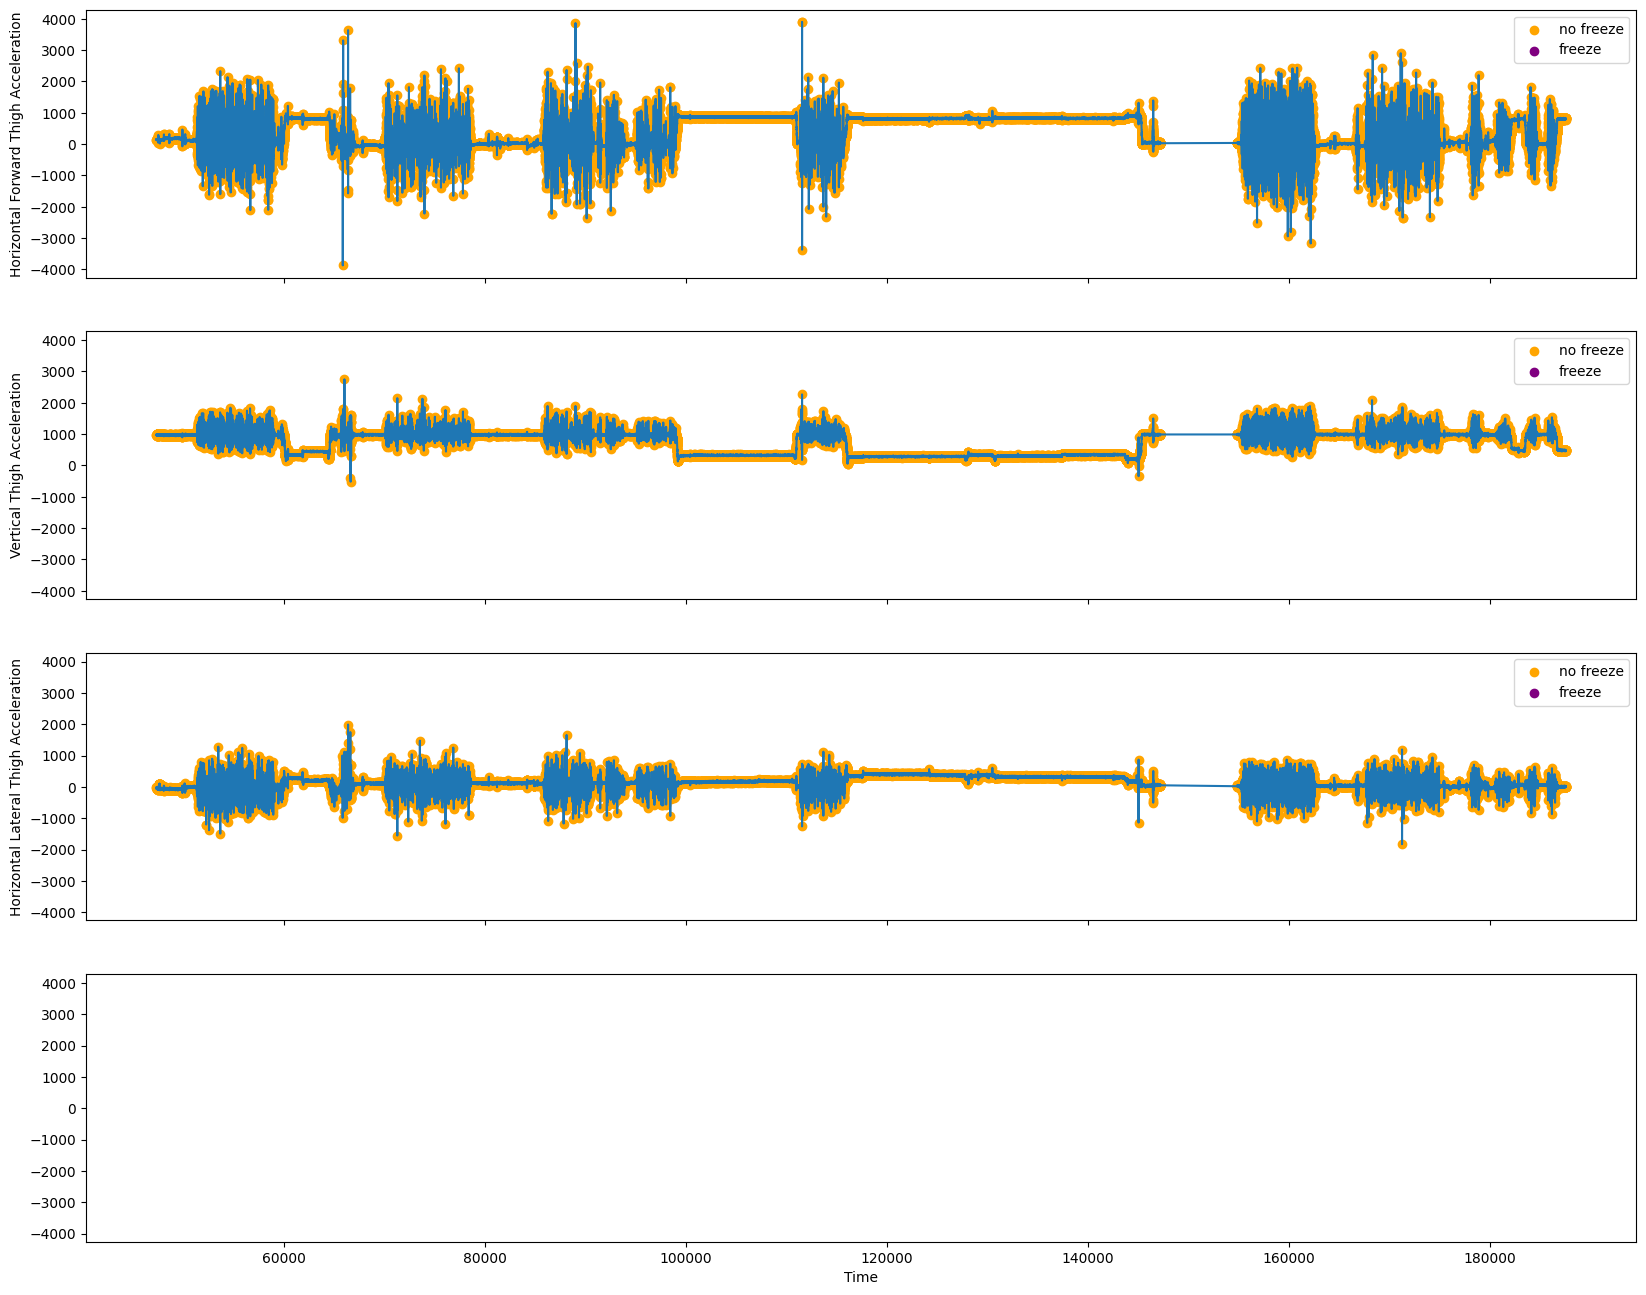

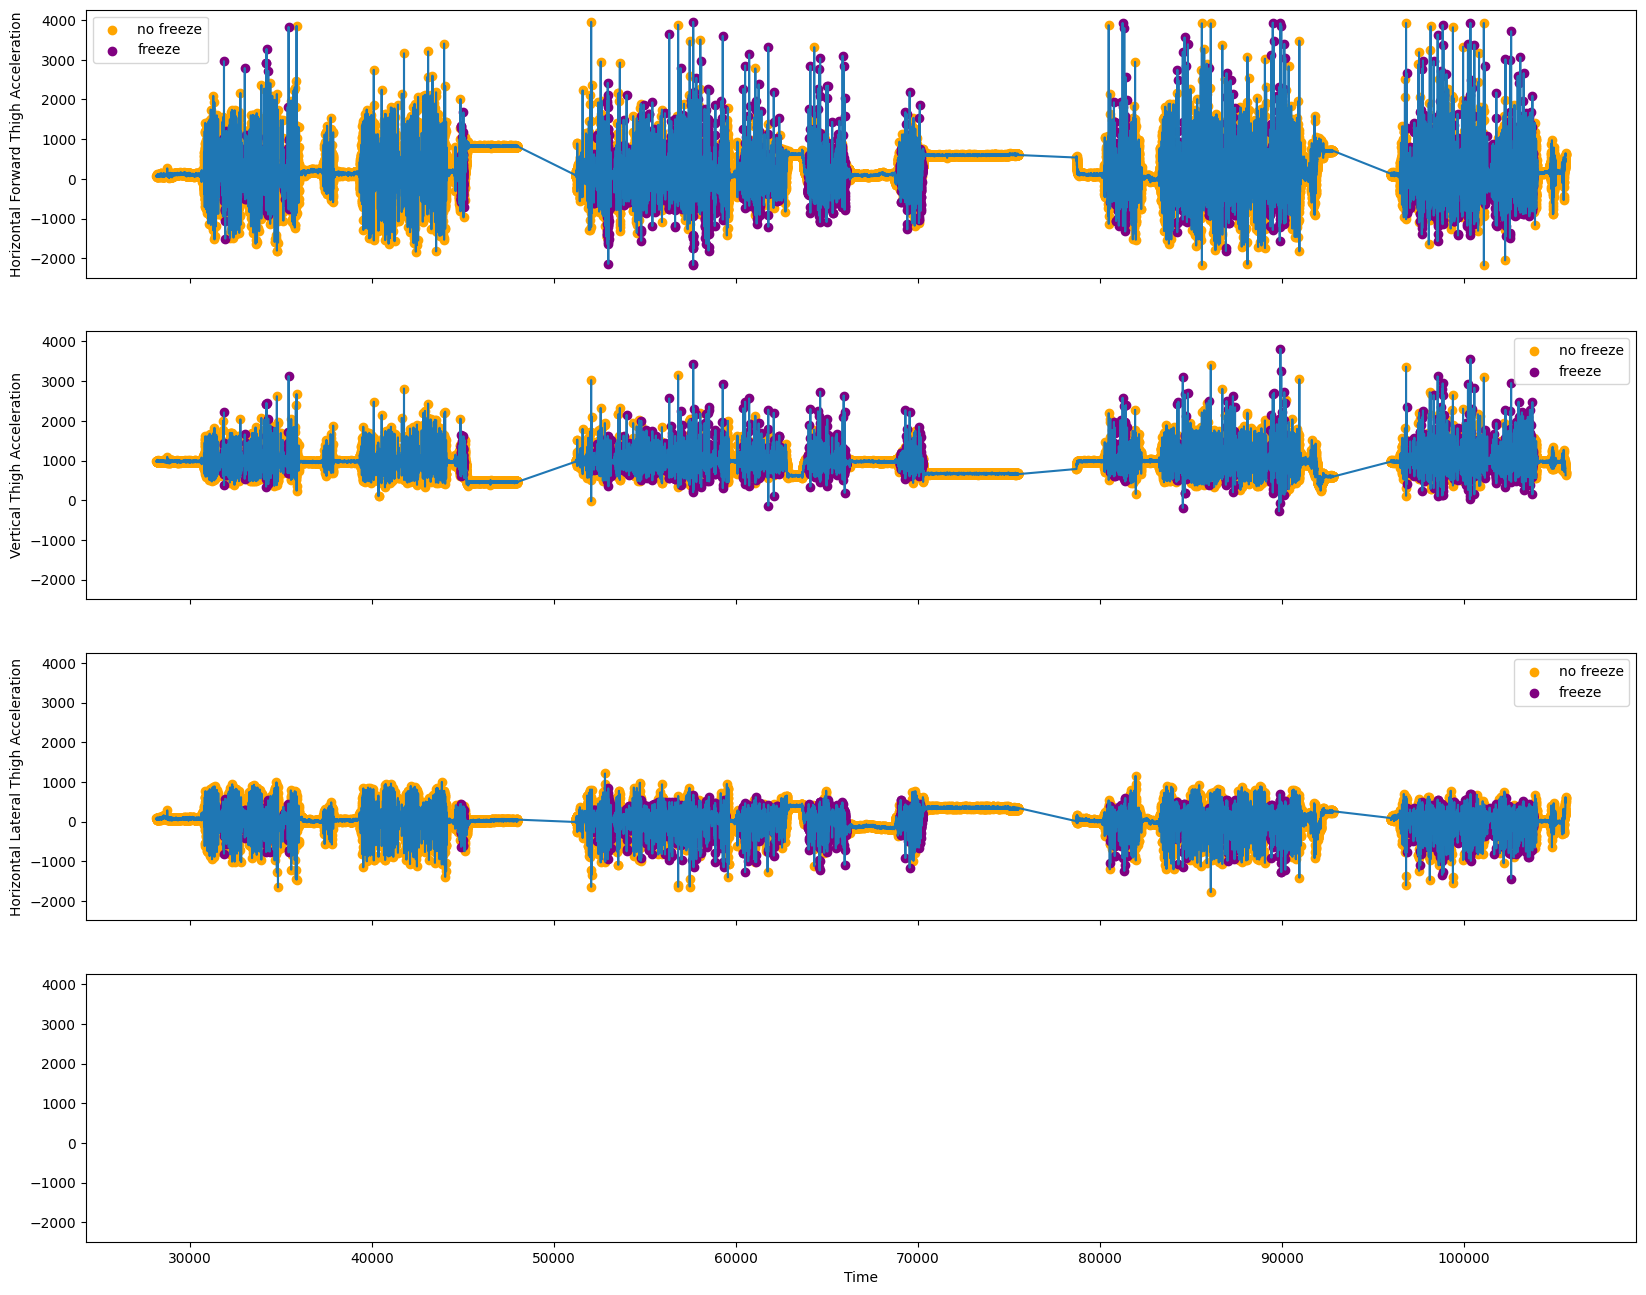

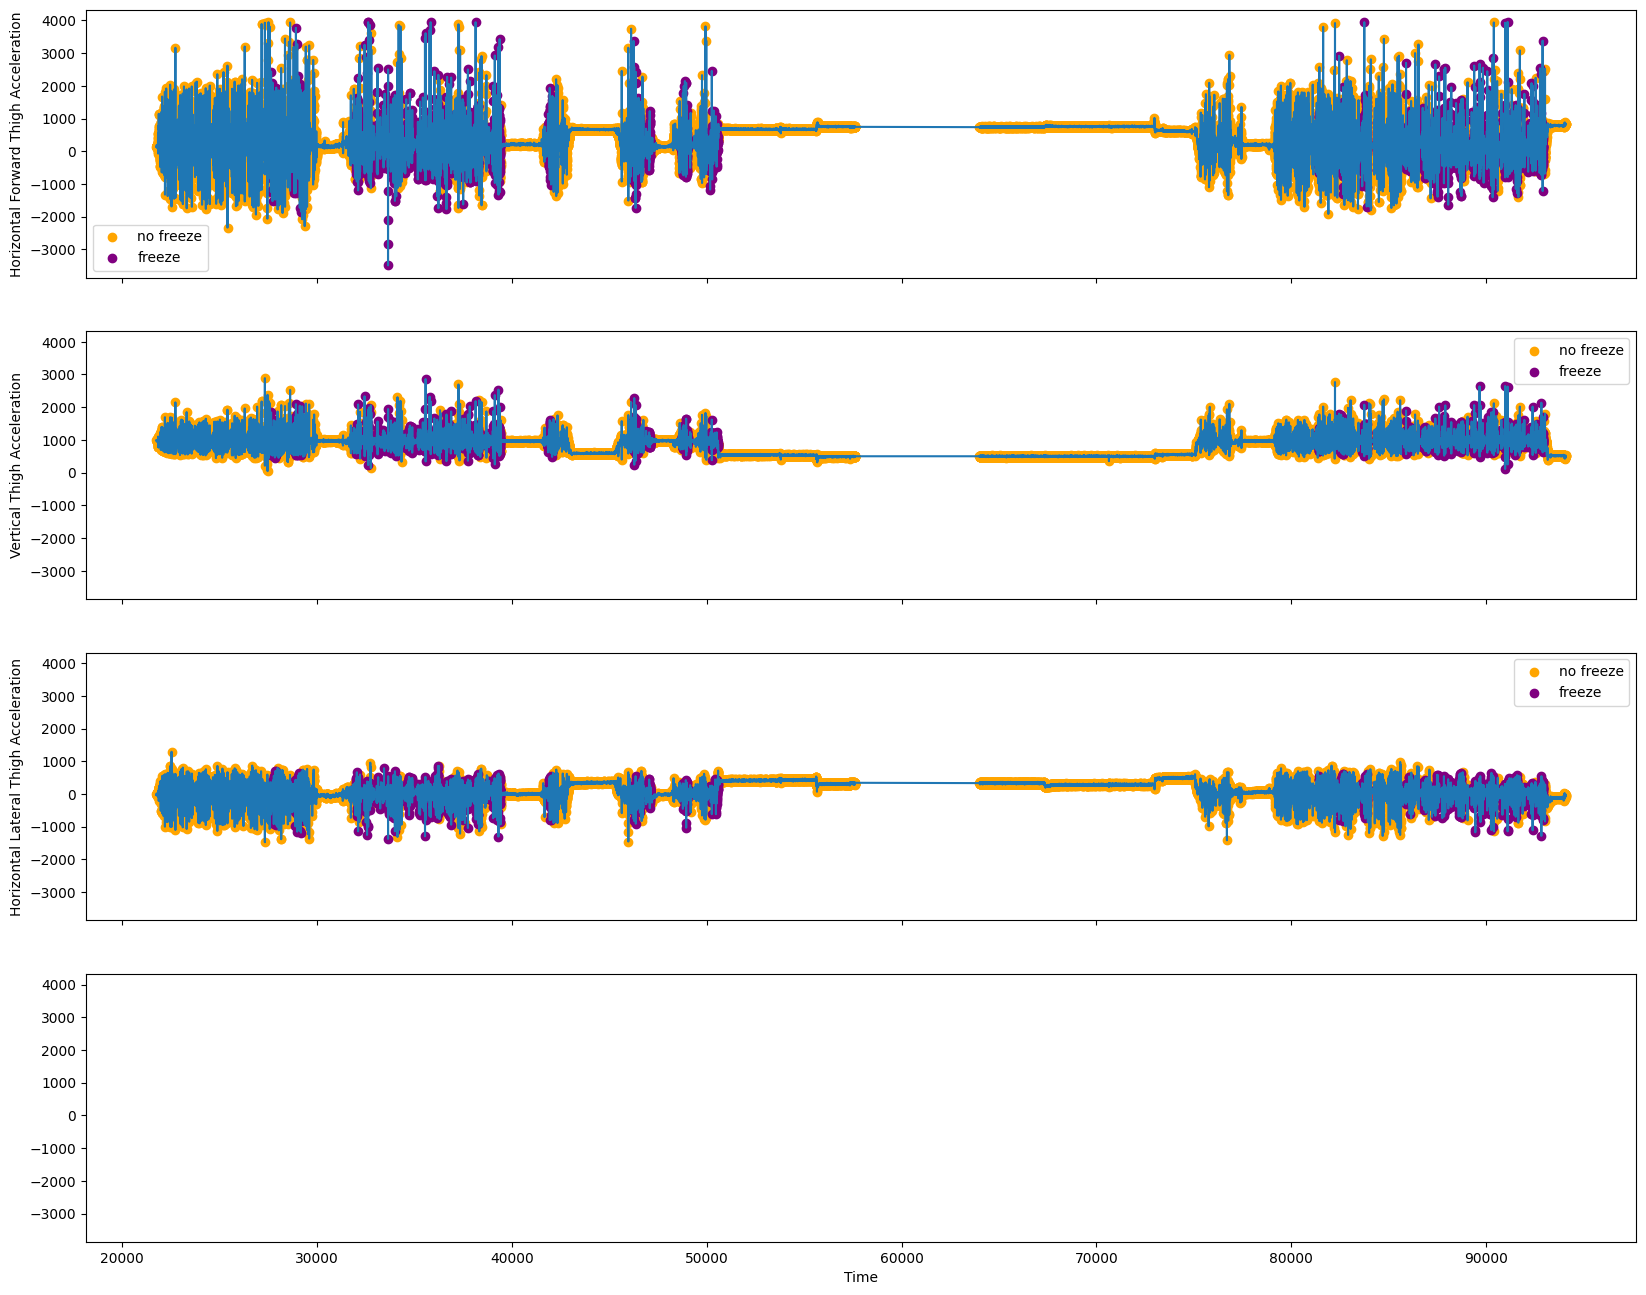

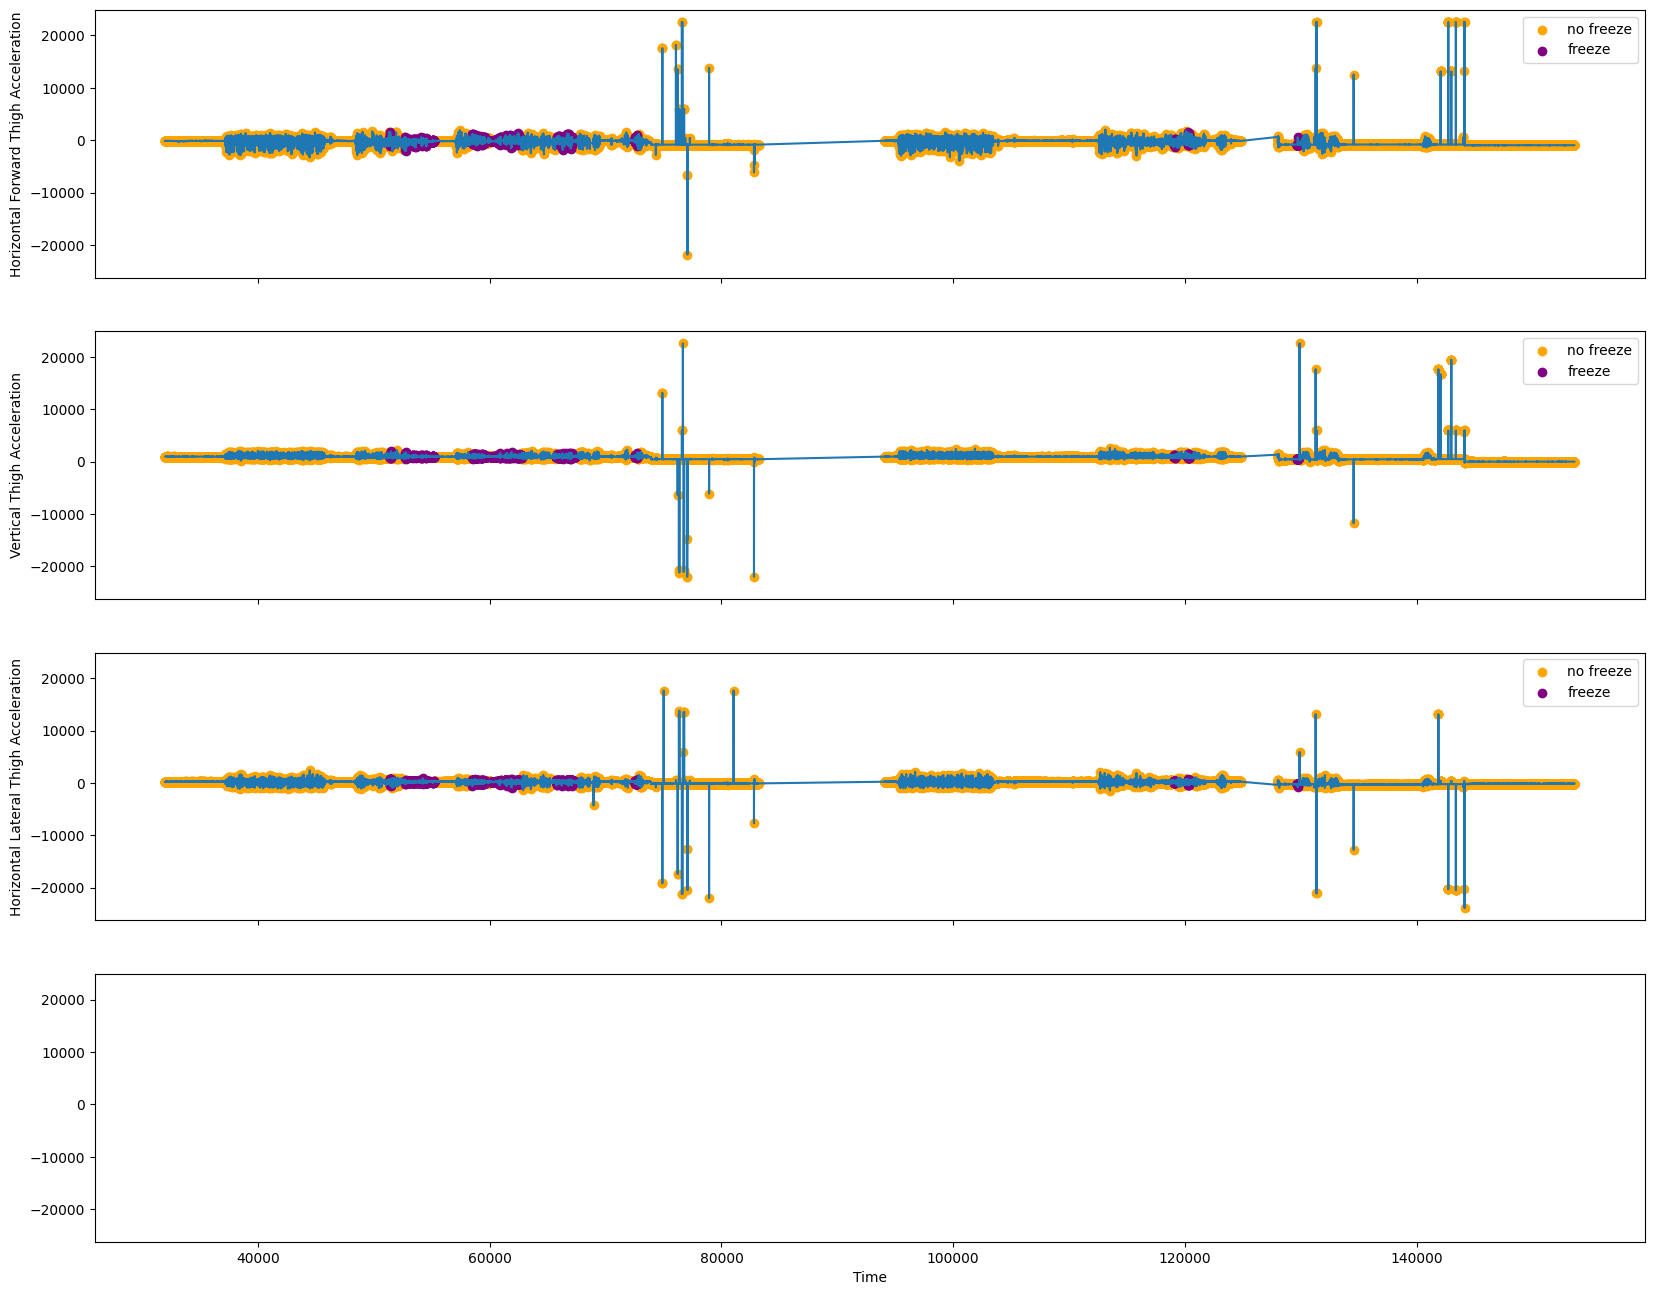

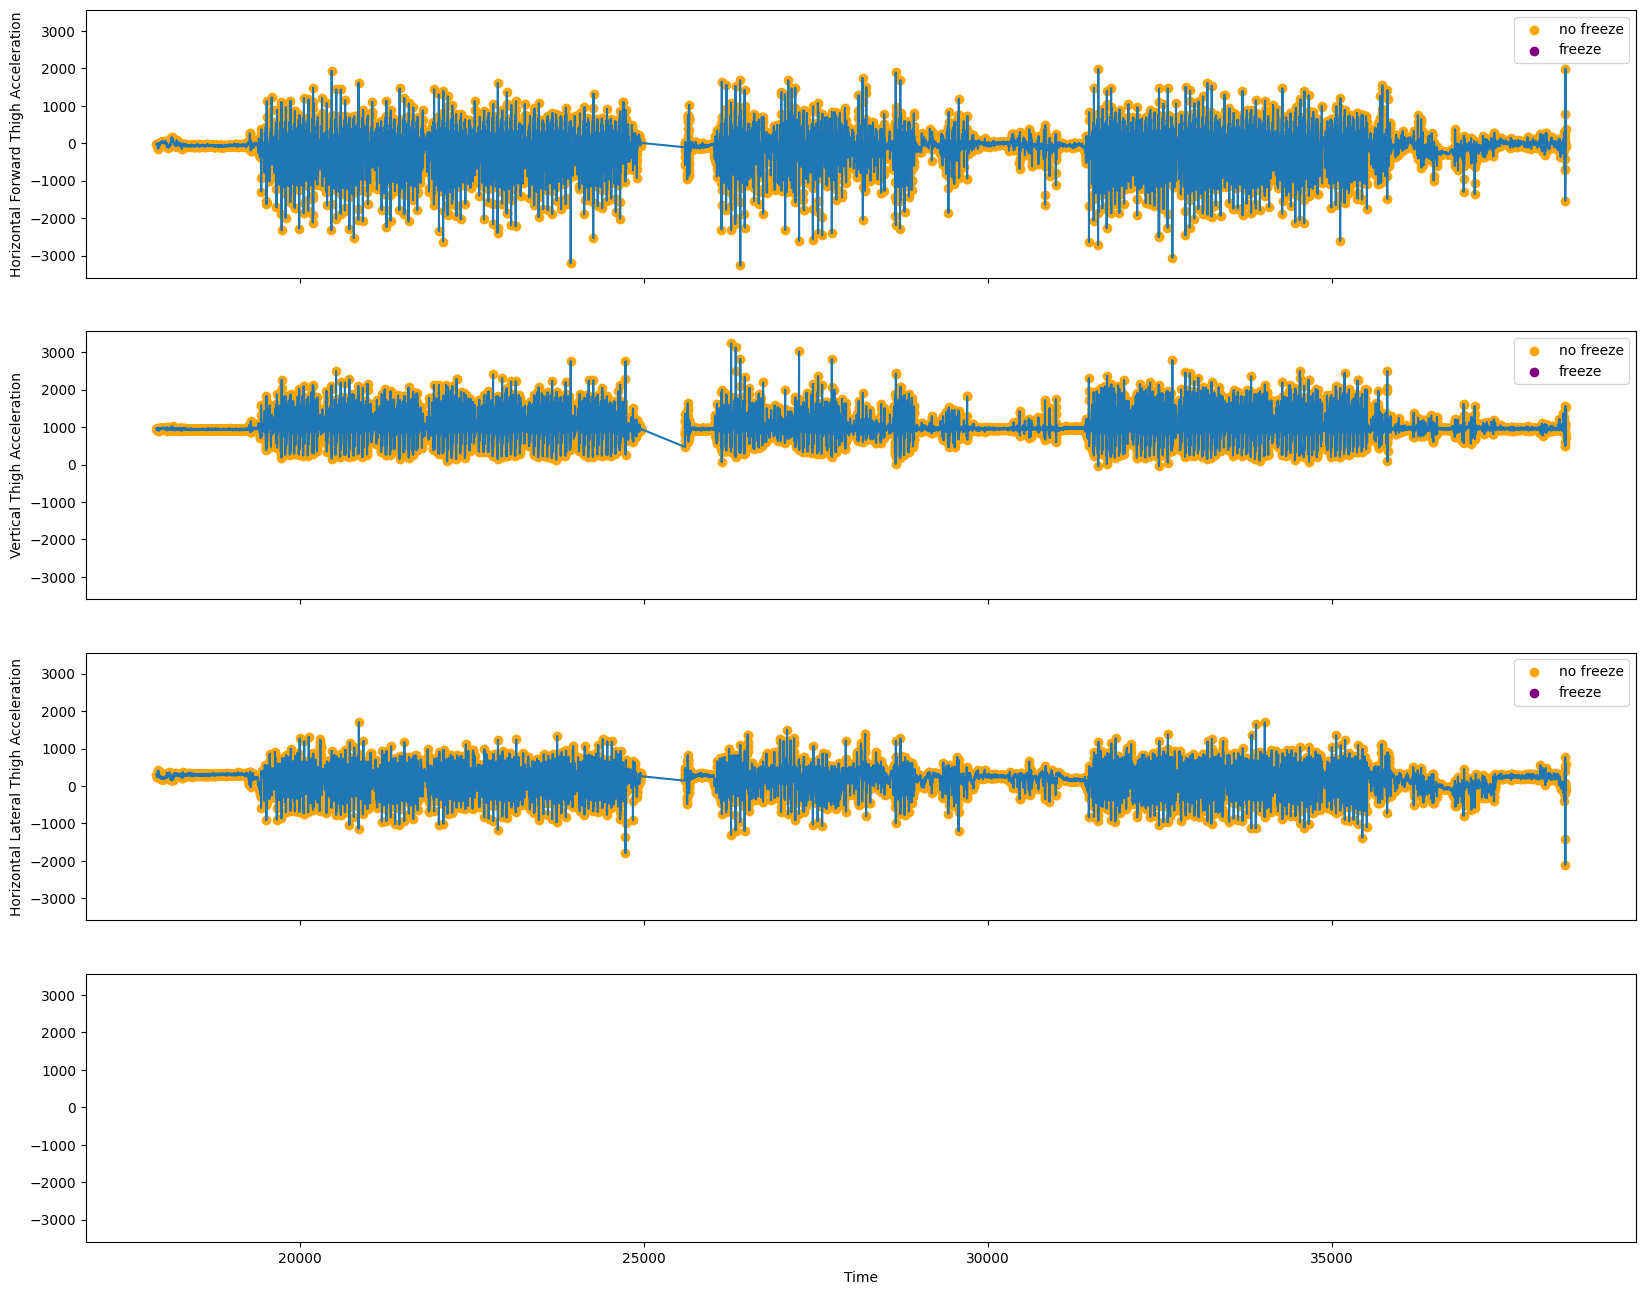

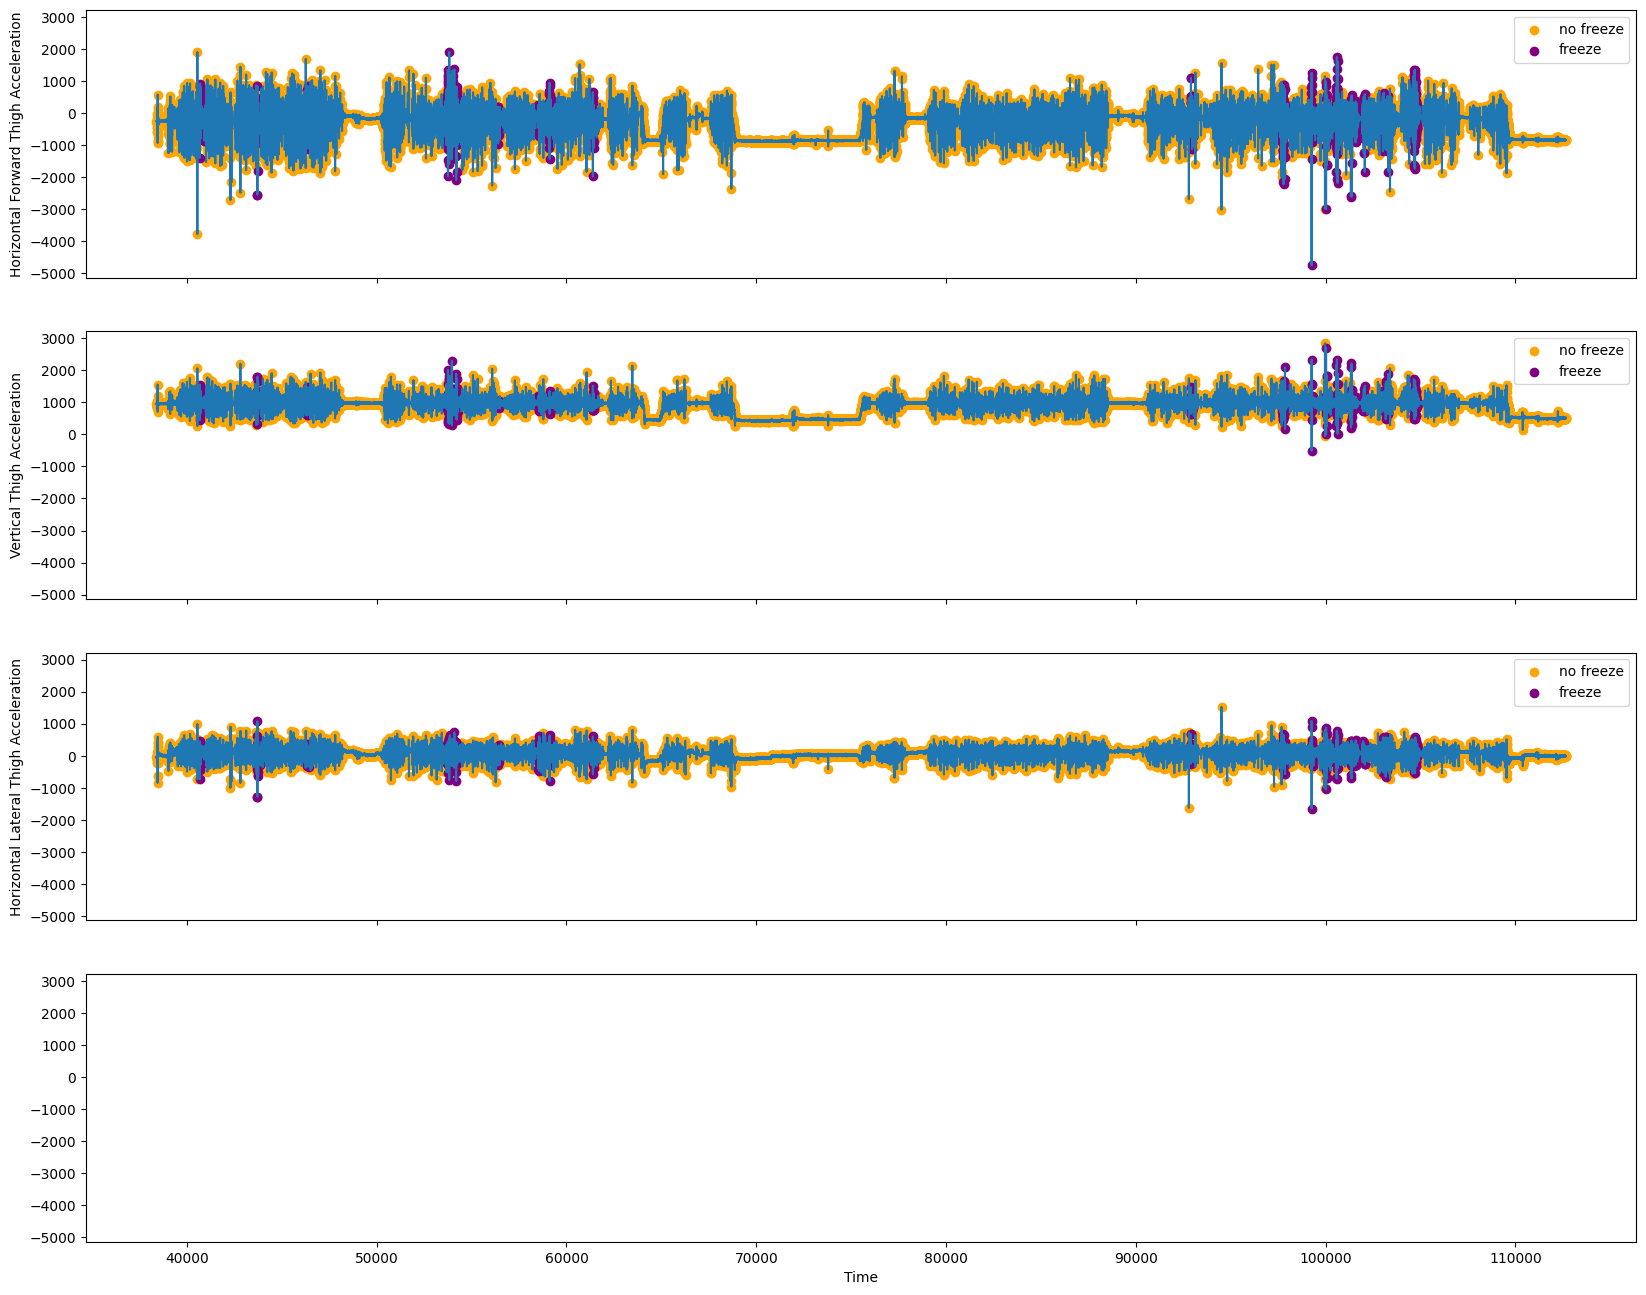

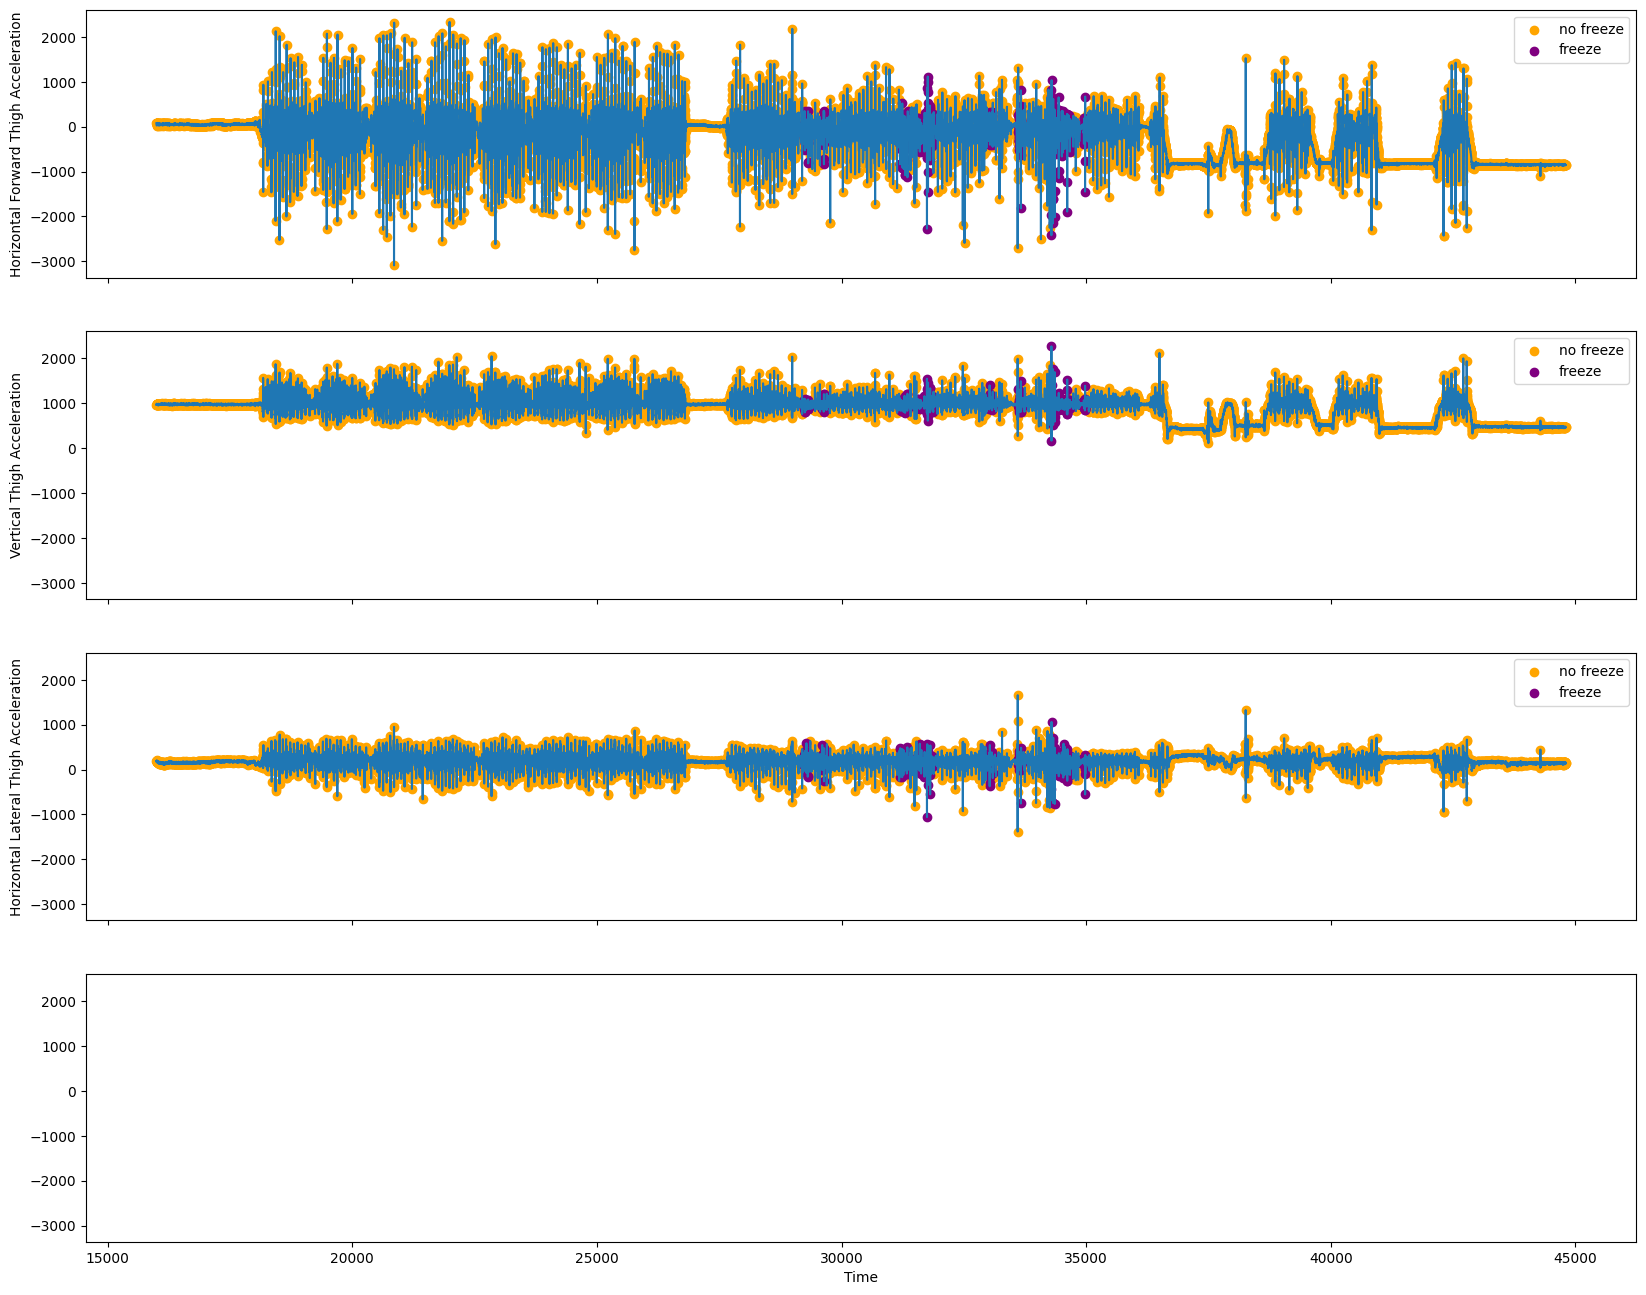

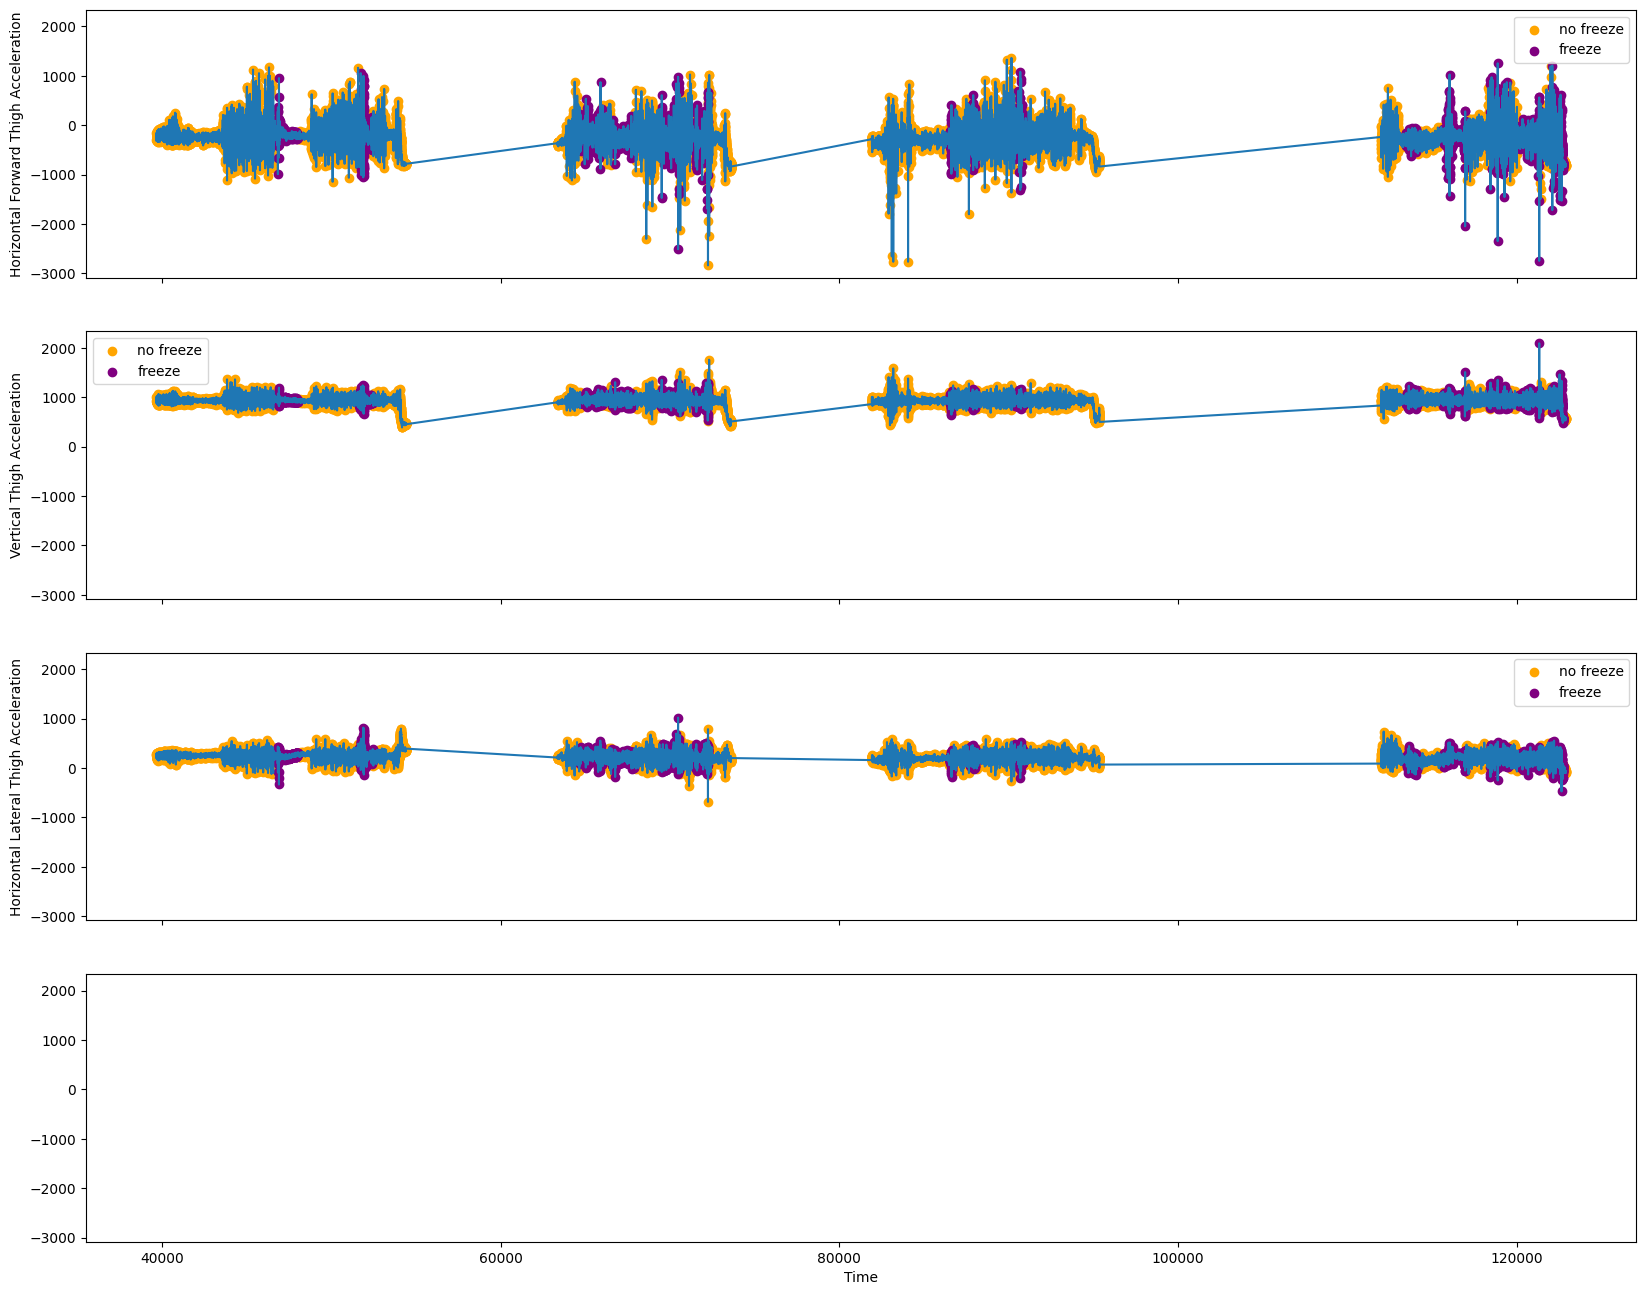

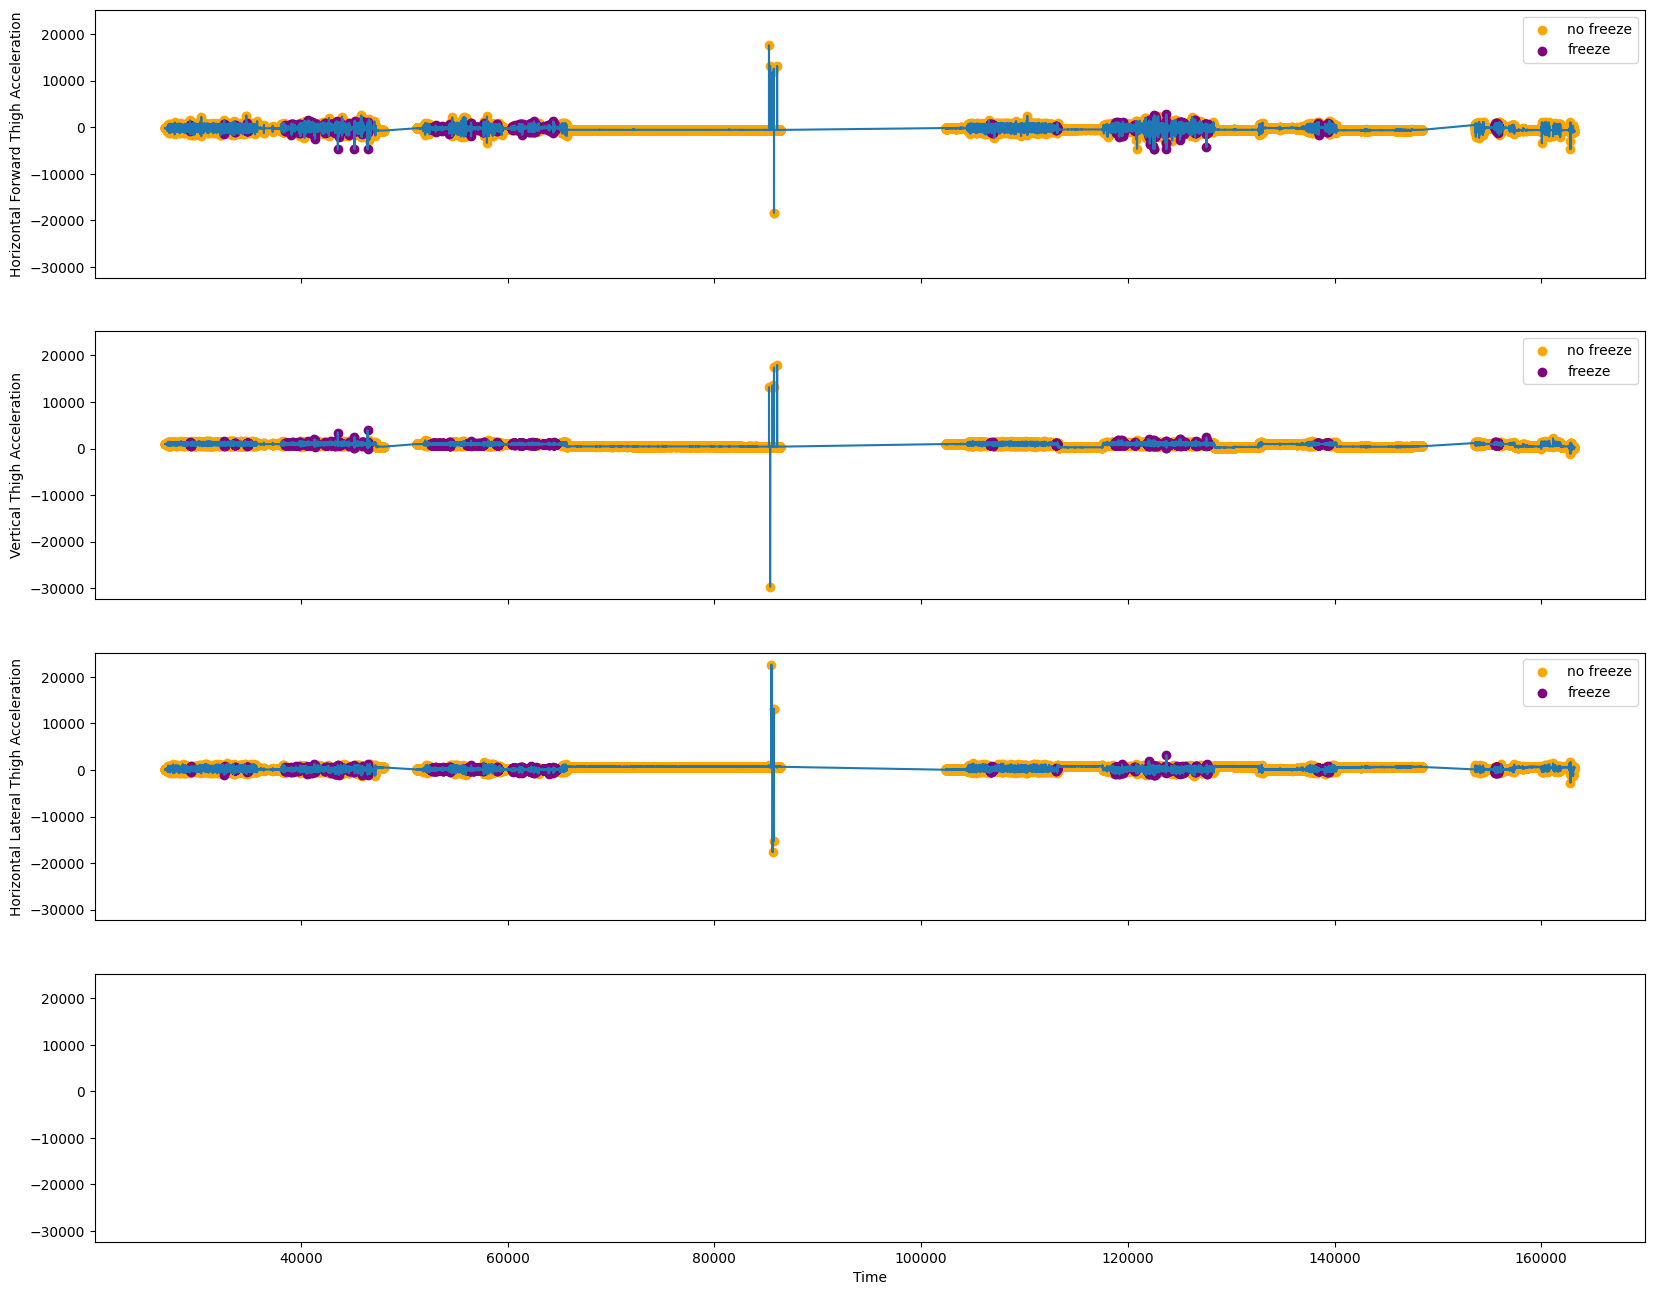

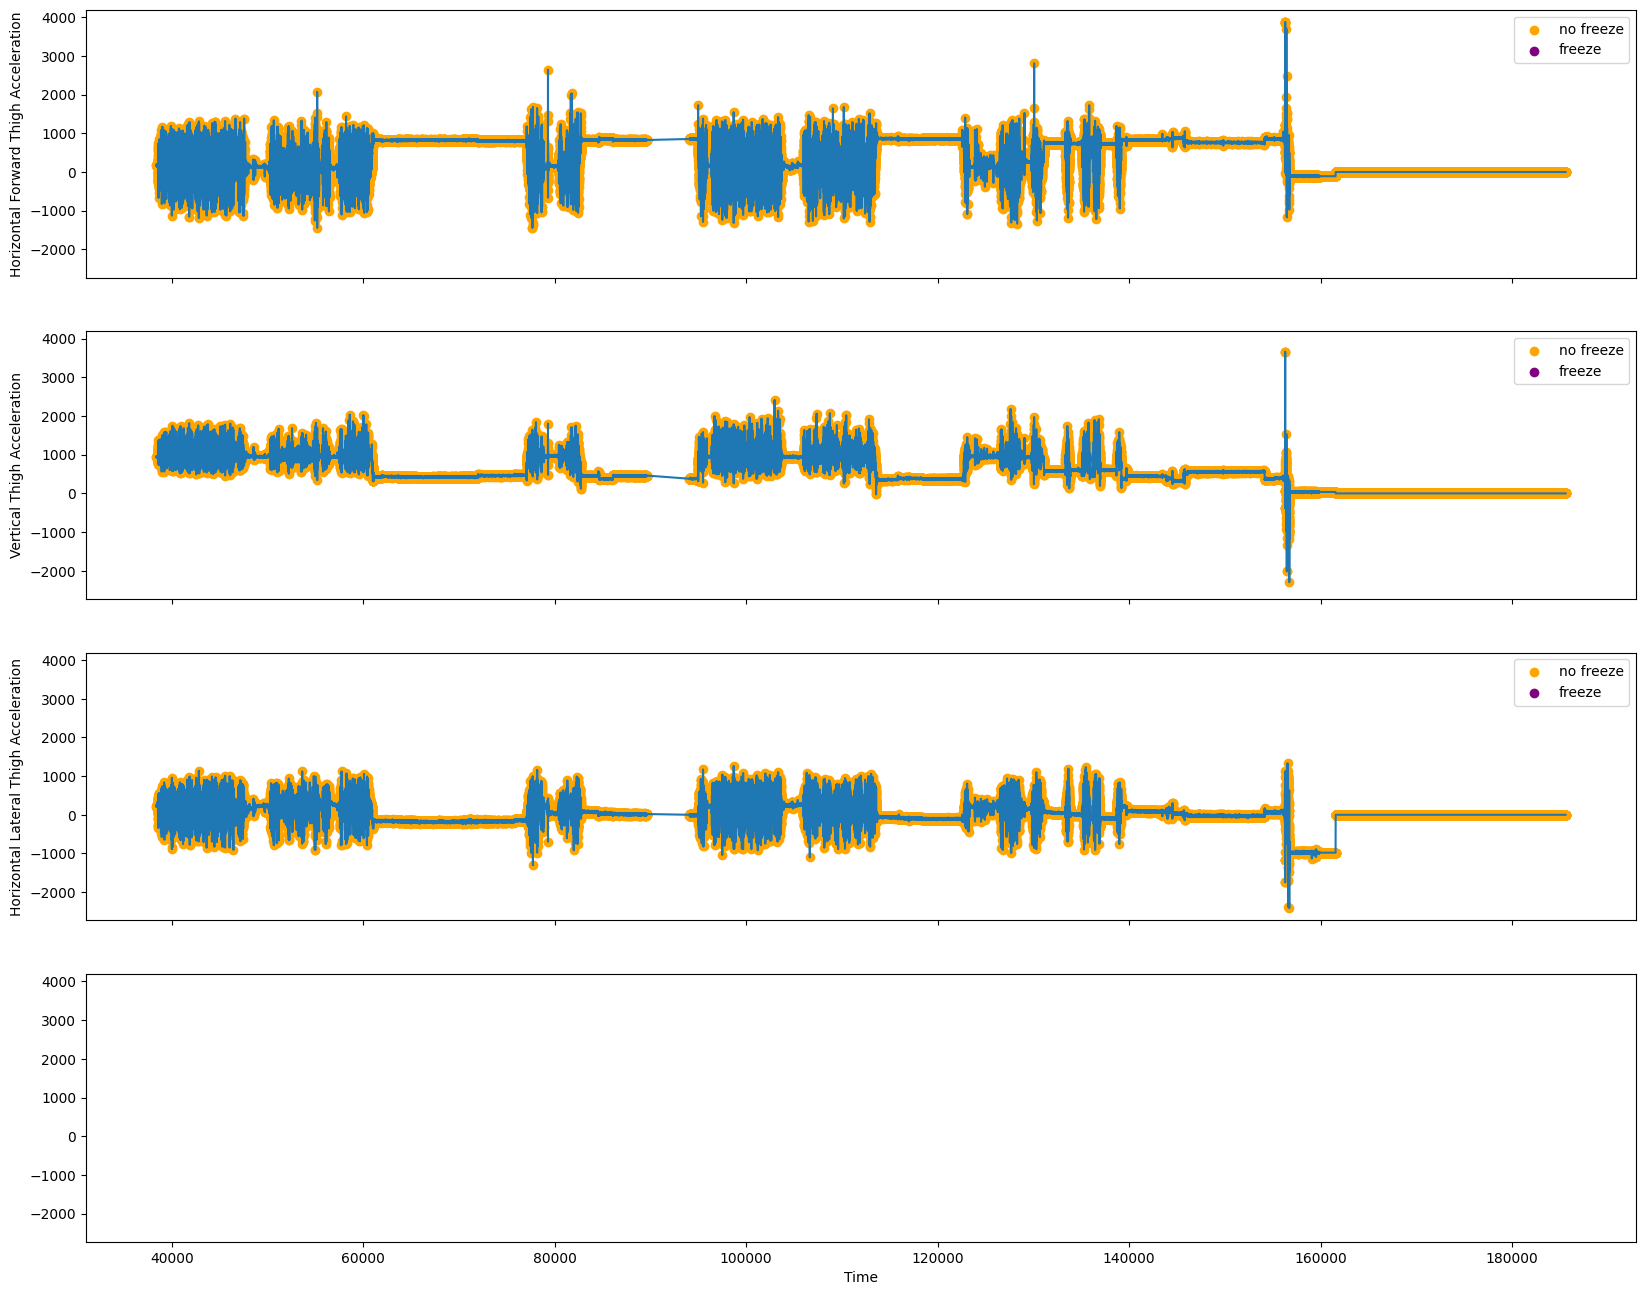

In [22]:
for i in range(len(daphnetThigh)):
    # 
    # print(daphnetNames[i])
    fig, axes = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(20, 16))
    # fig.suptitle("Data from "+daphnetNames[i])
    plt.xlabel("Time")
    
    df = daphnetThigh[i]
    df = df[df.labels > 0]
    neg = df[df.labels == 1]
    pos = df[df.labels == 2]
    
    ax1 = axes[0]
    ax1.plot(df['thigh acceleration forward'])
    ax1.set_ylabel("Horizontal Forward Thigh Acceleration")
    ax1.scatter(neg.index, neg['thigh acceleration forward'], c='orange', label="no freeze")
    ax1.scatter(pos.index, pos['thigh acceleration forward'], c='purple', label="freeze")
    ax1.legend()
    
    ax2 = axes[1]
    ax2.plot(df['thigh acceleration vertical'])
    ax2.set_ylabel("Vertical Thigh Acceleration")
    ax2.scatter(neg.index, neg['thigh acceleration vertical'], c='orange', label="no freeze")
    ax2.scatter(pos.index, pos['thigh acceleration vertical'], c='purple', label="freeze")
    ax2.legend()
    
    ax3 = axes[2]
    ax3.plot(df['thigh acceleration lateral'])
    ax3.set_ylabel("Horizontal Lateral Thigh Acceleration")
    ax3.scatter(neg.index, neg['thigh acceleration lateral'], c='orange', label="no freeze")
    ax3.scatter(pos.index, pos['thigh acceleration lateral'], c='purple', label="freeze")
    ax3.legend()
    
    display(fig)